# Data loading

In [1]:
# necessary imports

import my_code
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.io import read_raw_edf
from mne.preprocessing import ICA
#%matplotlib qt
%matplotlib inline

In [2]:
# loading the raw data (30 files in a list) 

path = os.getcwd()
raw_datasets = my_code.load_all_datasets(path = path)

Extracting EDF parameters from C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\Giuseppe01_01.02.21_08.43.22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45055  =      0.000 ...   175.996 secs...
Extracting EDF parameters from C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\Giuseppe02_02.02.21_08.30.42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45823  =      0.000 ...   178.996 secs...
Extracting EDF parameters from C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\Giuseppe03_03.02.21_08.33.04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45311  =      0.000 ...   176.996 secs...
Extracting EDF parameters from C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\Giuseppe04_03.02.21_08.43.13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info s

# Pre-processing

### Setting reference, montage, filtering, annotating

In [3]:
# pre-processing the raw data:
# setting the reference electrodes to 'CQ_CMS', 'CQ_DRL'
# setting the montage
# high pass filter at 0.16 Hz to remove slow drifts 
# notch filter at 50 Hz to remove powerline noise
# annotating the raw data so that we have 5 instances of push VI, 5 instances of relax VI per dataset, discarding resting state
# creating events from annotations 

pre_processed_datasets = my_code.preliminary_steps(raw_datasets)

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.16 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.16
- Lower transition bandwidth: 0.16 Hz (-6 dB cutoff frequency: 0.08 Hz)
- Filter length: 5281 samples (20.629 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Used Annotations descriptions: ['Push', 'Relax']
EEG channel type selected for re-referenci

### Epoch creation

In [4]:
# creating epochs from the events (starting at 0.5 s of a push/relax instance and ending at 9.5 s of a push/relax instance)

# first, creating a set of epochs based just on one dataset

events_from_annot, event_dict = mne.events_from_annotations(pre_processed_datasets[0])
event_dict = {"Push" : 1, "Relax" : 2}
baseline = (0.5, 0.5)
delay = 0.5
epochs_all = mne.Epochs(pre_processed_datasets[0], events=events_from_annot, event_id = event_dict, baseline = baseline, tmin = 0.5, tmax = (10-delay), preload = True, reject_by_annotation=False)

# then, looping it so more sets of epochs are appended 

epochs_all = my_code.create_epochs(pre_processed_datasets=pre_processed_datasets)

Used Annotations descriptions: ['Push', 'Relax']
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2305 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Push', 'Relax']
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2305 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2305 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
20 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 p

### Artifact rejection & repair

#### Standard approach: applying ICA and discarding noisy epochs persisting after ICA 

Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\my_code.py:139: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=14, random_state=97, method="fastica")
C:\Users\domin\Desktop\Thesis Coding\Datafiles from Giuseppe\my_code.py:140: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(cleaned_epochs)


Selecting by number: 14 components
Fitting ICA took 5.7s.
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


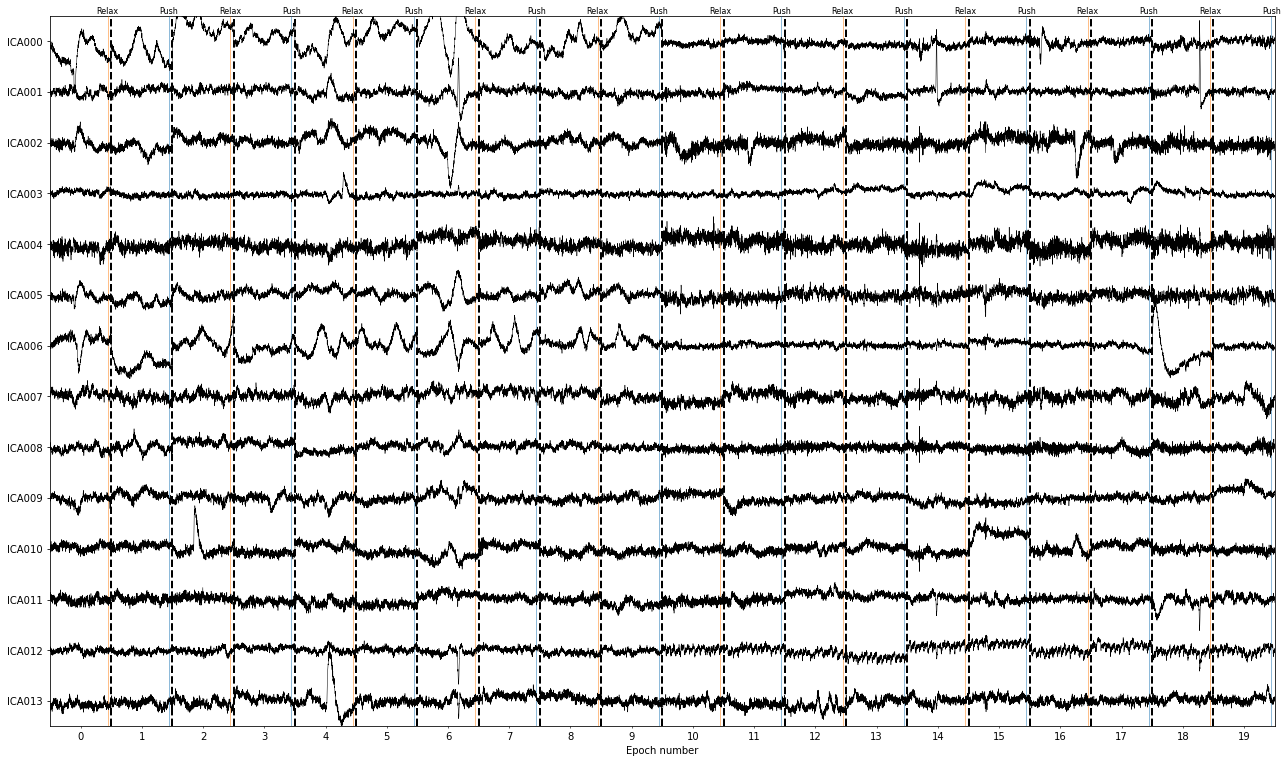

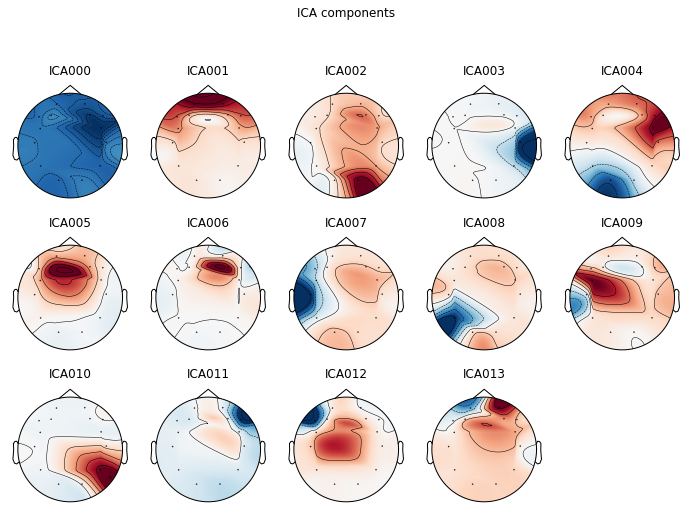

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


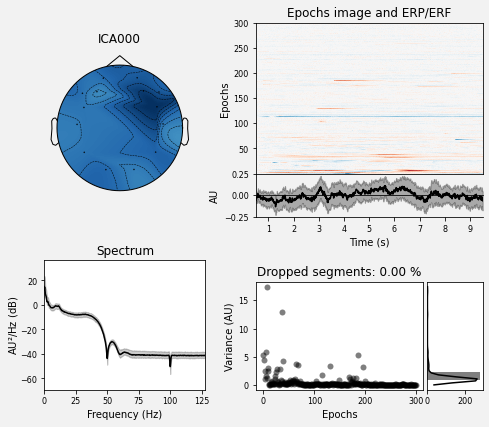

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


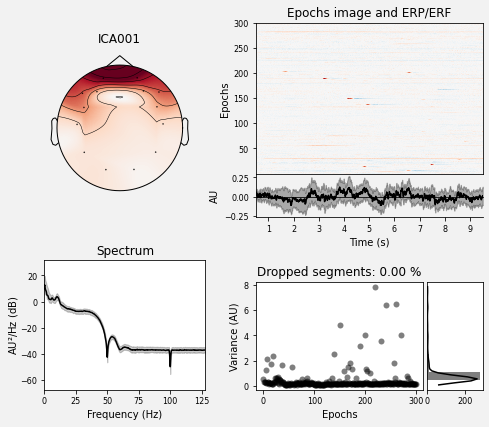

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


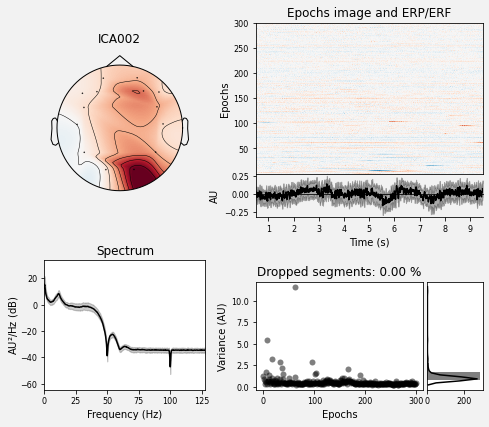

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


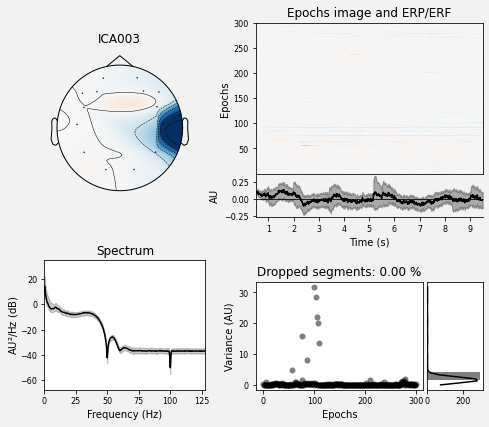

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


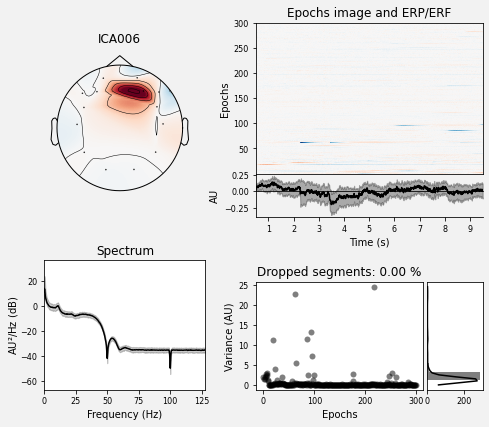

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


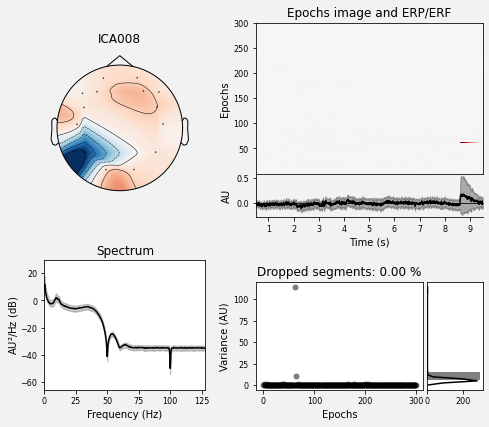

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


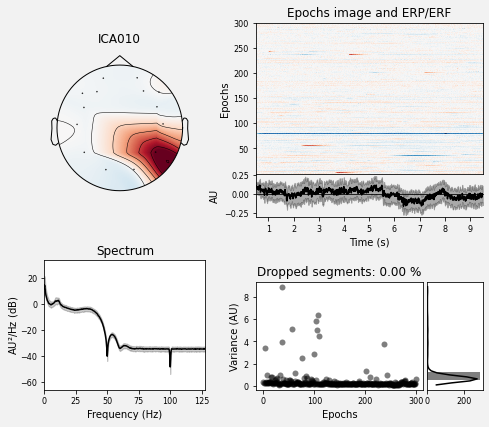

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


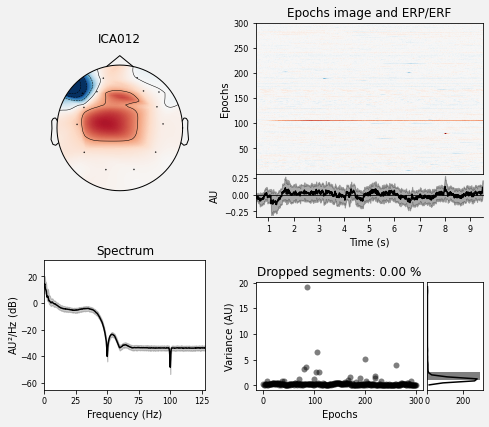

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [5]:
# first ICA; visualize the components

my_code.apply_ica(epochs_all)

# decide which components to reject and reject them

In [6]:
# components I am rejecting are:

# 1 for eyeblink
# 4,5 for shared heartbeat

In [7]:
epochs_ica = epochs_all.copy()
ica = ICA(n_components=14, random_state=97)
ica.fit(epochs_ica)
ica.exclude = [1,4,5]
epochs_ica = ica.apply(epochs_ica)

Fitting ICA to data using 14 channels (please be patient, this may take a while)


<ipython-input-7-12a24176b9df>:2: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=14, random_state=97)
<ipython-input-7-12a24176b9df>:3: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs_ica)


Selecting by number: 14 components
Fitting ICA took 5.2s.
Applying ICA to Epochs instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components


<ipython-input-7-12a24176b9df>:5: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_ica = ica.apply(epochs_ica)


In [8]:
# then peak-to-peak amplitude rejection threshold of 200 mV
# to make sure noisy epochs remaining after ICA are removed
# and don't contaminate our data

reject_criteria = dict(eeg=200e-6)

epochs_ica_ptp = epochs_ica.drop_bad(reject=reject_criteria)
epochs_ica_ptp.plot_drop_log()

# equalizing instance counts in order for ML algorithms 
# to classify the data accurately

epochs_ica_ptp.equalize_event_counts(epochs_ica_ptp.event_id)

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['FC6', 'F4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'FC5', 'P7', 'O1', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['FC6', 'F4', 'F

Dropped 14 epochs: 0, 7, 8, 11, 12, 17, 20, 127, 150, 153, 170, 211, 222, 239


(<Epochs |  234 events (all good), 0.5 - 9.5 sec, baseline 0.5 – 0.5 sec, ~57.6 MB, data loaded,
  'Push': 117
  'Relax': 117>,
 array([  0,   7,   8,  11,  12,  17,  20, 127, 150, 153, 170, 211, 222,
        239], dtype=int64))

In [9]:
print("Number of Push/Relax epochs per class is:", int(len(epochs_ica_ptp)/2))

Number of Push/Relax epochs per class is: 117


#### Automated approach: applying "Autoreject" on filtered data

Running autoreject on ch_type=eeg


D:\Anaconda\envs\tf\lib\site-packages\mne\bem.py:974: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
D:\Anaconda\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda\envs\tf\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(








Estimated consensus=0.10 and n_interpolate=1


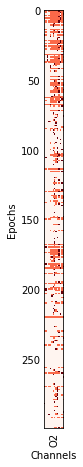

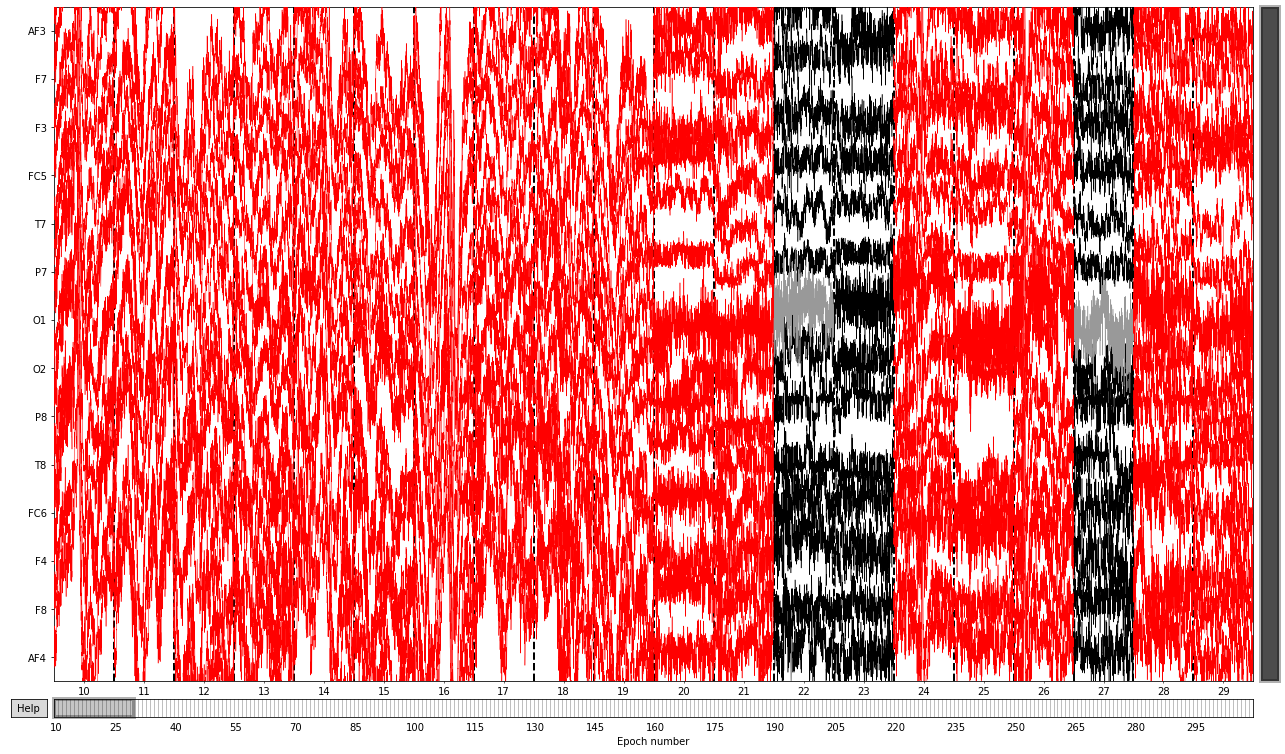


Dropped 156 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 72, 75, 76, 77, 79, 80, 83, 84, 85, 86, 95, 96, 99, 100, 102, 103, 104, 105, 107, 108, 109, 114, 116, 120, 122, 124, 129, 130, 133, 134, 135, 137, 138, 139, 140, 148, 149, 150, 154, 158, 159, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 195, 196, 197, 199, 200, 201, 202, 203, 204, 206, 209, 210, 215, 216, 218, 220, 227, 230, 234, 235, 237, 238, 240, 243, 256, 258, 259, 260, 268, 270, 271, 272, 273, 275, 276, 279, 284, 289, 290, 292, 299


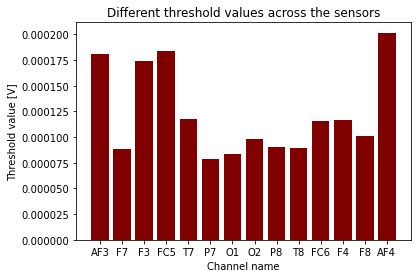

Dropped 22 epochs: 2, 3, 4, 5, 6, 7, 8, 9, 12, 39, 42, 43, 58, 61, 72, 73, 88, 89, 98, 117, 118, 137
Number of Push/Relax epochs per class is: 61


In [10]:
epochs_autoreject = epochs_all.copy()
epochs_autoreject, threshes = my_code.clean_epochs(epochs_autoreject)
epochs_autoreject.equalize_event_counts(epochs_autoreject.event_id)
print("Number of Push/Relax epochs per class is:", int(len(epochs_autoreject)/2))

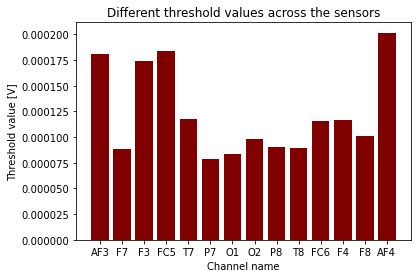

In [11]:
# plotting threshold values for the sensors

values = list(threshes.values())
plt.bar(epochs_all.ch_names, values, color ='maroon')

plt.xlabel("Channel name")
plt.ylabel("Threshold value [V]")
plt.title("Different threshold values across the sensors")
plt.show()

# Preliminary data investigation

# Time-frequency domain: plotting spectrograms over averaged push and relax epochs

### For all channels

#### Standard data cleaning approach

In [12]:
# we will use mortlett wavelets to do this 
# and we will carry out discrete wavelet transform
# it takes a number of parameters

# one of them is the frequencies for which we want to compute it
# define frequencies of interest (log-spaced)
# 20 frequencies in a log step 

freqs = np.logspace(*np.log10([8, 12]), num=20)

# n cycles determines length of mortlett waves 
n_cycles = freqs / 2.  


alpha_power_push_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
alpha_power_relax_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

freqs = np.logspace(*np.log10([12, 30]), num=20)
n_cycles = freqs / 2. 

beta_power_push_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
beta_power_relax_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

freqs = np.logspace(*np.log10([30, 80]), num=20)
n_cycles = freqs / 2. 

gamma_power_push_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
gamma_power_relax_standard, itc = mne.time_frequency.tfr_morlet(epochs_ica_ptp["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


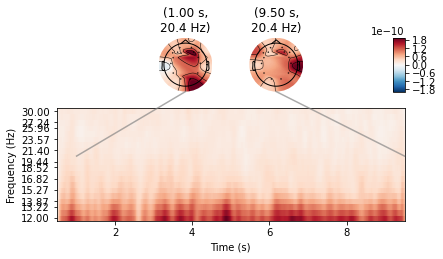

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


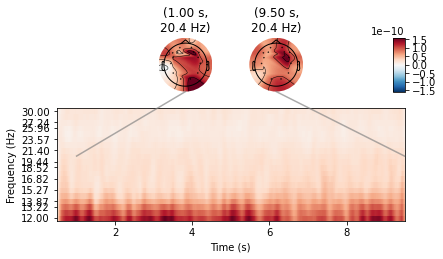

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


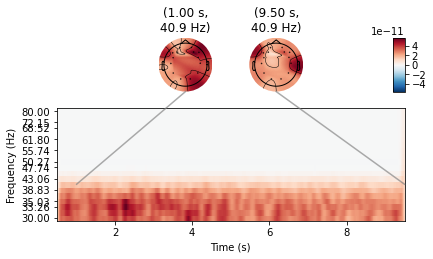

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


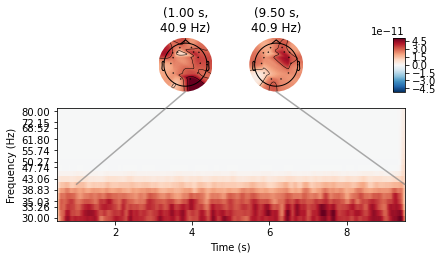

In [13]:
# plotting spectrograms for the 3 frequencies of interest
# together with that frequency's topomap at seconds 1 and 9.5 of the averaged epoch


alpha_power_push_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 10), (9.5, 10)])
plt.show()

alpha_power_relax_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 10), (9.5, 10)])
plt.show()


beta_power_push_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 20), (9.5, 20)])
plt.show()

beta_power_relax_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 20), (9.5, 20)])
plt.show()

gamma_power_push_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 40), (9.5, 40)])
plt.show()

gamma_power_relax_standard.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 40), (9.5, 40)])
plt.show()

#### Automated data cleaning approach

In [14]:
# we will use mortlett wavelets to do this 
# and we will carry out discrete wavelet transform
# it takes a number of parameters

# one of them is the frequencies for which we want to compute it
# define frequencies of interest (log-spaced)
# 20 frequencies in a log step 

freqs = np.logspace(*np.log10([8, 12]), num=20)

# n cycles determines length of mortlett waves 
n_cycles = freqs / 2.  


alpha_power_push_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
alpha_power_relax_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

freqs = np.logspace(*np.log10([12, 30]), num=20)
n_cycles = freqs / 2. 

beta_power_push_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
beta_power_relax_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

freqs = np.logspace(*np.log10([30, 80]), num=20)
n_cycles = freqs / 2. 

gamma_power_push_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Push"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)
gamma_power_relax_automated, itc = mne.time_frequency.tfr_morlet(epochs_autoreject["Relax"], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


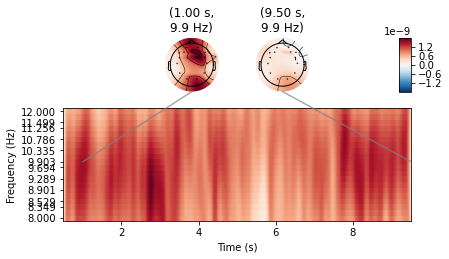

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


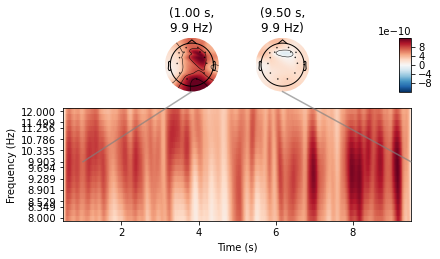

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


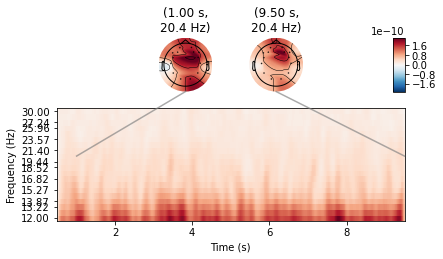

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


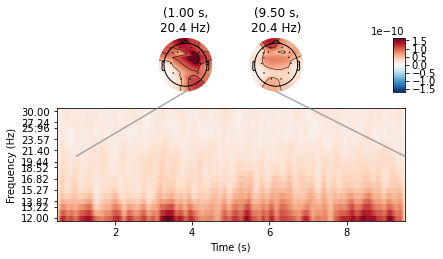

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


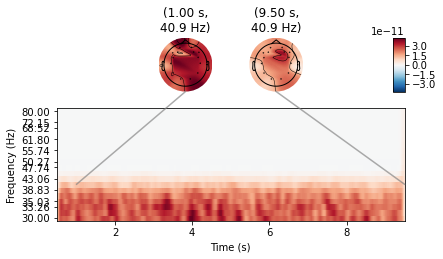

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


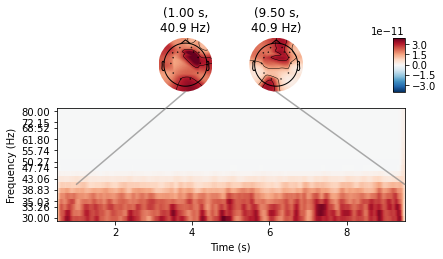

In [15]:
# plotting spectrograms for the 3 frequencies of interest
# together with that frequency's topomap at seconds 1 and 9.5 of the averaged epoch


alpha_power_push_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 10), (9.5, 10)])
plt.show()

alpha_power_relax_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 10), (9.5, 10)])
plt.show()


beta_power_push_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 20), (9.5, 20)])
plt.show()

beta_power_relax_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 20), (9.5, 20)])
plt.show()

gamma_power_push_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 40), (9.5, 40)])
plt.show()

gamma_power_relax_automated.plot_joint(baseline=baseline, mode='mean', tmin=None, tmax=None,
                 timefreqs=[(1, 40), (9.5, 40)])
plt.show()

## Time-frequency domain: plotting power values over time for averaged frequencies within a given band for averaged push and relax epochs

### For all channels

#### Standard data cleaning approach

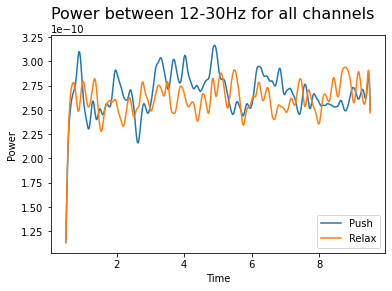

In [16]:
alpha_power_push_standard_data = alpha_power_push_standard.data

# currently, this vector is of shape (14,20,769)
# we will average both the frequency and channel dimensions 
# and make a 2D plot 

alpha_power_push_standard_data = alpha_power_push_standard_data.mean(axis=0)
alpha_power_push_standard_data = alpha_power_push_standard_data.mean(axis=0)


alpha_power_relax_standard_data = alpha_power_relax_standard.data
alpha_power_relax_standard_data = alpha_power_relax_standard_data.mean(axis=0)
alpha_power_relax_standard_data = alpha_power_relax_standard_data.mean(axis=0)



plt.figure(1)
plt.plot(alpha_power_push_standard.times,alpha_power_push_standard_data, label = "Push")
plt.plot(alpha_power_push_standard.times,alpha_power_relax_standard_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 8-12Hz for all channels', fontsize=16)
plt.legend()


beta_power_push_standard_data = beta_power_push_standard.data
beta_power_push_standard_data = beta_power_push_standard_data.mean(axis=0)
beta_power_push_standard_data = beta_power_push_standard_data.mean(axis=0)


beta_power_relax_standard_data = beta_power_relax_standard.data
beta_power_relax_standard_data = beta_power_relax_standard_data.mean(axis=0)
beta_power_relax_standard_data = beta_power_relax_standard_data.mean(axis=0)



plt.figure(2)
plt.plot(alpha_power_push_standard.times,beta_power_push_standard_data, label = "Push")
plt.plot(alpha_power_push_standard.times,beta_power_relax_standard_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 12-30Hz for all channels', fontsize=16)
plt.legend()



gamma_power_push_standard_data = gamma_power_push_standard.data
gamma_power_push_standard_data = gamma_power_push_standard_data.mean(axis=0)
gamma_power_push_standard_data = gamma_power_push_standard_data.mean(axis=0)


gamma_power_relax_standard_data = gamma_power_relax_standard.data
gamma_power_relax_standard_data = gamma_power_relax_standard_data.mean(axis=0)
gamma_power_relax_standard_data = gamma_power_relax_standard_data.mean(axis=0)



plt.figure(3)
plt.plot(alpha_power_push_standard.times,gamma_power_push_standard_data, label = "Push")
plt.plot(alpha_power_push_standard.times,gamma_power_relax_standard_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 30-80Hz for all channels', fontsize=16)
plt.legend()





#### Automated data cleaning approach

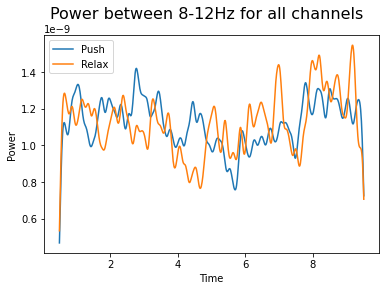

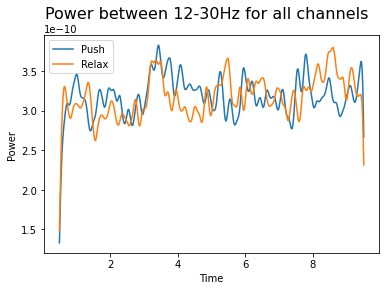

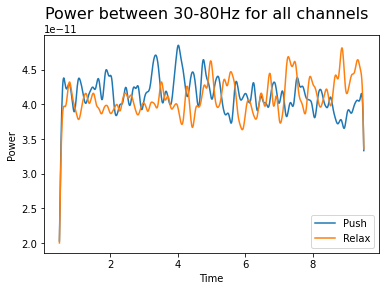

In [17]:
alpha_power_push_automated_data = alpha_power_push_automated.data

# currently, this vector is of shape (14,20,769)
# we will average both the frequency and channel dimensions 
# and make a 2D plot 

alpha_power_push_automated_data = alpha_power_push_automated_data.mean(axis=0)
alpha_power_push_automated_data = alpha_power_push_automated_data.mean(axis=0)


alpha_power_relax_automated_data = alpha_power_relax_automated.data
alpha_power_relax_automated_data = alpha_power_relax_automated_data.mean(axis=0)
alpha_power_relax_automated_data = alpha_power_relax_automated_data.mean(axis=0)



plt.figure(4)
plt.plot(alpha_power_push_standard.times,alpha_power_push_automated_data, label = "Push")
plt.plot(alpha_power_push_standard.times,alpha_power_relax_automated_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 8-12Hz for all channels', fontsize=16)
plt.legend()


beta_power_push_automated_data = beta_power_push_automated.data
beta_power_push_automated_data = beta_power_push_automated_data.mean(axis=0)
beta_power_push_automated_data = beta_power_push_automated_data.mean(axis=0)


beta_power_relax_automated_data = beta_power_relax_automated.data
beta_power_relax_automated_data = beta_power_relax_automated_data.mean(axis=0)
beta_power_relax_automated_data = beta_power_relax_automated_data.mean(axis=0)



plt.figure(5)
plt.plot(alpha_power_push_standard.times,beta_power_push_automated_data, label = "Push")
plt.plot(alpha_power_push_standard.times,beta_power_relax_automated_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 12-30Hz for all channels', fontsize=16)
plt.legend()



gamma_power_push_automated_data = gamma_power_push_automated.data
gamma_power_push_automated_data = gamma_power_push_automated_data.mean(axis=0)
gamma_power_push_automated_data = gamma_power_push_automated_data.mean(axis=0)


gamma_power_relax_automated_data = gamma_power_relax_automated.data
gamma_power_relax_automated_data = gamma_power_relax_automated_data.mean(axis=0)
gamma_power_relax_automated_data = gamma_power_relax_automated_data.mean(axis=0)



plt.figure(6)
plt.plot(alpha_power_push_standard.times,gamma_power_push_automated_data, label = "Push")
plt.plot(alpha_power_push_standard.times,gamma_power_relax_automated_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 30-80Hz for all channels', fontsize=16)
plt.legend()





### For occipital channels

#### Standard data cleaning approach

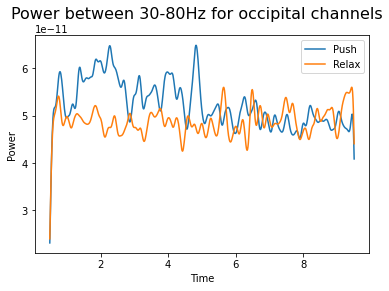

In [18]:
alpha_power_push_standard_01_02_data = alpha_power_push_standard.data[[6,7], :,:]
alpha_power_push_standard_01_02_data = alpha_power_push_standard_01_02_data.mean(axis=0)
alpha_power_push_standard_01_02_data = alpha_power_push_standard_01_02_data.mean(axis=0)

alpha_power_relax_standard_01_02_data = alpha_power_relax_standard.data[[6,7], :,:]
alpha_power_relax_standard_01_02_data = alpha_power_relax_standard_01_02_data.mean(axis=0)
alpha_power_relax_standard_01_02_data = alpha_power_relax_standard_01_02_data.mean(axis=0)

plt.figure(7)
plt.plot(alpha_power_push_standard.times,alpha_power_push_standard_01_02_data, label = "Push")
plt.plot(alpha_power_push_standard.times,alpha_power_relax_standard_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 8-12Hz for occipital channels', fontsize=16)
plt.legend()


beta_power_push_standard_01_02_data = beta_power_push_standard.data[[6,7], :,:]
beta_power_push_standard_01_02_data = beta_power_push_standard_01_02_data.mean(axis=0)
beta_power_push_standard_01_02_data = beta_power_push_standard_01_02_data.mean(axis=0)

beta_power_relax_standard_01_02_data = beta_power_relax_standard.data[[6,7], :,:]
beta_power_relax_standard_01_02_data = beta_power_relax_standard_01_02_data.mean(axis=0)
beta_power_relax_standard_01_02_data = beta_power_relax_standard_01_02_data.mean(axis=0)

plt.figure(8)
plt.plot(alpha_power_push_standard.times,beta_power_push_standard_01_02_data, label = "Push")
plt.plot(alpha_power_push_standard.times,beta_power_relax_standard_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 12-30Hz for occipital channels', fontsize=16)
plt.legend()



gamma_power_push_standard_01_02_data = gamma_power_push_standard.data[[6,7], :,:]
gamma_power_push_standard_01_02_data = gamma_power_push_standard_01_02_data.mean(axis=0)
gamma_power_push_standard_01_02_data = gamma_power_push_standard_01_02_data.mean(axis=0)

gamma_power_relax_standard_01_02_data = gamma_power_relax_standard.data[[6,7], :,:]
gamma_power_relax_standard_01_02_data = gamma_power_relax_standard_01_02_data.mean(axis=0)
gamma_power_relax_standard_01_02_data = gamma_power_relax_standard_01_02_data.mean(axis=0)

plt.figure(9)
plt.plot(alpha_power_push_standard.times,gamma_power_push_standard_01_02_data, label = "Push")
plt.plot(alpha_power_push_standard.times,gamma_power_relax_standard_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 30-80Hz for occipital channels', fontsize=16)
plt.legend()


#### Automated data cleaning approach

In [19]:
alpha_power_push_automated_01_02_data = alpha_power_push_automated.data[[6,7], :,:]
alpha_power_push_automated_01_02_data = alpha_power_push_automated_01_02_data.mean(axis=0)
alpha_power_push_automated_01_02_data = alpha_power_push_automated_01_02_data.mean(axis=0)

alpha_power_relax_automated_01_02_data = alpha_power_relax_automated.data[[6,7], :,:]
alpha_power_relax_automated_01_02_data = alpha_power_relax_automated_01_02_data.mean(axis=0)
alpha_power_relax_automated_01_02_data = alpha_power_relax_automated_01_02_data.mean(axis=0)

plt.figure(10)
plt.plot(alpha_power_push_automated.times,alpha_power_push_automated_01_02_data, label = "Push")
plt.plot(alpha_power_push_automated.times,alpha_power_relax_automated_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 8-12Hz for occipital channels', fontsize=16)
plt.legend()


beta_power_push_automated_01_02_data = beta_power_push_automated.data[[6,7], :,:]
beta_power_push_automated_01_02_data = beta_power_push_automated_01_02_data.mean(axis=0)
beta_power_push_automated_01_02_data = beta_power_push_automated_01_02_data.mean(axis=0)

beta_power_relax_automated_01_02_data = beta_power_relax_automated.data[[6,7], :,:]
beta_power_relax_automated_01_02_data = beta_power_relax_automated_01_02_data.mean(axis=0)
beta_power_relax_automated_01_02_data = beta_power_relax_automated_01_02_data.mean(axis=0)

plt.figure(11)
plt.plot(alpha_power_push_automated.times,beta_power_push_automated_01_02_data, label = "Push")
plt.plot(alpha_power_push_automated.times,beta_power_relax_automated_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 12-30Hz for occipital channels', fontsize=16)
plt.legend()



gamma_power_push_automated_01_02_data = gamma_power_push_automated.data[[6,7], :,:]
gamma_power_push_automated_01_02_data = gamma_power_push_automated_01_02_data.mean(axis=0)
gamma_power_push_automated_01_02_data = gamma_power_push_automated_01_02_data.mean(axis=0)

gamma_power_relax_automated_01_02_data = gamma_power_relax_automated.data[[6,7], :,:]
gamma_power_relax_automated_01_02_data = gamma_power_relax_automated_01_02_data.mean(axis=0)
gamma_power_relax_automated_01_02_data = gamma_power_relax_automated_01_02_data.mean(axis=0)

plt.figure(12)
plt.plot(alpha_power_push_automated.times,gamma_power_push_automated_01_02_data, label = "Push")
plt.plot(alpha_power_push_automated.times,gamma_power_relax_automated_01_02_data,label = "Relax")
plt.xlabel("Time")
plt.ylabel("Power")
plt.suptitle('Power between 30-80Hz for occipital channels', fontsize=16)
plt.legend()


# Feature Extraction

### Extracting time-frequency information with Discrete Wavelet Transform 

#### Extracting alpha, beta, gamma time-frequency data from epochs treated by the standard cleaning data approach

In [20]:
# extracting 20 frequency values per alpha, beta, gamma bands per epoch per channel at sampling rate of 85 Hz
# that means we are going from 2305 timepoints to 769 timepoints

freqs, alpha_push_power_standard, alpha_push_itc_standard, instances = my_code.create_time_frequency_matrices(8, 12, 20, 117, 14, 769, epochs_ica_ptp["Push"])
freqs, alpha_relax_power_standard, alpha_relax_itc_standard, instances = my_code.create_time_frequency_matrices(8, 12, 20, 117, 14, 769, epochs_ica_ptp["Relax"])
freqs, beta_push_power_standard, beta_push_itc_standard, instances = my_code.create_time_frequency_matrices(13, 30, 20, 117, 14, 769, epochs_ica_ptp["Push"])
freqs, beta_relax_power_standard, beta_relax_itc_standard, instances = my_code.create_time_frequency_matrices(13, 30, 20, 117, 14, 769, epochs_ica_ptp["Relax"])
freqs, gamma_push_power_standard, gamma_push_itc_standard, instances = my_code.create_time_frequency_matrices(30, 80, 20, 117, 14, 769, epochs_ica_ptp["Push"])
freqs, gamma_relax_power_standard, gamma_relax_itc_standard, instances = my_code.create_time_frequency_matrices(30, 80, 20, 117, 14, 769, epochs_ica_ptp["Relax"])

In [21]:
# exemplary shape of time-frequency data

alpha_push_power_standard.shape

(117, 14, 20, 769)

#### Creating combinations of alpha, beta, gamma time-frequency data extracted from epochs treated by the standard cleaning data approach

In [22]:
alpha_beta_push_power_standard = np.concatenate((alpha_push_power_standard, beta_push_power_standard), axis=3)
alpha_beta_relax_power_standard = np.concatenate((alpha_relax_power_standard, beta_relax_power_standard), axis=3)
alpha_beta_gamma_push_power_standard = np.concatenate((alpha_beta_push_power_standard, gamma_push_power_standard), axis=3)
alpha_beta_gamma_relax_power_standard = np.concatenate((alpha_beta_relax_power_standard, gamma_relax_power_standard), axis=3)
alpha_gamma_push_power_standard = np.concatenate((alpha_push_power_standard, gamma_push_power_standard), axis=3)
alpha_gamma_relax_power_standard = np.concatenate((alpha_relax_power_standard, gamma_relax_power_standard), axis=3)


In [23]:
# exemplary shape of combined time-frequency data

alpha_beta_push_power_standard.shape


(117, 14, 20, 1538)

In [24]:
# exemplary shape of combined time-frequency data

alpha_beta_gamma_push_power_standard.shape

(117, 14, 20, 2307)

#### Extracting alpha, beta, gamma time-frequency data from epochs treated by the automated cleaning data approach

In [25]:
# extracting 20 frequency values per alpha, beta, gamma bands per epoch per channel at sampling rate of 85 Hz
# that means we are going from 2305 timepoints to 769 timepoints

freqs, alpha_push_power_automated, alpha_push_itc_automated, instances = my_code.create_time_frequency_matrices(8, 12, 20, 61, 14, 769, epochs_autoreject["Push"])
freqs, alpha_relax_power_automated, alpha_relax_itc_automated, instances = my_code.create_time_frequency_matrices(8, 12, 20, 61, 14, 769, epochs_autoreject["Relax"])
freqs, beta_push_power_automated, beta_push_itc_automated, instances = my_code.create_time_frequency_matrices(13, 30, 20, 61, 14, 769, epochs_autoreject["Push"])
freqs, beta_relax_power_automated, beta_relax_itc_automated, instances = my_code.create_time_frequency_matrices(13, 30, 20, 61, 14, 769, epochs_autoreject["Relax"])
freqs, gamma_push_power_automated, gamma_push_itc_automated, instances = my_code.create_time_frequency_matrices(30, 80, 20, 61, 14, 769, epochs_autoreject["Push"])
freqs, gamma_relax_power_automated, gamma_relax_itc_automated, instances = my_code.create_time_frequency_matrices(30, 80, 20, 61, 14, 769, epochs_autoreject["Relax"])

In [26]:
# exemplary shape of time-frequency data

alpha_push_power_automated.shape

(61, 14, 20, 769)

#### Creating combinations of alpha, beta, gamma time-frequency data extracted from epochs treated by the automated cleaning data approach

In [27]:
alpha_beta_push_power_automated = np.concatenate((alpha_push_power_automated, beta_push_power_automated), axis=3)
alpha_beta_relax_power_automated = np.concatenate((alpha_relax_power_automated, beta_relax_power_automated), axis=3)
alpha_beta_gamma_push_power_automated = np.concatenate((alpha_beta_push_power_automated, gamma_push_power_automated), axis=3)
alpha_beta_gamma_relax_power_automated = np.concatenate((alpha_beta_relax_power_automated, gamma_relax_power_automated), axis=3)
alpha_gamma_push_power_automated = np.concatenate((alpha_push_power_automated, gamma_push_power_automated), axis=3)
alpha_gamma_relax_power_automated = np.concatenate((alpha_relax_power_automated, gamma_relax_power_automated), axis=3)


In [28]:
# exemplary shape of combined time-frequency data

alpha_beta_push_power_automated.shape


(61, 14, 20, 1538)

In [29]:
# exemplary shape of combined time-frequency data

alpha_beta_gamma_push_power_automated.shape

(61, 14, 20, 2307)

# Feature engineering

## Selecting the channels for different frequency bands where the class differences are the biggest

#### Standard data cleaning approach

In [30]:

alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, alpha_push_power_standard_channel_indices, alpha_push_power_standard_frequency_channel_differences_indexing = my_code.engineer_channels(alpha_push_power_standard,alpha_relax_power_standard,epochs_ica_ptp,117)
beta_push_power_standard_channel_engineered, beta_relax_power_standard_channel_engineered, beta_push_power_standard_channel_indices, beta_push_power_standard_frequency_channel_differences_indexing = my_code.engineer_channels(beta_push_power_standard,beta_relax_power_standard,epochs_ica_ptp,117)
gamma_push_power_standard_channel_engineered, gamma_relax_power_standard_channel_engineered, gamma_push_power_standard_channel_indices, gamma_push_power_standard_frequency_channel_differences_indexing = my_code.engineer_channels(gamma_push_power_standard,gamma_relax_power_standard,epochs_ica_ptp,117) 

#### Automated data cleaning approach

In [31]:
# selecting the channels for different frequency bands where the class differences are the biggest
alpha_push_power_automated_channel_engineered, alpha_relax_power_automated_channel_engineered, alpha_push_power_automated_channel_indices, alpha_push_power_automated_frequency_channel_differences_indexing = my_code.engineer_channels(alpha_push_power_automated,alpha_relax_power_automated,epochs_ica_ptp,61)
beta_push_power_automated_channel_engineered, beta_relax_power_automated_channel_engineered, beta_push_power_automated_channel_indices, beta_push_power_automated_frequency_channel_differences_indexing = my_code.engineer_channels(beta_push_power_automated,beta_relax_power_automated,epochs_ica_ptp,61)
gamma_push_power_automated_channel_engineered, gamma_relax_power_automated_channel_engineered, gamma_push_power_automated_channel_indices, gamma_push_power_automated_frequency_channel_differences_indexing = my_code.engineer_channels(gamma_push_power_automated,gamma_relax_power_automated,epochs_ica_ptp,61)


## Selecting timepoints for different frequency bands where the class differences are the biggest

#### Standard data cleaning approach

In [32]:
alpha_push_power_standard_time_engineered, alpha_relax_power_standard_time_engineered, alpha_push_power_standard_max_time_difference_index, alpha_push_power_standard_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(alpha_push_power_standard,alpha_relax_power_standard,epochs_ica_ptp)
beta_push_power_standard_time_engineered, beta_relax_power_standard_time_engineered, beta_push_power_standard_max_time_difference_index, beta_push_power_standard_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(beta_push_power_standard,beta_relax_power_standard,epochs_ica_ptp)
gamma_push_power_standard_time_engineered, gamma_relax_power_standard_time_engineered, gamma_push_power_standard_max_time_difference_index, gamma_push_power_standard_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(gamma_push_power_standard,gamma_relax_power_standard,epochs_ica_ptp)


#### Automated data cleaning approach

In [33]:
alpha_push_power_automated_time_engineered, alpha_relax_power_automated_time_engineered, alpha_push_power_automated_max_time_difference_index, alpha_push_power_automated_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(alpha_push_power_automated,alpha_relax_power_automated,epochs_ica_ptp)
beta_push_power_automated_time_engineered, beta_relax_power_automated_time_engineered, beta_push_power_automated_max_time_difference_index, beta_push_power_automated_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(beta_push_power_automated,beta_relax_power_automated,epochs_ica_ptp)
gamma_push_power_automated_time_engineered, gamma_relax_power_automated_time_engineered, gamma_push_power_automated_max_time_difference_index, gamma_push_power_automated_averaged_frequency_differences_per_channel_in_intervals = my_code.engineer_time(gamma_push_power_automated,gamma_relax_power_automated,epochs_ica_ptp)


## Selecting channels and timepoints for different frequency bands where the class differences are the biggest

#### Standard data cleaning approach

In [34]:
alpha_push_power_standard_channel_time_engineered, alpha_relax_power_standard_channel_time_engineered, alpha_push_power_standard_max_time_difference_index, alpha_push_power_standard_channel_indices = my_code.engineer_channels_time(alpha_push_power_standard,alpha_relax_power_standard,epochs_ica_ptp,117)
beta_push_power_standard_channel_time_engineered, beta_relax_power_standard_channel_time_engineered, beta_push_power_standard_max_time_difference_index, beta_push_power_standard_channel_indices = my_code.engineer_channels_time(beta_push_power_standard,beta_relax_power_standard,epochs_ica_ptp,117)
gamma_push_power_standard_channel_time_engineered, gamma_relax_power_standard_channel_time_engineered, gamma_push_power_standard_max_time_difference_index, gamma_push_power_standard_channel_indices = my_code.engineer_channels_time(gamma_push_power_standard,gamma_relax_power_standard,epochs_ica_ptp,117)


#### Automated data cleaning approach

In [35]:
alpha_push_power_automated_channel_time_engineered, alpha_relax_power_automated_channel_time_engineered, alpha_push_power_automated_max_time_difference_index, alpha_push_power_automated_channel_indices = my_code.engineer_channels_time(alpha_push_power_automated,alpha_relax_power_automated,epochs_ica_ptp,61)
beta_push_power_automated_channel_time_engineered, beta_relax_power_automated_channel_time_engineered, beta_push_power_automated_max_time_difference_index, beta_push_power_automated_channel_indices = my_code.engineer_channels_time(beta_push_power_automated,beta_relax_power_automated,epochs_ica_ptp,61)
gamma_push_power_automated_channel_time_engineered, gamma_relax_power_automated_channel_time_engineered, gamma_push_power_automated_max_time_difference_index, gamma_push_power_automated_channel_indices = my_code.engineer_channels_time(gamma_push_power_automated,gamma_relax_power_automated,epochs_ica_ptp,61)


# Classification - standard data cleaning condition

## LDA

### Raw data

In [36]:
raw_push_standard = epochs_ica_ptp["Push"].get_data()
raw_relax_standard = epochs_ica_ptp["Relax"].get_data()
raw_standard = np.concatenate((raw_push_standard, raw_relax_standard), axis=0)
raw_standard = raw_standard.reshape(234,-1)
labels = np.concatenate((np.zeros(117), np.ones(117)))

In [37]:
lda_raw_standard_results = my_code.lda_for_ready_input(raw_standard, labels)

LDA Classification accuracy: 0.4957446808510637


### Frequency data

In [38]:
lda_alpha_standard_results = my_code.run_lda(alpha_push_power_standard, alpha_relax_power_standard, 117)

LDA Classification accuracy: 0.502127659574468


In [39]:
lda_beta_standard_results = my_code.run_lda(beta_push_power_standard, beta_relax_power_standard, 117)

LDA Classification accuracy: 0.5382978723404255


In [40]:
lda_gamma_standard_results = my_code.run_lda(gamma_push_power_standard, gamma_relax_power_standard, 117)

LDA Classification accuracy: 0.5127659574468085


In [41]:
lda_alpha_beta_standard_results = my_code.run_lda(alpha_beta_push_power_standard, alpha_beta_relax_power_standard, 117)

LDA Classification accuracy: 0.5255319148936171


In [42]:
lda_alpha_beta_gamma_standard_results = my_code.run_lda(alpha_beta_gamma_push_power_standard, alpha_beta_gamma_relax_power_standard, 117)

LDA Classification accuracy: 0.5127659574468086


In [43]:
lda_alpha_gamma_standard_results = my_code.run_lda(alpha_gamma_push_power_standard, alpha_gamma_relax_power_standard, 117)

LDA Classification accuracy: 0.5021276595744681


### Engineered frequency data

In [44]:
lda_alpha_standard_results_channel_engineered = my_code.run_lda(alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, 117)

LDA Classification accuracy: 0.5276595744680852


In [45]:
lda_beta_standard_results_channel_engineered = my_code.run_lda(beta_push_power_standard_channel_engineered, beta_relax_power_standard_channel_engineered, 117)

LDA Classification accuracy: 0.5297872340425532


In [46]:
lda_gamma_standard_results_channel_engineered = my_code.run_lda(gamma_push_power_standard_channel_engineered, gamma_relax_power_standard_channel_engineered, 117)

LDA Classification accuracy: 0.5489361702127658


In [47]:
lda_alpha_standard_results_channel_engineered = my_code.run_lda(alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, 117)

LDA Classification accuracy: 0.5276595744680852


In [48]:
lda_alpha_standard_results_time_engineered = my_code.run_lda(alpha_push_power_standard_time_engineered, alpha_relax_power_standard_time_engineered, 117)

LDA Classification accuracy: 0.4936170212765957


In [49]:
lda_beta_standard_results_time_engineered = my_code.run_lda(beta_push_power_standard_time_engineered, beta_relax_power_standard_time_engineered, 117)

LDA Classification accuracy: 0.551063829787234


In [50]:
lda_gamma_standard_results_time_engineered = my_code.run_lda(gamma_push_power_standard_time_engineered, gamma_relax_power_standard_time_engineered, 117)

LDA Classification accuracy: 0.48723404255319147


In [51]:
lda_alpha_standard_results_channel_time_engineered = my_code.run_lda(alpha_push_power_standard_channel_time_engineered, alpha_relax_power_standard_channel_time_engineered, 117)

LDA Classification accuracy: 0.5446808510638297


In [52]:
lda_beta_standard_results_channel_time_engineered = my_code.run_lda(beta_push_power_standard_channel_time_engineered, beta_relax_power_standard_channel_time_engineered, 117)

LDA Classification accuracy: 0.5234042553191489


In [53]:
lda_gamma_standard_results_channel_time_engineered = my_code.run_lda(gamma_push_power_standard_channel_time_engineered, gamma_relax_power_standard_channel_time_engineered, 117)

LDA Classification accuracy: 0.5170212765957447


## SVM

### Raw data

In [54]:
raw_push_standard = epochs_ica_ptp["Push"].get_data()
raw_relax_standard = epochs_ica_ptp["Relax"].get_data()
raw_standard = np.concatenate((raw_push_standard, raw_relax_standard), axis=0)
raw_standard = raw_standard.reshape(234,-1)
labels = np.concatenate((np.zeros(117), np.ones(117)))

In [55]:
svm_raw_standard_results = my_code.svm_for_ready_input(raw_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.4653846153846154 (std. 0.14004906625856098)


### Frequency data

In [56]:
svm_alpha_standard_results = my_code.run_svm(alpha_push_power_standard, alpha_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.4858974358974359 (std. 0.1502627547448497)


In [57]:
svm_beta_standard_results = my_code.run_svm(beta_push_power_standard, beta_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5499999999999999 (std. 0.15056872241916702)


In [58]:
svm_gamma_standard_results = my_code.run_svm(gamma_push_power_standard, gamma_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5747863247863247 (std. 0.15164679098054773)


In [59]:
svm_alpha_beta_standard_results = my_code.run_svm(alpha_beta_push_power_standard, alpha_beta_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.564957264957265 (std. 0.15096059332759224)


In [60]:
svm_alpha_beta_gamma_standard_results = my_code.run_svm(alpha_beta_gamma_push_power_standard, alpha_beta_gamma_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.614102564102564 (std. 0.16412760225655282)


In [61]:
svm_alpha_gamma_standard_results = my_code.run_svm(alpha_gamma_push_power_standard, alpha_gamma_relax_power_standard, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5837606837606839 (std. 0.1552264763726016)


### Engineered frequency data

In [62]:
svm_alpha_standard_results_channel_engineered = my_code.run_svm(alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.46153846153846156 (std. 0.14869584274254335)


In [63]:
svm_beta_standard_results_channel_engineered = my_code.run_svm(beta_push_power_standard_channel_engineered, beta_relax_power_standard_channel_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5444444444444444 (std. 0.1563168185713908)


In [64]:
svm_gamma_standard_results_channel_engineered = my_code.run_svm(gamma_push_power_standard_channel_engineered, gamma_relax_power_standard_channel_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.594017094017094 (std. 0.16630247300719075)


In [65]:
svm_alpha_standard_results_time_engineered = my_code.run_svm(alpha_push_power_standard_time_engineered, alpha_relax_power_standard_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.505982905982906 (std. 0.15066269468930404)


In [66]:
svm_beta_standard_results_time_engineered = my_code.run_svm(beta_push_power_standard_time_engineered, beta_relax_power_standard_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5320512820512819 (std. 0.14035387791352574)


In [67]:
svm_gamma_standard_results_time_engineered = my_code.run_svm(gamma_push_power_standard_time_engineered, gamma_relax_power_standard_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5854700854700855 (std. 0.15121443271287452)


In [68]:
svm_alpha_standard_results_channel_time_engineered = my_code.run_svm(alpha_push_power_standard_channel_time_engineered, alpha_relax_power_standard_channel_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5269230769230769 (std. 0.1510700383133685)


In [69]:
svm_beta_standard_results_channel_time_engineered = my_code.run_svm(beta_push_power_standard_channel_time_engineered, beta_relax_power_standard_channel_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5846153846153845 (std. 0.15197581038705069)


In [70]:
svm_gamma_standard_results_channel_time_engineered = my_code.run_svm(gamma_push_power_standard_channel_time_engineered, gamma_relax_power_standard_channel_time_engineered, 117)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.6213675213675213 (std. 0.15815661383797386)


## LSTM

### Raw data

In [71]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_raw_for_DL_input(epochs_ica_ptp, 117, 187, 93, 46)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            16588288  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

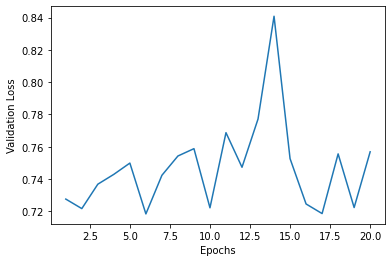

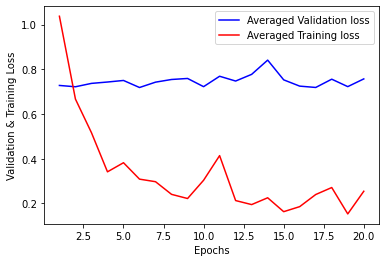

0.43172041972478226
0.8548387040694554


In [72]:
LSTM_all_loss_histories_raw_standard, LSTM_all_acc_histories_raw_standard, LSTM_all_training_accuracies_histories_raw_standard, LSTM_all_training_losses_histories_raw_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

### Frequency data

In [73]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard, alpha_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

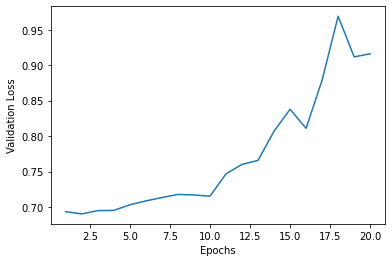

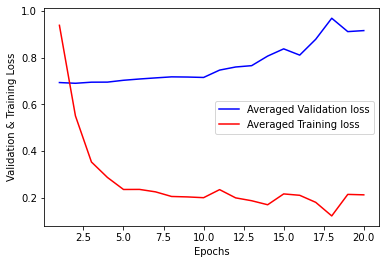

0.5026881704727809
0.8840000008543333


In [74]:
LSTM_all_loss_histories_alpha_standard, LSTM_all_acc_histories_alpha_standard, LSTM_all_training_accuracies_histories_alpha_standard, LSTM_all_training_losses_histories_alpha_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

In [75]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard, beta_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

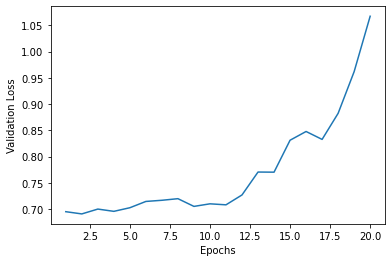

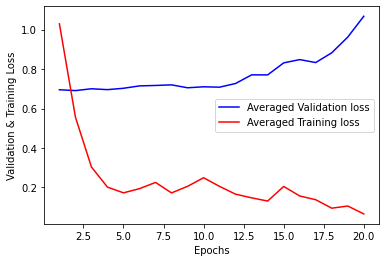

0.5102150489886601
0.9038666650652886


In [76]:
LSTM_all_loss_histories_beta_standard, LSTM_all_acc_histories_beta_standard, LSTM_all_training_accuracies_histories_beta_standard, LSTM_all_training_losses_histories_beta_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

In [77]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard, gamma_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

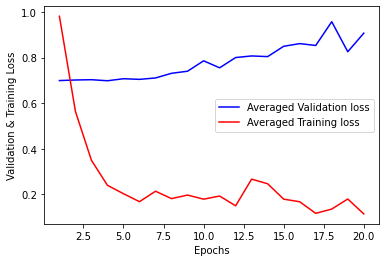

0.5040322591861088
0.898933331668377


In [78]:
LSTM_all_loss_histories_gamma_standard, LSTM_all_acc_histories_gamma_standard, LSTM_all_training_accuracies_histories_gamma_standard, LSTM_all_training_losses_histories_gamma_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

In [79]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_push_power_standard, alpha_beta_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11090432  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

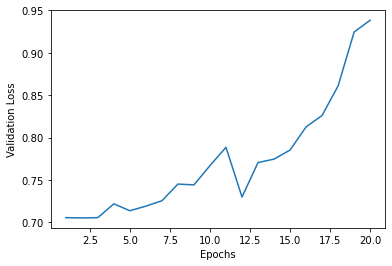

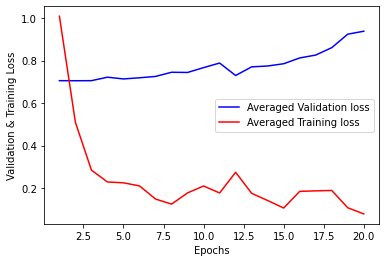

0.5188172047336896
0.9003999983270964


In [80]:
LSTM_all_loss_histories_alpha_beta_standard, LSTM_all_acc_histories_alpha_beta_standard, LSTM_all_training_accuracies_histories_alpha_beta_standard, LSTM_all_training_losses_histories_alpha_beta_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

In [81]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_gamma_push_power_standard, alpha_beta_gamma_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            16602624  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

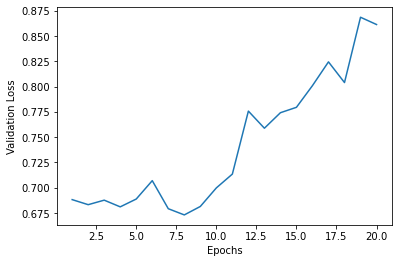

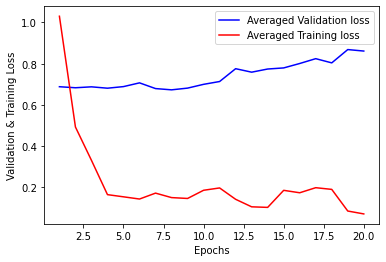

0.5577957039078079
0.9094666669766106


In [82]:
LSTM_all_loss_histories_alpha_beta_gamma_standard, LSTM_all_acc_histories_alpha_beta_gamma_standard, LSTM_all_training_accuracies_histories_alpha_beta_gamma_standard, LSTM_all_training_losses_histories_alpha_beta_gamma_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

In [83]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_gamma_push_power_standard, alpha_gamma_relax_power_standard, 117, 187, 93, 46)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11090432  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

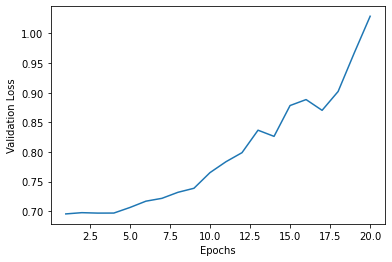

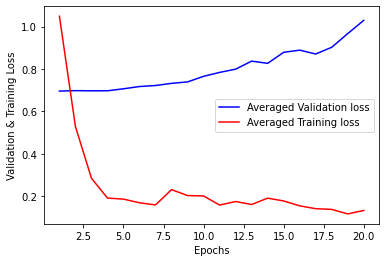

0.4981182783842087
0.9014666631817818


In [84]:
LSTM_all_loss_histories_alpha_gamma_standard, LSTM_all_acc_histories_alpha_gamma_standard, LSTM_all_training_accuracies_histories_alpha_gamma_standard, LSTM_all_training_losses_histories_alpha_gamma_standard = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

### Engineered frequency data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

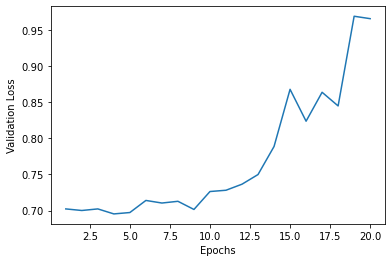

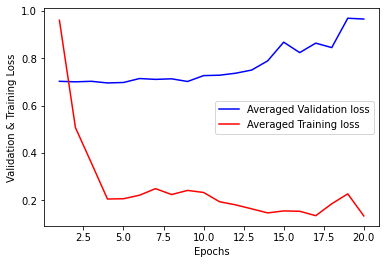

0.5083333358168601
0.8936000009377796


In [85]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_alpha_standard_channel_engineered, LSTM_all_acc_histories_alpha_standard_channel_engineered, LSTM_all_training_accuracies_histories_alpha_standard_channel_engineered, LSTM_all_training_losses_histories_alpha_standard_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

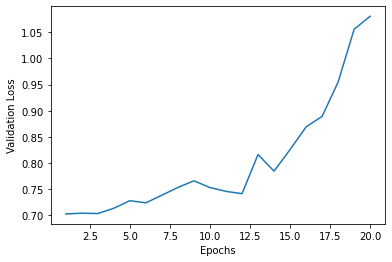

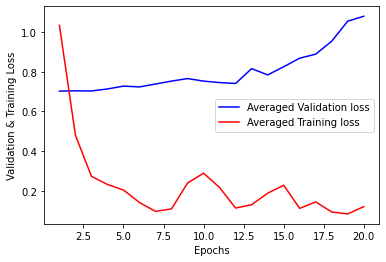

0.49005376050869626
0.9054666653275489


In [86]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_channel_engineered, beta_relax_power_standard_channel_engineered, 117, 187, 93, 46)
LSTM_all_loss_histories_beta_standard_channel_engineered, LSTM_all_acc_histories_beta_standard_channel_engineered, LSTM_all_training_accuracies_histories_beta_standard_channel_engineered, LSTM_all_training_losses_histories_beta_standard_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

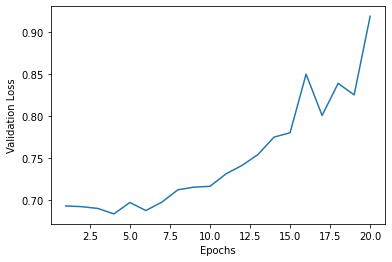

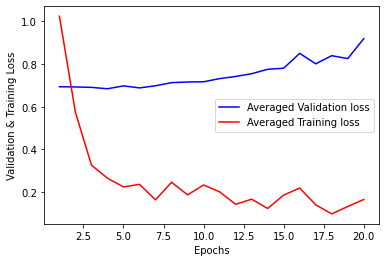

0.5244623636205991
0.8989333306749663


In [87]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_channel_engineered, gamma_relax_power_standard_channel_engineered, 117, 187, 93, 46)
LSTM_all_loss_histories_gamma_standard_channel_engineered, LSTM_all_acc_histories_gamma_standard_channel_engineered, LSTM_all_training_accuracies_histories_gamma_standard_channel_engineered, LSTM_all_training_losses_histories_gamma_standard_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

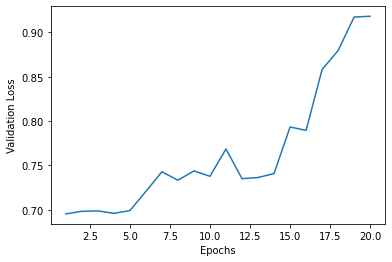

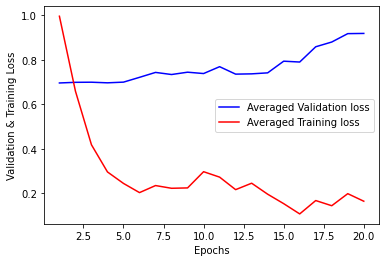

0.4868279531598092
0.8805333306392035


In [88]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_time_engineered, alpha_relax_power_standard_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_alpha_standard_time_engineered, LSTM_all_acc_histories_alpha_standard_time_engineered, LSTM_all_training_accuracies_histories_alpha_standard_time_engineered, LSTM_all_training_losses_histories_alpha_standard_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

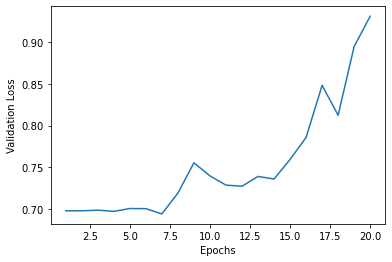

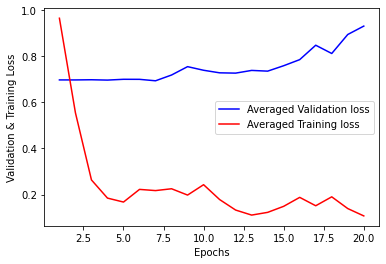

0.5115591411789258
0.9049333343903225


In [89]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_time_engineered, beta_relax_power_standard_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_beta_standard_time_engineered, LSTM_all_acc_histories_beta_standard_time_engineered, LSTM_all_training_accuracies_histories_beta_standard_time_engineered, LSTM_all_training_losses_histories_beta_standard_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

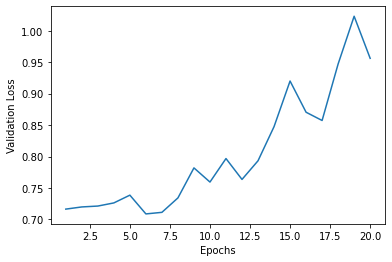

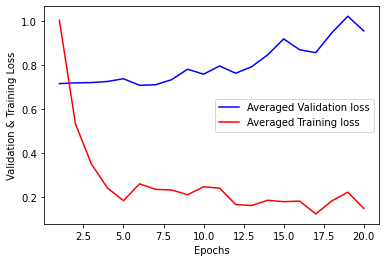

0.4787634402513504
0.8913333336512247


In [90]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_time_engineered, gamma_relax_power_standard_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_gamma_standard_time_engineered, LSTM_all_acc_histories_gamma_standard_time_engineered, LSTM_all_training_accuracies_histories_gamma_standard_time_engineered, LSTM_all_training_losses_histories_gamma_standard_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1712640   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

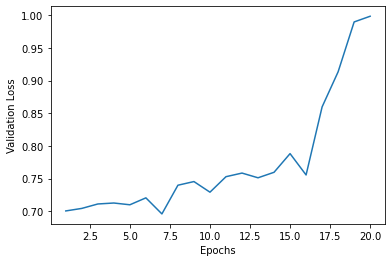

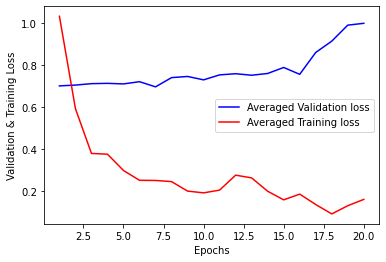

0.505376347899437
0.8802666683991751


In [91]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_channel_time_engineered, alpha_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_alpha_standard_channel_time_engineered, LSTM_all_acc_histories_alpha_standard_channel_time_engineered, LSTM_all_training_accuracies_histories_alpha_standard_channel_time_engineered, LSTM_all_training_losses_histories_alpha_standard_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1712640   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

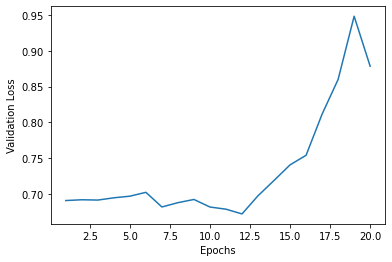

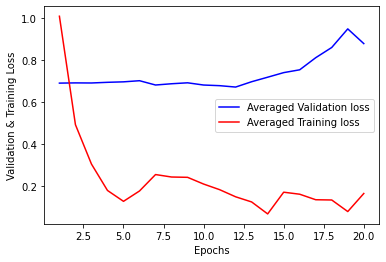

0.540591397881508
0.9081333339214324


In [92]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_channel_time_engineered, beta_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_beta_standard_channel_time_engineered, LSTM_all_acc_histories_beta_standard_channel_time_engineered, LSTM_all_training_accuracies_histories_beta_standard_channel_time_engineered, LSTM_all_training_losses_histories_beta_standard_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1712640   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

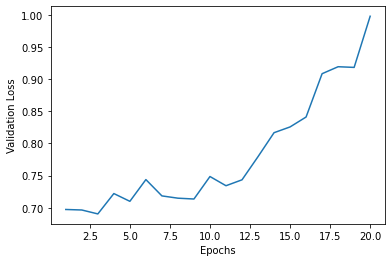

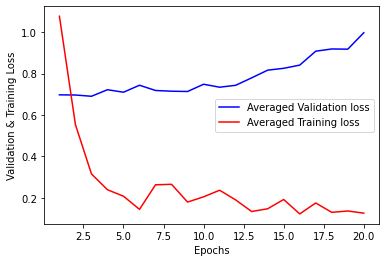

0.5005376309156417
0.9005333314339321


In [93]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_channel_time_engineered, gamma_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

LSTM_all_loss_histories_gamma_standard_channel_time_engineered, LSTM_all_acc_histories_gamma_standard_channel_time_engineered, LSTM_all_training_accuracies_histories_gamma_standard_channel_time_engineered, LSTM_all_training_losses_histories_gamma_standard_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


## CONV1D

### Raw data

In [94]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_raw_for_DL_input(epochs_ica_ptp, 117, 187, 93, 46)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            16522752  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

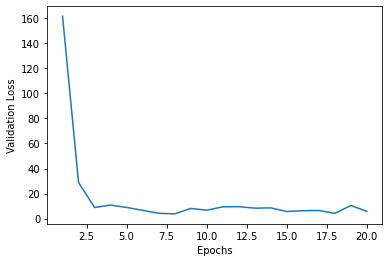

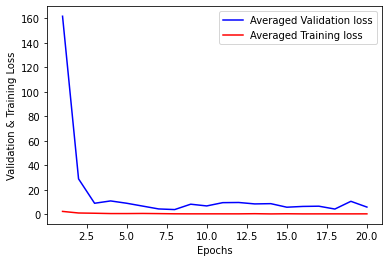

0.4483870853980382
0.8206989243626595


In [95]:
CONV1D_all_loss_histories_raw_standard, CONV1D_all_acc_histories_raw_standard, CONV1D_all_training_accuracies_histories_raw_standard, CONV1D_all_training_losses_histories_raw_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

### Frequency data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

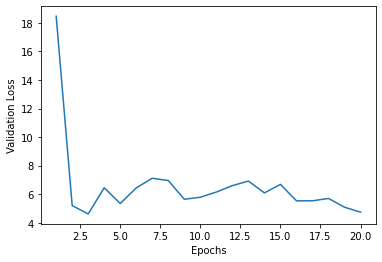

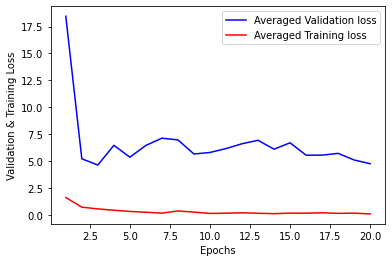

0.4758064468701681
0.882933335006237


In [96]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard, alpha_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_alpha_standard, CONV1D_all_acc_histories_alpha_standard, CONV1D_all_training_accuracies_histories_alpha_standard, CONV1D_all_training_losses_histories_alpha_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

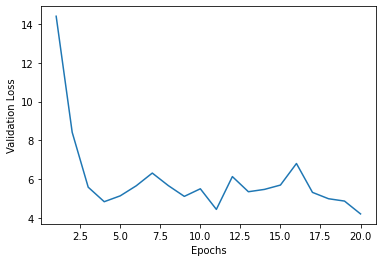

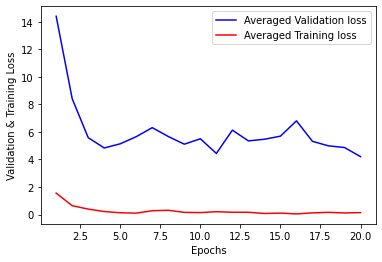

0.5341397851705552
0.9044000029563903


In [97]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard, beta_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_beta_standard, CONV1D_all_acc_histories_beta_standard, CONV1D_all_training_accuracies_histories_beta_standard, CONV1D_all_training_losses_histories_beta_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

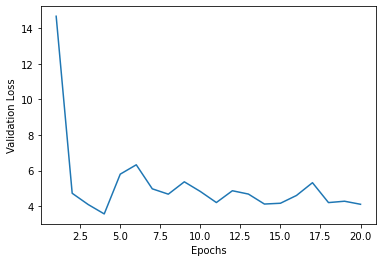

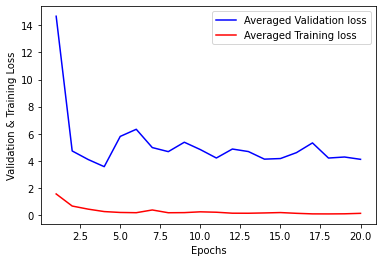

0.55537635187308
0.9009333342313767


In [98]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard, gamma_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_gamma_standard, CONV1D_all_acc_histories_gamma_standard, CONV1D_all_training_accuracies_histories_gamma_standard, CONV1D_all_training_losses_histories_gamma_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            11024896  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

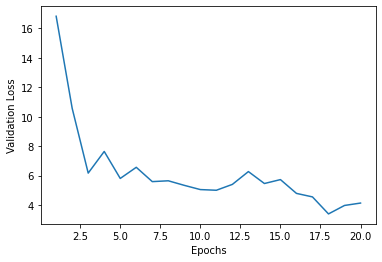

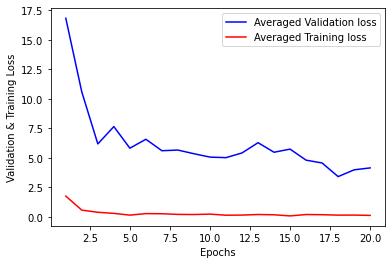

0.5266129036744436
0.9029333338141441


In [99]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_push_power_standard, alpha_beta_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_alpha_beta_standard, CONV1D_all_acc_histories_alpha_beta_standard, CONV1D_all_training_accuracies_histories_alpha_beta_standard, CONV1D_all_training_losses_histories_alpha_beta_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            16537088  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

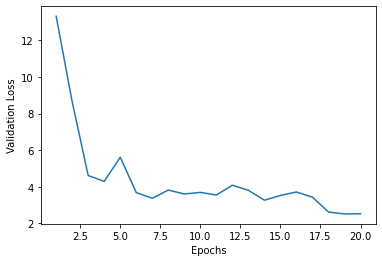

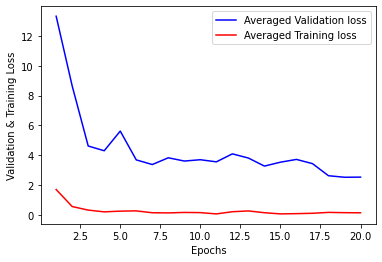

0.5655914008617401
0.9054666693011921


In [100]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_gamma_push_power_standard, alpha_beta_gamma_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_alpha_beta_gamma_standard, CONV1D_all_acc_histories_alpha_beta_gamma_standard, CONV1D_all_training_accuracies_histories_alpha_beta_gamma_standard, CONV1D_all_training_losses_histories_alpha_beta_gamma_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            11024896  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

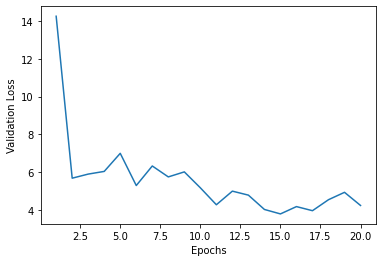

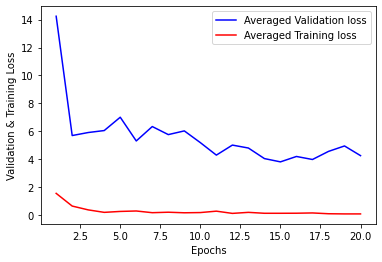

0.5115591401855151
0.9072000026702881


In [101]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_gamma_push_power_standard, alpha_gamma_relax_power_standard, 117, 187, 93, 46)
CONV1D_all_loss_histories_alpha_gamma_standard, CONV1D_all_acc_histories_alpha_gamma_standard, CONV1D_all_training_accuracies_histories_alpha_gamma_standard, CONV1D_all_training_losses_histories_alpha_gamma_standard = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

### Engineered frequency data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

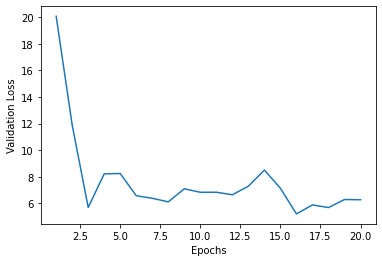

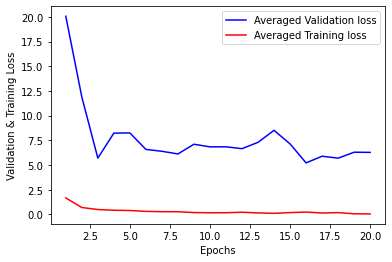

0.49704300910234445
0.8768000011642773


In [102]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_channel_engineered, alpha_relax_power_standard_channel_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_alpha_standard_channel_engineered, CONV1D_all_acc_histories_alpha_standard_channel_engineered, CONV1D_all_training_accuracies_histories_alpha_standard_channel_engineered, CONV1D_all_training_losses_histories_alpha_standard_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

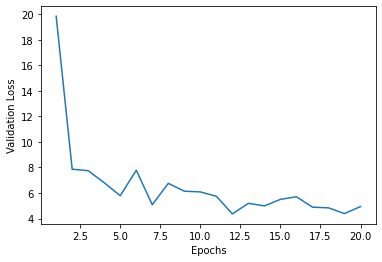

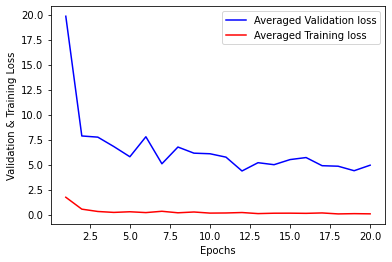

0.543279571334521
0.9086666678388914


In [103]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_channel_engineered, beta_relax_power_standard_channel_engineered, 117, 187, 93, 46)
CONV1D_all_loss_histories_beta_standard_channel_engineered, CONV1D_all_acc_histories_beta_standard_channel_engineered, CONV1D_all_training_accuracies_histories_beta_standard_channel_engineered, CONV1D_all_training_losses_histories_beta_standard_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

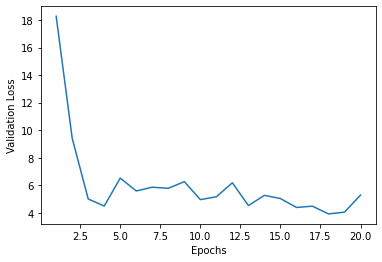

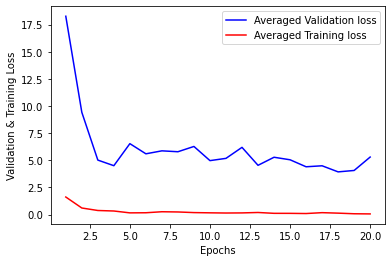

0.5532258088390032
0.904133335749308


In [104]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_channel_engineered, gamma_relax_power_standard_channel_engineered, 117, 187, 93, 46)
CONV1D_all_loss_histories_gamma_standard_channel_engineered, CONV1D_all_acc_histories_gamma_standard_channel_engineered, CONV1D_all_training_accuracies_histories_gamma_standard_channel_engineered, CONV1D_all_training_losses_histories_gamma_standard_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

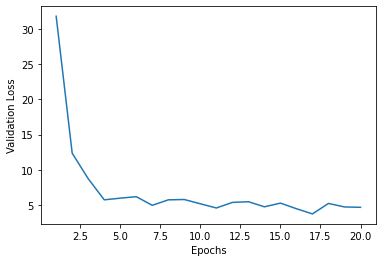

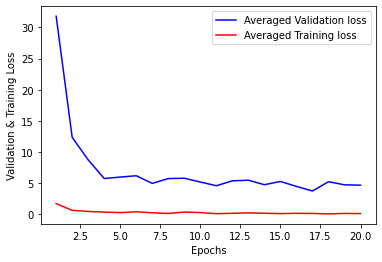

0.5400537664691608
0.880266666909059


In [105]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_time_engineered, alpha_relax_power_standard_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_alpha_standard_time_engineered, CONV1D_all_acc_histories_alpha_standard_time_engineered, CONV1D_all_training_accuracies_histories_alpha_standard_time_engineered, CONV1D_all_training_losses_histories_alpha_standard_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

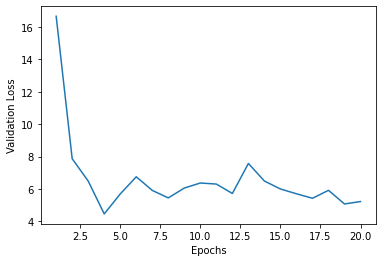

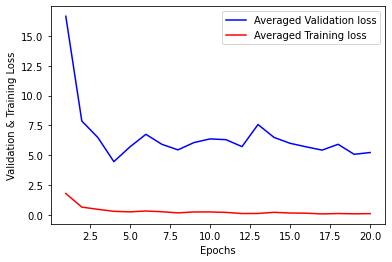

0.5034946228067081
0.8893333375453947


In [106]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_time_engineered, beta_relax_power_standard_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_beta_standard_time_engineered, CONV1D_all_acc_histories_beta_standard_time_engineered, CONV1D_all_training_accuracies_histories_beta_standard_time_engineered, CONV1D_all_training_losses_histories_beta_standard_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

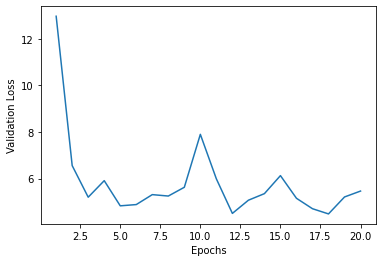

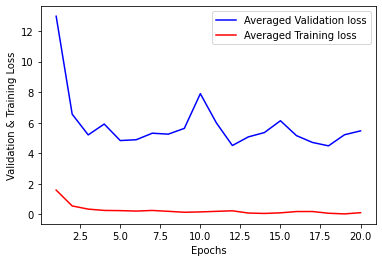

0.5255376319090526
0.9061333333452541


In [107]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_time_engineered, gamma_relax_power_standard_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_gamma_standard_time_engineered, CONV1D_all_acc_histories_gamma_standard_time_engineered, CONV1D_all_training_accuracies_histories_gamma_standard_time_engineered, CONV1D_all_training_losses_histories_gamma_standard_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            1647104   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

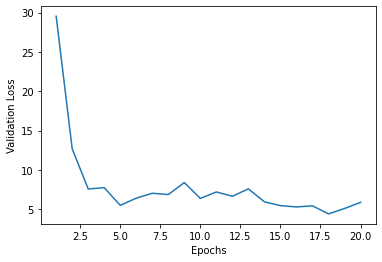

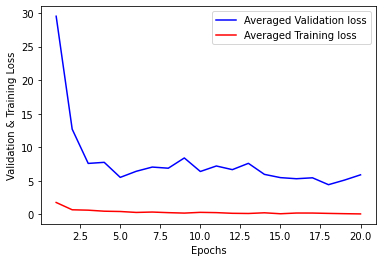

0.5381720458467802
0.8714666704336803


In [108]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_standard_channel_time_engineered, alpha_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_alpha_standard_channel_time_engineered, CONV1D_all_acc_histories_alpha_standard_channel_time_engineered, CONV1D_all_training_accuracies_histories_alpha_standard_channel_time_engineered, CONV1D_all_training_losses_histories_alpha_standard_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            1647104   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

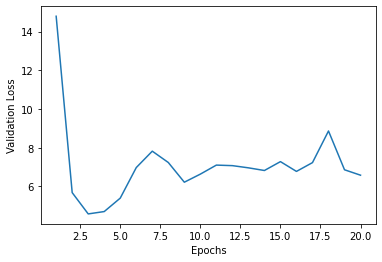

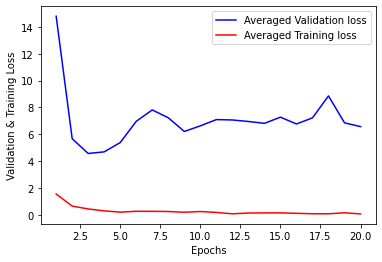

0.49381720175345734
0.8968000004688899


In [109]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_standard_channel_time_engineered, beta_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_beta_standard_channel_time_engineered, CONV1D_all_acc_histories_beta_standard_channel_time_engineered, CONV1D_all_training_accuracies_histories_beta_standard_channel_time_engineered, CONV1D_all_training_losses_histories_beta_standard_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            1647104   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

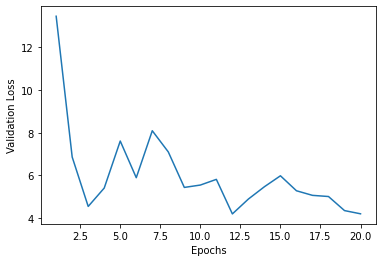

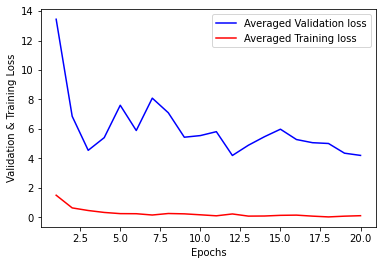

0.5513440877199174
0.8893333325783412


In [110]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_standard_channel_time_engineered, gamma_relax_power_standard_channel_time_engineered, 117, 187, 93, 46)

CONV1D_all_loss_histories_gamma_standard_channel_time_engineered, CONV1D_all_acc_histories_gamma_standard_channel_time_engineered, CONV1D_all_training_accuracies_histories_gamma_standard_channel_time_engineered, CONV1D_all_training_losses_histories_gamma_standard_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


## CONV2D

processing fold 0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 

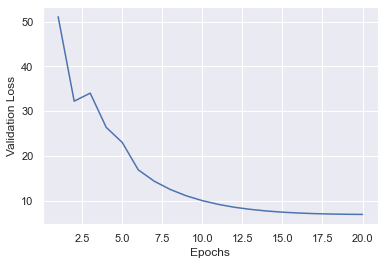

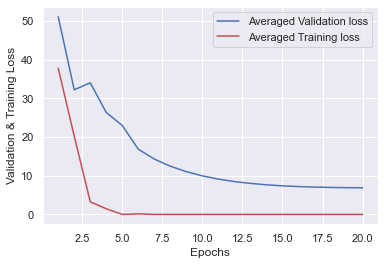

0.5383333409825961
0.9626344064871472


In [111]:
alpha_spectrograms_all_loss_histories, alpha_spectrograms_all_acc_histories, alpha_spectrograms_all_training_accuracies_histories, alpha_spectrograms_all_training_losses_histories = my_code.run_CONV2D(115, 184, 92, 46)

In [112]:
conv2d_mean_score = np.array(alpha_spectrograms_all_acc_histories)
conv2d_mean_score = conv2d_mean_score.mean()

In [113]:
conv2d_mean_score

0.5383333409825961

# Classification - automated data cleaning condition

## LDA

### Raw data

In [114]:
raw_push_automated = epochs_autoreject["Push"].get_data()
raw_relax_automated = epochs_autoreject["Relax"].get_data()
raw_automated = np.concatenate((raw_push_automated, raw_relax_automated), axis=0)
raw_automated = raw_automated.reshape(122,-1)
labels = np.concatenate((np.zeros(61), np.ones(61)))


In [115]:
lda_raw_automated_results = my_code.lda_for_ready_input(raw_automated, labels)

LDA Classification accuracy: 0.45999999999999996


### Frequency data

In [116]:
lda_alpha_automated_results = my_code.run_lda(alpha_push_power_automated, alpha_relax_power_automated, 61)

LDA Classification accuracy: 0.596


In [117]:
lda_beta_automated_results = my_code.run_lda(beta_push_power_automated, beta_relax_power_automated, 61)

LDA Classification accuracy: 0.5440000000000002


In [118]:
lda_gamma_automated_results = my_code.run_lda(gamma_push_power_automated, gamma_relax_power_automated, 61)

LDA Classification accuracy: 0.5640000000000001


In [119]:
lda_alpha_beta_automated_results = my_code.run_lda(alpha_beta_push_power_automated, alpha_beta_relax_power_automated, 61)

LDA Classification accuracy: 0.556


In [120]:
lda_alpha_beta_gamma_automated_results = my_code.run_lda(alpha_beta_gamma_push_power_automated, alpha_beta_gamma_relax_power_automated, 61)

LDA Classification accuracy: 0.516


In [121]:
lda_alpha_gamma_automated_results = my_code.run_lda(alpha_gamma_push_power_automated, alpha_gamma_relax_power_automated, 61)

LDA Classification accuracy: 0.5640000000000001


### Frequency engineered data

In [122]:
lda_alpha_automated_results_channel_engineered = my_code.run_lda(alpha_push_power_automated_channel_engineered, alpha_relax_power_automated_channel_engineered, 61)

LDA Classification accuracy: 0.5879999999999999


In [123]:
lda_beta_automated_results_channel_engineered = my_code.run_lda(beta_push_power_automated_channel_engineered, beta_relax_power_automated_channel_engineered, 61)

LDA Classification accuracy: 0.54


In [124]:
lda_gamma_automated_results_channel_engineered = my_code.run_lda(gamma_push_power_automated_channel_engineered, gamma_relax_power_automated_channel_engineered, 61)

LDA Classification accuracy: 0.5840000000000001


In [125]:
lda_alpha_automated_results_time_engineered = my_code.run_lda(alpha_push_power_automated_time_engineered, alpha_relax_power_automated_time_engineered, 61)

LDA Classification accuracy: 0.6519999999999999


In [126]:
lda_beta_automated_results_time_engineered = my_code.run_lda(beta_push_power_automated_time_engineered, beta_relax_power_automated_time_engineered, 61)

LDA Classification accuracy: 0.56


In [127]:
lda_gamma_automated_results_time_engineered = my_code.run_lda(gamma_push_power_automated_time_engineered, gamma_relax_power_automated_time_engineered, 61)

LDA Classification accuracy: 0.5600000000000002


In [128]:
lda_alpha_automated_results_channel_time_engineered = my_code.run_lda(alpha_push_power_automated_channel_time_engineered, alpha_relax_power_automated_channel_time_engineered, 61)

LDA Classification accuracy: 0.484


In [129]:
lda_beta_automated_results_channel_time_engineered = my_code.run_lda(beta_push_power_automated_channel_time_engineered, beta_relax_power_automated_channel_time_engineered, 61)

LDA Classification accuracy: 0.508


In [130]:
lda_gamma_automated_results_channel_time_engineered = my_code.run_lda(gamma_push_power_automated_channel_time_engineered, gamma_relax_power_automated_channel_time_engineered, 61)

LDA Classification accuracy: 0.568


## SVM

### Raw data

In [131]:
raw_push_automated = epochs_autoreject["Push"].get_data()
raw_relax_automated = epochs_autoreject["Relax"].get_data()
raw_automated = np.concatenate((raw_push_automated, raw_relax_automated), axis=0)
raw_automated = raw_automated.reshape(122,-1)
labels = np.concatenate((np.zeros(61), np.ones(61)))


In [132]:
svm_raw_automated_results = my_code.svm_for_ready_input(raw_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.41885245901639345 (std. 0.15488333378422992)


### Frequency data

In [133]:
svm_alpha_automated_results = my_code.run_svm(alpha_push_power_automated, alpha_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5598360655737704 (std. 0.14523008092056006)


In [134]:
svm_beta_automated_results = my_code.run_svm(beta_push_power_automated, beta_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.4672131147540984 (std. 0.16813471518682285)


In [135]:
svm_gamma_automated_results = my_code.run_svm(gamma_push_power_automated, gamma_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5696721311475409 (std. 0.14193588038744767)


In [136]:
svm_alpha_beta_automated_results = my_code.run_svm(alpha_beta_push_power_automated, alpha_beta_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.540983606557377 (std. 0.16183076485194808)


In [137]:
svm_alpha_beta_gamma_automated_results = my_code.run_svm(alpha_beta_gamma_push_power_automated, alpha_beta_gamma_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5647540983606557 (std. 0.16542153364867238)


In [138]:
svm_alpha_gamma_automated_results = my_code.run_svm(alpha_gamma_push_power_automated, alpha_gamma_relax_power_automated, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.6049180327868853 (std. 0.13173026278663152)


### Frequency engineered data

In [139]:
svm_alpha_automated_results_channel_engineered = my_code.run_svm(alpha_push_power_automated_channel_engineered, alpha_relax_power_automated_channel_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.6286885245901639 (std. 0.13335488717661884)


In [140]:
svm_beta_automated_results_channel_engineered = my_code.run_svm(beta_push_power_automated_channel_engineered, beta_relax_power_automated_channel_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5147540983606558 (std. 0.16873304706466968)


In [141]:
svm_gamma_automated_results_channel_engineered = my_code.run_svm(gamma_push_power_automated_channel_engineered, gamma_relax_power_automated_channel_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5918032786885244 (std. 0.16124015483195805)


In [142]:
svm_alpha_automated_results_time_engineered = my_code.run_svm(alpha_push_power_automated_time_engineered, alpha_relax_power_automated_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.6188524590163934 (std. 0.14617077773770323)


In [143]:
svm_beta_automated_results_time_engineered = my_code.run_svm(beta_push_power_automated_time_engineered, beta_relax_power_automated_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5073770491803278 (std. 0.15897624979175362)


In [144]:
svm_gamma_automated_results_time_engineered = my_code.run_svm(gamma_push_power_automated_time_engineered, gamma_relax_power_automated_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5959016393442622 (std. 0.12700686762353466)


In [145]:
svm_alpha_automated_results_channel_time_engineered = my_code.run_svm(alpha_push_power_automated_channel_time_engineered, alpha_relax_power_automated_channel_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5360655737704918 (std. 0.14824966412506768)


In [146]:
svm_beta_automated_results_channel_time_engineered = my_code.run_svm(beta_push_power_automated_channel_time_engineered, beta_relax_power_automated_channel_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5155737704918033 (std. 0.15734502747995768)


In [147]:
svm_gamma_automated_results_channel_time_engineered = my_code.run_svm(gamma_push_power_automated_channel_time_engineered, gamma_relax_power_automated_channel_time_engineered, 61)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVM Classification score: 0.5442622950819672 (std. 0.1659790527608479)


## LSTM

### Raw data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            16588288  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

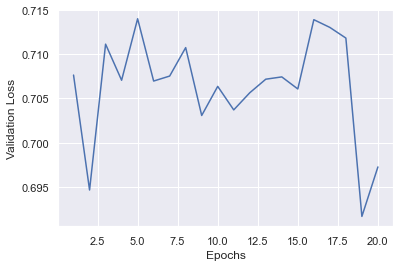

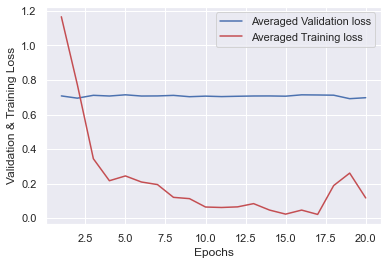

0.5291666666666667
0.9098958333333332


In [148]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_raw_for_DL_input(epochs_autoreject, 61, 97, 48, 24)
LSTM_all_loss_histories_raw_automated, LSTM_all_acc_histories_raw_automated, LSTM_all_training_accuracies_histories_raw_automated, LSTM_all_training_losses_histories_raw_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


### Frequency data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

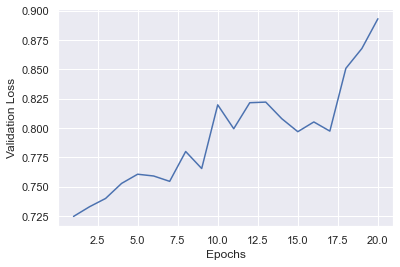

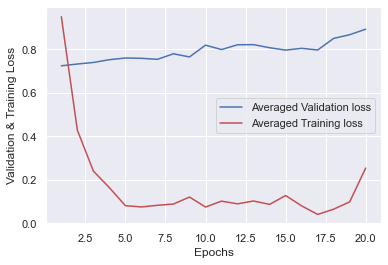

0.4302083333333333
0.9356410289804142


In [149]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated, alpha_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_alpha_automated, LSTM_all_acc_histories_alpha_automated, LSTM_all_training_accuracies_histories_alpha_automated, LSTM_all_training_losses_histories_alpha_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

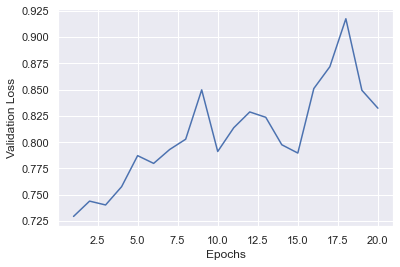

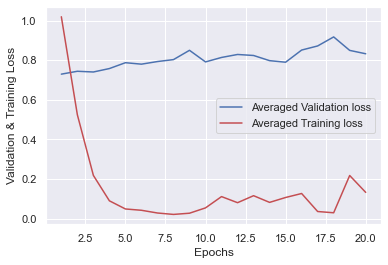

0.4510416666666666
0.9369230801860491


In [150]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated, beta_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_beta_automated, LSTM_all_acc_histories_beta_automated, LSTM_all_training_accuracies_histories_beta_automated, LSTM_all_training_losses_histories_beta_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            5578240   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

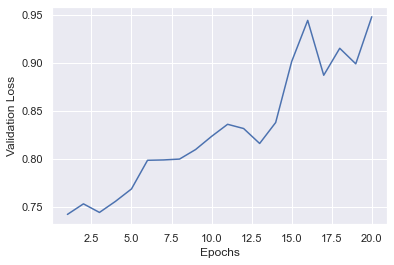

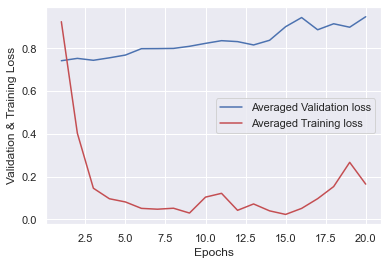

0.4588541666666666
0.9412820542852085


In [151]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated, gamma_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_gamma_automated, LSTM_all_acc_histories_gamma_automated, LSTM_all_training_accuracies_histories_gamma_automated, LSTM_all_training_losses_histories_gamma_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11090432  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

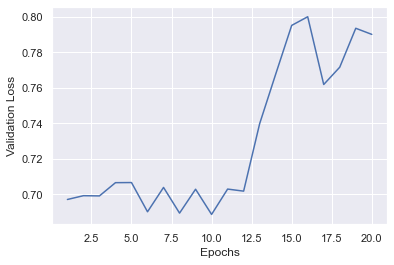

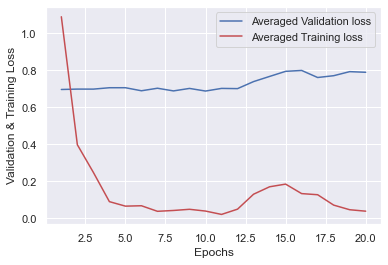

0.5166666666666666
0.9366666694482166


In [152]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_push_power_automated, alpha_beta_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_alpha_beta_automated, LSTM_all_acc_histories_alpha_beta_automated, LSTM_all_training_accuracies_histories_alpha_beta_automated, LSTM_all_training_losses_histories_alpha_beta_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            16602624  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

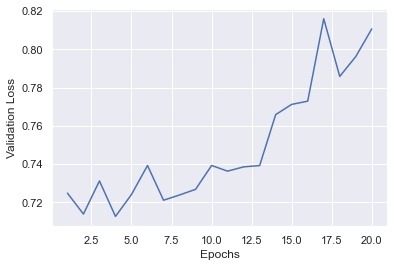

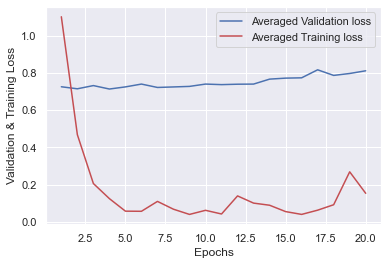

0.4583333333333333
0.9289743627111118


In [153]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_gamma_push_power_automated, alpha_beta_gamma_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_alpha_beta_gamma_automated, LSTM_all_acc_histories_alpha_beta_gamma_automated, LSTM_all_training_accuracies_histories_alpha_beta_gamma_automated, LSTM_all_training_losses_histories_alpha_beta_gamma_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11090432  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

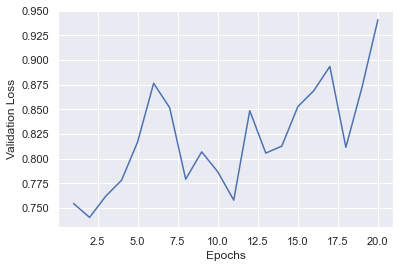

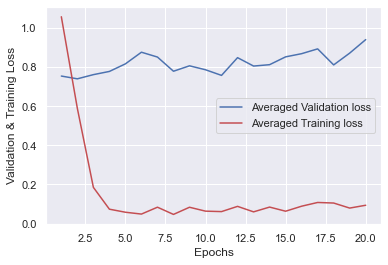

0.4187499999999999
0.9387179518739384


In [154]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_gamma_push_power_automated, alpha_gamma_relax_power_automated, 61, 97, 48, 24)
LSTM_all_loss_histories_alpha_gamma_automated, LSTM_all_acc_histories_alpha_gamma_automated, LSTM_all_training_accuracies_histories_alpha_gamma_automated, LSTM_all_training_losses_histories_alpha_gamma_automated = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


### Frequency engineered data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

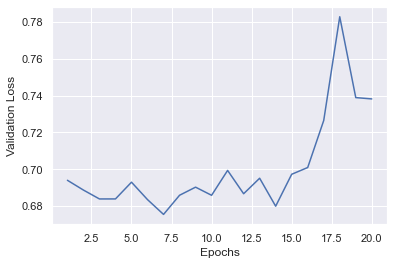

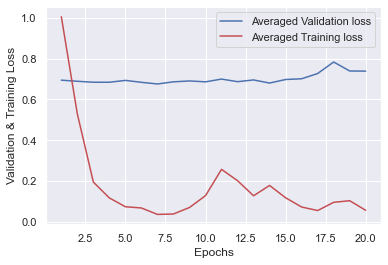

0.5286458333333333
0.927179491519928


In [155]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_channel_engineered, alpha_relax_power_automated_channel_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_alpha_automated_channel_engineered, LSTM_all_acc_histories_alpha_automated_channel_engineered, LSTM_all_training_accuracies_histories_alpha_automated_channel_engineered, LSTM_all_training_losses_histories_alpha_automated_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

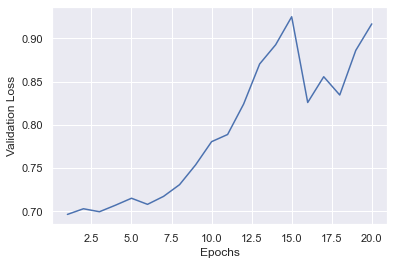

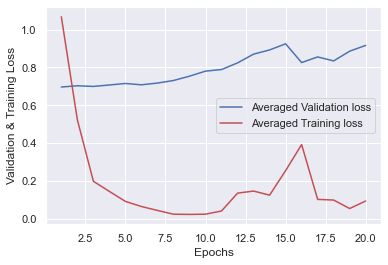

0.4828125
0.9279487212498984


In [156]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_channel_engineered, beta_relax_power_automated_channel_engineered, 61, 97, 48, 24)
LSTM_all_loss_histories_beta_automated_channel_engineered, LSTM_all_acc_histories_beta_automated_channel_engineered, LSTM_all_training_accuracies_histories_beta_automated_channel_engineered, LSTM_all_training_losses_histories_beta_automated_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            2428416   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

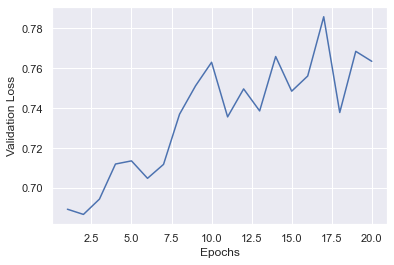

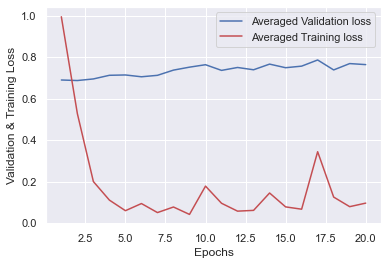

0.5682291666666667
0.9341025675336521


In [157]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_channel_engineered, gamma_relax_power_automated_channel_engineered, 61, 97, 48, 24)
LSTM_all_loss_histories_gamma_automated_channel_engineered, LSTM_all_acc_histories_gamma_automated_channel_engineered, LSTM_all_training_accuracies_histories_gamma_automated_channel_engineered, LSTM_all_training_losses_histories_gamma_automated_channel_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

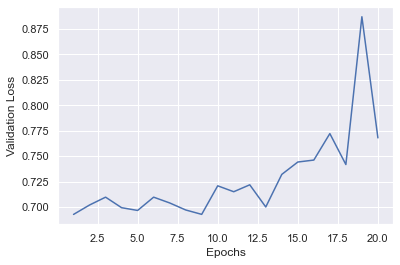

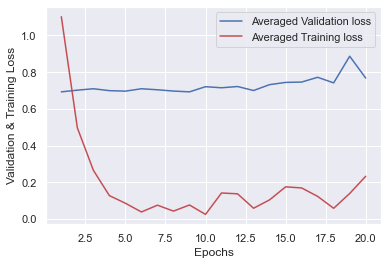

0.5151041666666666
0.9312820543845495


In [158]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_time_engineered, alpha_relax_power_automated_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_alpha_automated_time_engineered, LSTM_all_acc_histories_alpha_automated_time_engineered, LSTM_all_training_accuracies_histories_alpha_automated_time_engineered, LSTM_all_training_losses_histories_alpha_automated_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

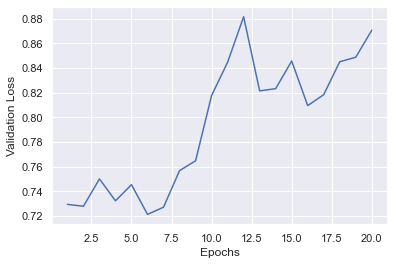

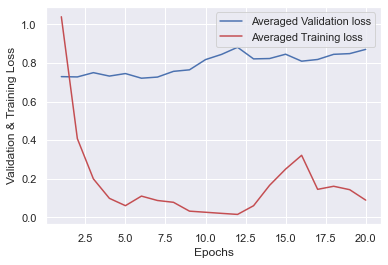

0.4312499999999999
0.9287179524699848


In [159]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_time_engineered, beta_relax_power_automated_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_beta_automated_time_engineered, LSTM_all_acc_histories_beta_automated_time_engineered, LSTM_all_training_accuracies_histories_beta_automated_time_engineered, LSTM_all_training_losses_histories_beta_automated_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            3908096   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

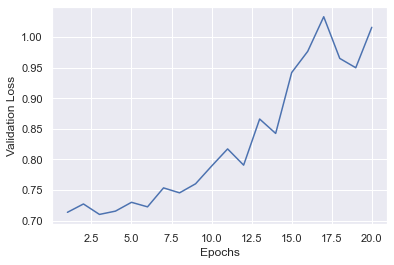

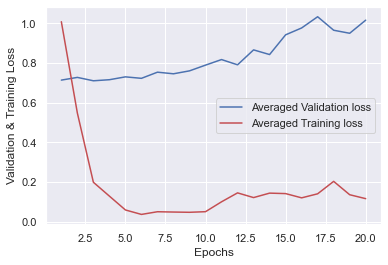

0.4588541666666666
0.9287179524699847


In [160]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_time_engineered, gamma_relax_power_automated_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_gamma_automated_time_engineered, LSTM_all_acc_histories_gamma_automated_time_engineered, LSTM_all_training_accuracies_histories_gamma_automated_time_engineered, LSTM_all_training_losses_histories_gamma_automated_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


In [161]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_channel_time_engineered, alpha_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_alpha_automated_channel_time_engineered, LSTM_all_acc_histories_alpha_automated_channel_time_engineered, LSTM_all_training_accuracies_histories_alpha_automated_channel_time_engineered, LSTM_all_training_losses_histories_alpha_automated_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1267200   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

0.4630208333333333
0.9310256441434225


In [162]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_channel_time_engineered, beta_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_beta_automated_channel_time_engineered, LSTM_all_acc_histories_beta_automated_channel_time_engineered, LSTM_all_training_accuracies_histories_beta_automated_channel_time_engineered, LSTM_all_training_losses_histories_beta_automated_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1712640   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

0.4979166666666667
0.9243589783708256


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            1033728   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 32)             128       
_________________________________________________________________
dense (Dense)                (None, 1,

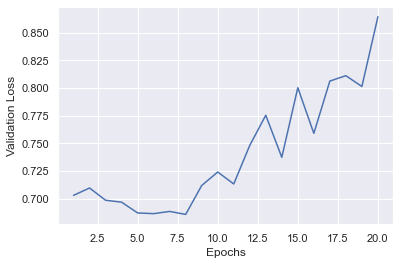

0.5140625
0.9207692344983419


In [163]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_channel_time_engineered, gamma_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

LSTM_all_loss_histories_gamma_automated_channel_time_engineered, LSTM_all_acc_histories_gamma_automated_channel_time_engineered, LSTM_all_training_accuracies_histories_gamma_automated_channel_time_engineered, LSTM_all_training_losses_histories_gamma_automated_channel_time_engineered = my_code.run_LSTM(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


## CONV1D

### Raw data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            16522752  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

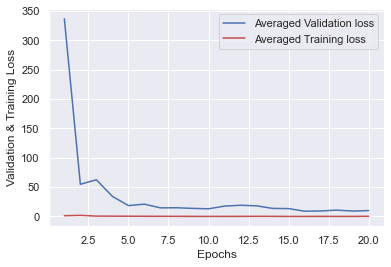

0.4520833333333334
0.884375


In [164]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_raw_for_DL_input(epochs_autoreject, 61, 97, 48, 24)
CONV1D_all_loss_histories_raw_automated, CONV1D_all_acc_histories_raw_automated, CONV1D_all_training_accuracies_histories_raw_automated, CONV1D_all_training_losses_histories_raw_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)

### Frequency data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

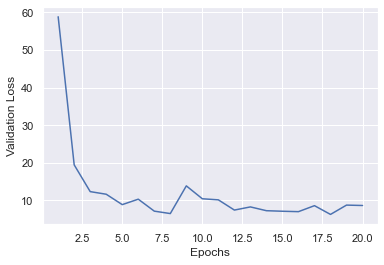

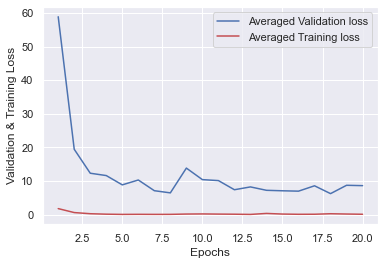

0.509375
0.914615389207999


In [165]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated, alpha_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_alpha_automated, CONV1D_all_acc_histories_alpha_automated, CONV1D_all_training_accuracies_histories_alpha_automated, CONV1D_all_training_losses_histories_alpha_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

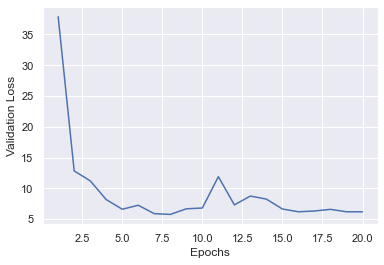

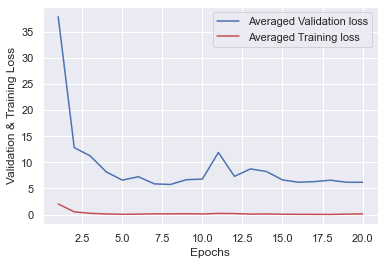

0.5260416666666666
0.9223076964418093


In [166]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated, beta_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_beta_automated, CONV1D_all_acc_histories_beta_automated, CONV1D_all_training_accuracies_histories_beta_automated, CONV1D_all_training_losses_histories_beta_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            5512704   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

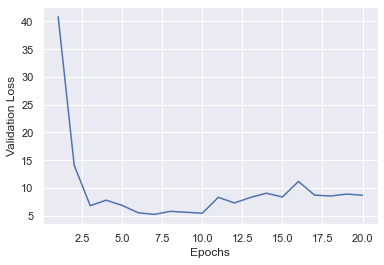

0.5119791666666667
0.9115384658177694


In [167]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated, gamma_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_gamma_automated, CONV1D_all_acc_histories_gamma_automated, CONV1D_all_training_accuracies_histories_gamma_automated, CONV1D_all_training_losses_histories_gamma_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            11024896  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

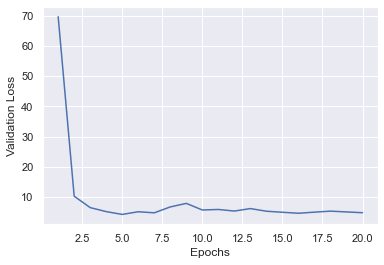

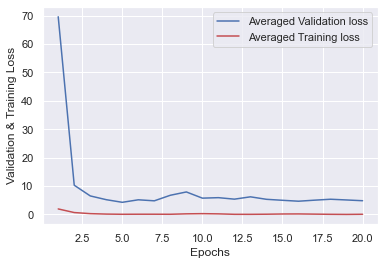

0.5296875
0.9164102603991825


In [168]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_push_power_automated, alpha_beta_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_alpha_beta_automated, CONV1D_all_acc_histories_alpha_beta_automated, CONV1D_all_training_accuracies_histories_alpha_beta_automated, CONV1D_all_training_losses_histories_alpha_beta_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            16537088  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

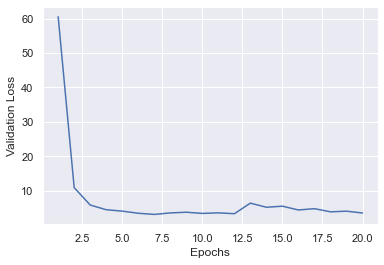

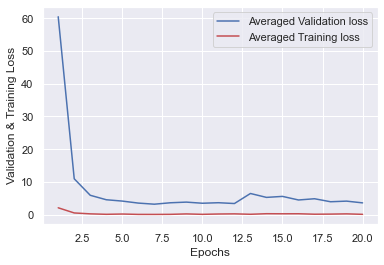

0.6098958333333332
0.9202564145127934


In [169]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_beta_gamma_push_power_automated, alpha_beta_gamma_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_alpha_beta_gamma_automated, CONV1D_all_acc_histories_alpha_beta_gamma_automated, CONV1D_all_training_accuracies_histories_alpha_beta_gamma_automated, CONV1D_all_training_losses_histories_alpha_beta_gamma_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            11024896  
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

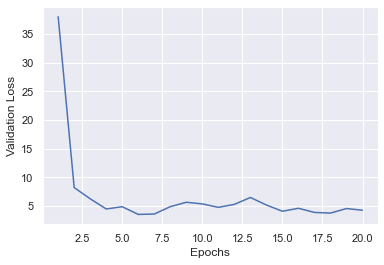

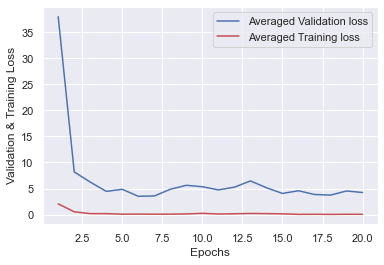

0.5708333333333333
0.9235897466540337


In [170]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_gamma_push_power_automated, alpha_gamma_relax_power_automated, 61, 97, 48, 24)
CONV1D_all_loss_histories_alpha_gamma_automated, CONV1D_all_acc_histories_alpha_gamma_automated, CONV1D_all_training_accuracies_histories_alpha_gamma_automated, CONV1D_all_training_losses_histories_alpha_gamma_automated = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


### Frequency engineered data

processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

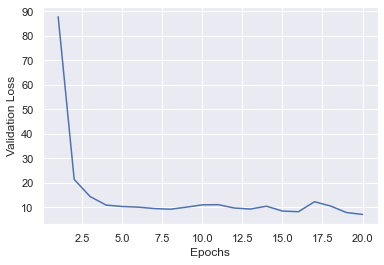

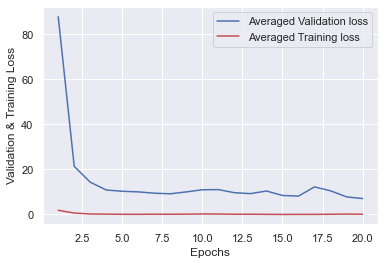

0.5692708333333334
0.9215384657184285


In [171]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_channel_engineered, alpha_relax_power_automated_channel_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_alpha_automated_channel_engineered, CONV1D_all_acc_histories_alpha_automated_channel_engineered, CONV1D_all_training_accuracies_histories_alpha_automated_channel_engineered, CONV1D_all_training_losses_histories_alpha_automated_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

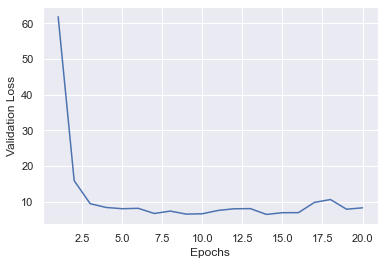

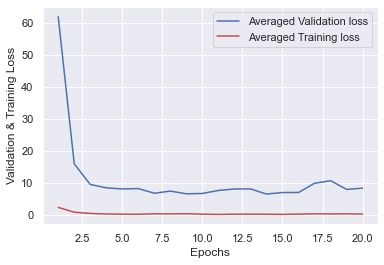

0.5234375
0.9107692350943883


In [172]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_channel_engineered, beta_relax_power_automated_channel_engineered, 61, 97, 48, 24)
CONV1D_all_loss_histories_beta_automated_channel_engineered, CONV1D_all_acc_histories_beta_automated_channel_engineered, CONV1D_all_training_accuracies_histories_beta_automated_channel_engineered, CONV1D_all_training_losses_histories_beta_automated_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            2362880   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

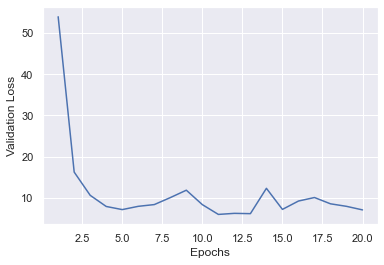

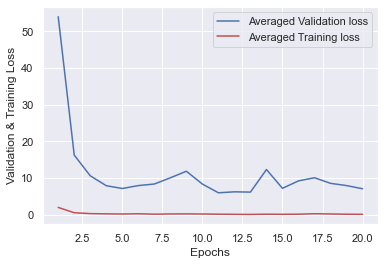

0.5239583333333333
0.9258974403142929


In [173]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_channel_engineered, gamma_relax_power_automated_channel_engineered, 61, 97, 48, 24)
CONV1D_all_loss_histories_gamma_automated_channel_engineered, CONV1D_all_acc_histories_gamma_automated_channel_engineered, CONV1D_all_training_accuracies_histories_gamma_automated_channel_engineered, CONV1D_all_training_losses_histories_gamma_automated_channel_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

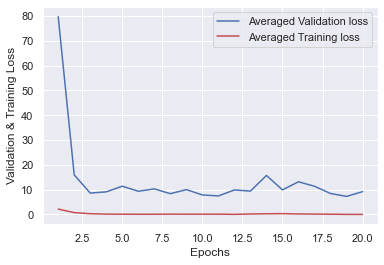

0.49739583333333337
0.9058974400162697


In [174]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_time_engineered, alpha_relax_power_automated_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_alpha_automated_time_engineered, CONV1D_all_acc_histories_alpha_automated_time_engineered, CONV1D_all_training_accuracies_histories_alpha_automated_time_engineered, CONV1D_all_training_losses_histories_alpha_automated_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

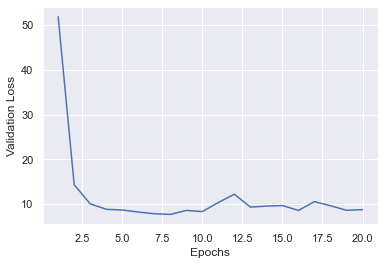

0.5078125
0.9166666701436043


In [175]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_time_engineered, beta_relax_power_automated_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_beta_automated_time_engineered, CONV1D_all_acc_histories_beta_automated_time_engineered, CONV1D_all_training_accuracies_histories_beta_automated_time_engineered, CONV1D_all_training_losses_histories_beta_automated_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            3842560   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

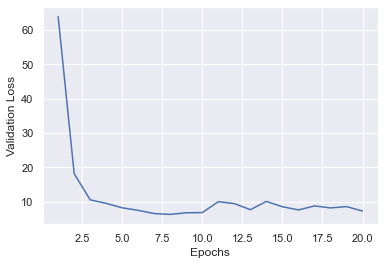

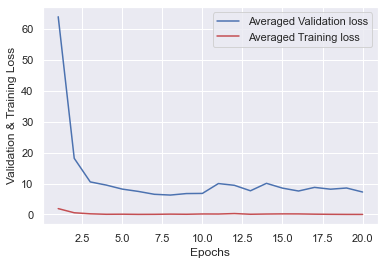

0.5567708333333334
0.9248717988530796


In [176]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_time_engineered, gamma_relax_power_automated_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_gamma_automated_time_engineered, CONV1D_all_acc_histories_gamma_automated_time_engineered, CONV1D_all_training_accuracies_histories_gamma_automated_time_engineered, CONV1D_all_training_losses_histories_gamma_automated_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            1201664   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

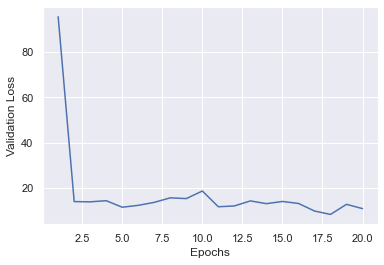

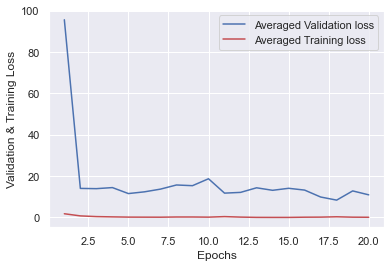

0.5098958333333333
0.9033333381017048


In [177]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(alpha_push_power_automated_channel_time_engineered, alpha_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_alpha_automated_channel_time_engineered, CONV1D_all_acc_histories_alpha_automated_channel_time_engineered, CONV1D_all_training_accuracies_histories_alpha_automated_channel_time_engineered, CONV1D_all_training_losses_histories_alpha_automated_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            1647104   
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

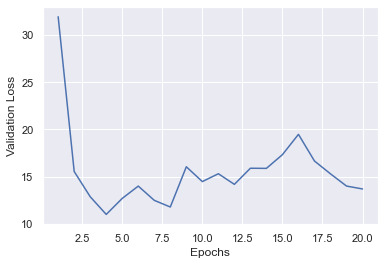

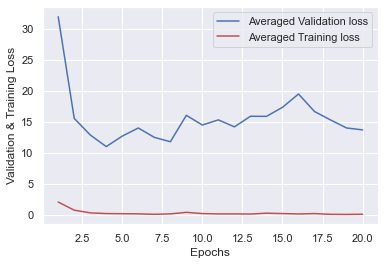

0.4708333333333333
0.9105128248532613


In [178]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(beta_push_power_automated_channel_time_engineered, beta_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_beta_automated_channel_time_engineered, CONV1D_all_acc_histories_beta_automated_channel_time_engineered, CONV1D_all_training_accuracies_histories_beta_automated_channel_time_engineered, CONV1D_all_training_losses_histories_beta_automated_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


processing fold 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 512)            968192    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 512)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 512)            262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1,

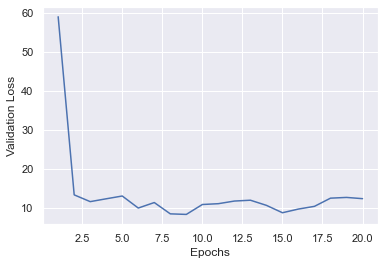

0.5171875
0.8982051337758701


In [179]:
train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels = my_code.prepare_frequencies_for_DL_input(gamma_push_power_automated_channel_time_engineered, gamma_relax_power_automated_channel_time_engineered, 61, 97, 48, 24)

CONV1D_all_loss_histories_gamma_automated_channel_time_engineered, CONV1D_all_acc_histories_gamma_automated_channel_time_engineered, CONV1D_all_training_accuracies_histories_gamma_automated_channel_time_engineered, CONV1D_all_training_losses_histories_gamma_automated_channel_time_engineered = my_code.run_CONV1D(train_samples, validation_samples, train_labels, validation_labels, test_samples, test_labels)


# Summarizing the results - standard data cleaning approach

## Each feature mean accuracy per each classifier

### LDA

In [180]:
standard_lda_raw_and_frequency_scores = [lda_raw_standard_results,lda_alpha_standard_results,lda_beta_standard_results,lda_gamma_standard_results,lda_alpha_beta_standard_results,lda_alpha_beta_gamma_standard_results,lda_alpha_gamma_standard_results]
standard_lda_engineered_frequencies = [lda_alpha_standard_results_channel_engineered,lda_beta_standard_results_channel_engineered,lda_gamma_standard_results_channel_engineered,lda_alpha_standard_results_time_engineered,lda_beta_standard_results_time_engineered,lda_gamma_standard_results_time_engineered,lda_alpha_standard_results_channel_time_engineered,lda_beta_standard_results_channel_time_engineered,lda_gamma_standard_results_channel_time_engineered]


standard_lda_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
standard_lda_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]



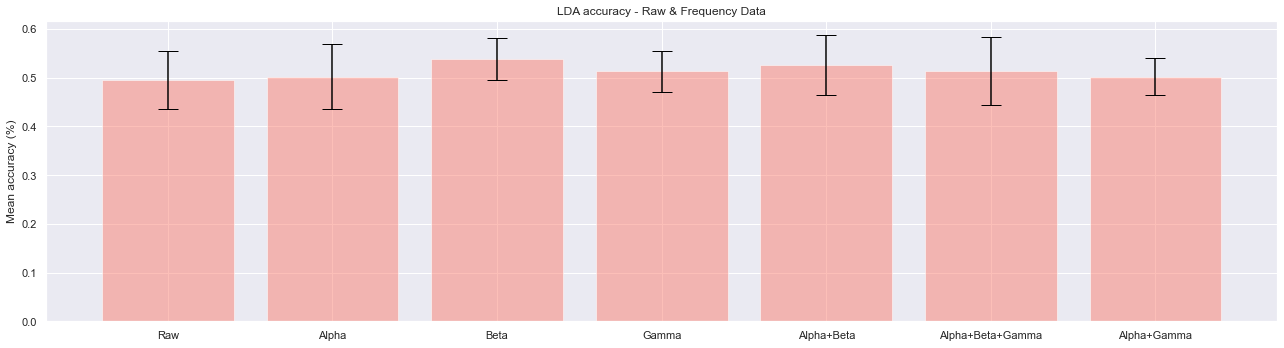

In [181]:
# plotting for raw & frequency

mean_scores_raw_freqs_lda = []
for item in range(0,len(standard_lda_raw_and_frequency_scores)):
    mean_score = np.mean(standard_lda_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_lda.append(mean_score)
    
std_scores_raw_freqs_lda = []
for item in range(0,len(standard_lda_raw_and_frequency_scores)):
    std_score = np.std(standard_lda_raw_and_frequency_scores[item])
    std_scores_raw_freqs_lda.append(std_score)

x_pos = standard_lda_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_lda
error = std_scores_raw_freqs_lda

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LDA accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


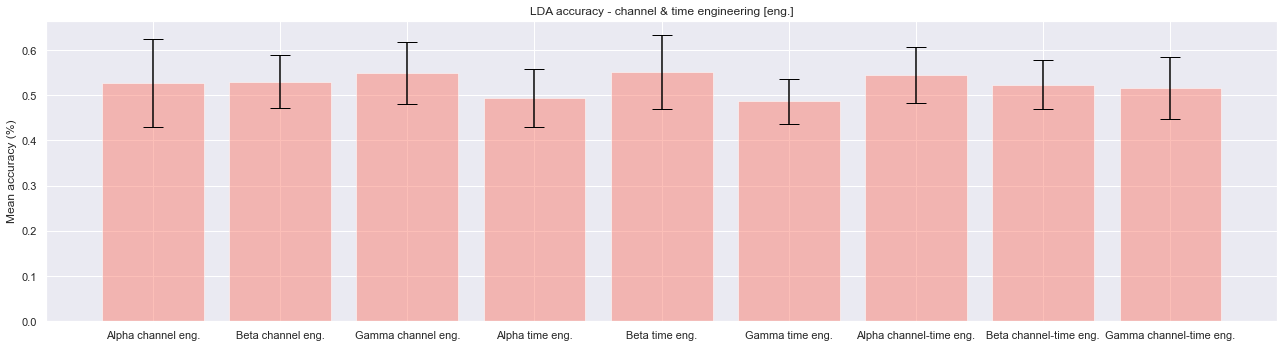

In [182]:
# plotting for engineered frequencies 

mean_scores_lda_engineered_frequencies = []
for item in range(0,len(standard_lda_engineered_frequencies)):
    mean_score = np.mean(standard_lda_engineered_frequencies[item])
    mean_scores_lda_engineered_frequencies.append(mean_score)
    
std_scores_raw_lda_engineered_frequencies = []
for item in range(0,len(standard_lda_engineered_frequencies)):
    std_score = np.std(standard_lda_engineered_frequencies[item])
    std_scores_raw_lda_engineered_frequencies.append(std_score)

x_pos = standard_lda_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_lda_engineered_frequencies
error = std_scores_raw_lda_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LDA accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### SVM

In [183]:
standard_svm_raw_and_frequency_scores = [svm_raw_standard_results,svm_alpha_standard_results,svm_beta_standard_results,svm_gamma_standard_results,svm_alpha_beta_standard_results,svm_alpha_beta_gamma_standard_results,svm_alpha_gamma_standard_results]
standard_svm_engineered_frequencies = [svm_alpha_standard_results_channel_engineered,svm_beta_standard_results_channel_engineered,svm_gamma_standard_results_channel_engineered,svm_alpha_standard_results_time_engineered,svm_beta_standard_results_time_engineered,svm_gamma_standard_results_time_engineered,svm_alpha_standard_results_channel_time_engineered,svm_beta_standard_results_channel_time_engineered,svm_gamma_standard_results_channel_time_engineered]


standard_svm_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
standard_svm_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]


In [184]:
# plotting for raw & frequency

mean_scores_raw_freqs_svm = []
for item in range(0,len(standard_svm_raw_and_frequency_scores)):
    mean_score = np.mean(standard_svm_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_svm.append(mean_score)
    
std_scores_raw_freqs_svm = []
for item in range(0,len(standard_svm_raw_and_frequency_scores)):
    std_score = np.std(standard_svm_raw_and_frequency_scores[item])
    std_scores_raw_freqs_svm.append(std_score)

x_pos = standard_svm_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_svm
error = std_scores_raw_freqs_svm

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('SVM accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


In [185]:
# plotting for engineered frequencies 

mean_scores_svm_engineered_frequencies = []
for item in range(0,len(standard_svm_engineered_frequencies)):
    mean_score = np.mean(standard_svm_engineered_frequencies[item])
    mean_scores_svm_engineered_frequencies.append(mean_score)
    
std_scores_raw_svm_engineered_frequencies = []
for item in range(0,len(standard_svm_engineered_frequencies)):
    std_score = np.std(standard_svm_engineered_frequencies[item])
    std_scores_raw_svm_engineered_frequencies.append(std_score)

x_pos = standard_svm_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_svm_engineered_frequencies
error = std_scores_raw_svm_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('SVM accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### LSTM

In [186]:
standard_LSTM_raw_and_frequency_scores = [LSTM_all_acc_histories_raw_standard,LSTM_all_acc_histories_alpha_standard,LSTM_all_acc_histories_beta_standard,LSTM_all_acc_histories_gamma_standard,LSTM_all_acc_histories_alpha_beta_standard,LSTM_all_acc_histories_alpha_beta_gamma_standard,LSTM_all_acc_histories_alpha_gamma_standard]
standard_LSTM_engineered_frequencies = [LSTM_all_acc_histories_alpha_standard_channel_engineered,LSTM_all_acc_histories_beta_standard_channel_engineered,LSTM_all_acc_histories_gamma_standard_channel_engineered,LSTM_all_acc_histories_alpha_standard_time_engineered,LSTM_all_acc_histories_beta_standard_time_engineered,LSTM_all_acc_histories_gamma_standard_time_engineered,LSTM_all_acc_histories_alpha_standard_channel_time_engineered,LSTM_all_acc_histories_beta_standard_channel_time_engineered,LSTM_all_acc_histories_gamma_standard_channel_time_engineered]


standard_LSTM_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
standard_LSTM_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]



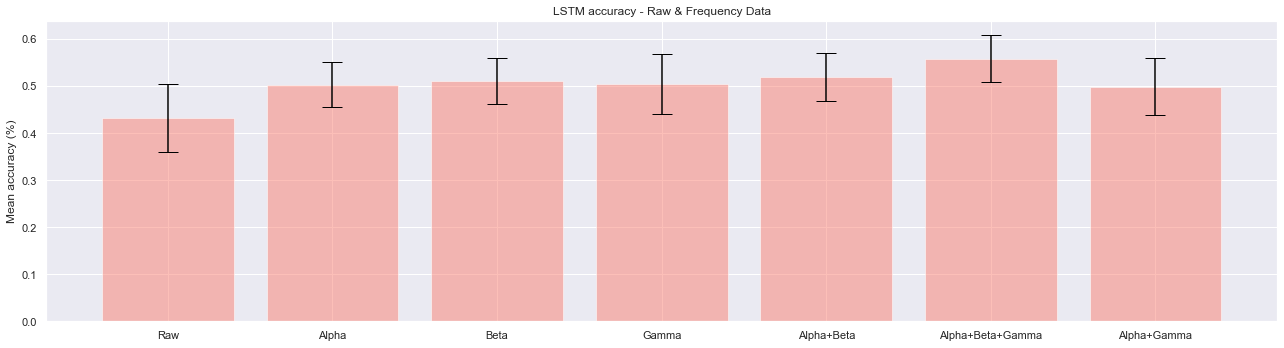

In [187]:
# plotting for raw & frequency

mean_scores_raw_freqs_LSTM = []
for item in range(0,len(standard_LSTM_raw_and_frequency_scores)):
    mean_score = np.mean(standard_LSTM_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_LSTM.append(mean_score)
    
std_scores_raw_freqs_LSTM = []
for item in range(0,len(standard_LSTM_raw_and_frequency_scores)):
    std_score = np.std(standard_LSTM_raw_and_frequency_scores[item])
    std_scores_raw_freqs_LSTM.append(std_score)

x_pos = standard_LSTM_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_LSTM
error = std_scores_raw_freqs_LSTM

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LSTM accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


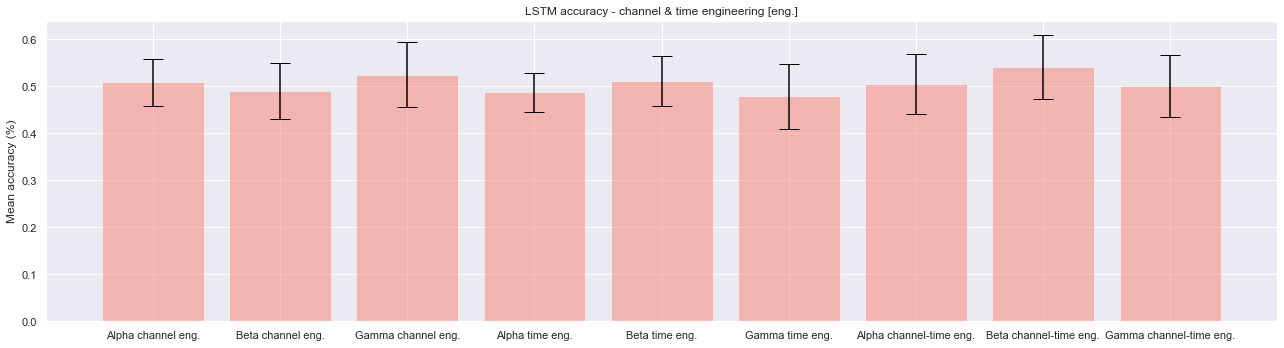

In [188]:
# plotting for engineered frequencies 

mean_scores_LSTM_engineered_frequencies = []
for item in range(0,len(standard_LSTM_engineered_frequencies)):
    mean_score = np.mean(standard_LSTM_engineered_frequencies[item])
    mean_scores_LSTM_engineered_frequencies.append(mean_score)
    
std_scores_raw_LSTM_engineered_frequencies = []
for item in range(0,len(standard_LSTM_engineered_frequencies)):
    std_score = np.std(standard_LSTM_engineered_frequencies[item])
    std_scores_raw_LSTM_engineered_frequencies.append(std_score)

x_pos = standard_LSTM_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_LSTM_engineered_frequencies
error = std_scores_raw_LSTM_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LSTM accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### CONV1D

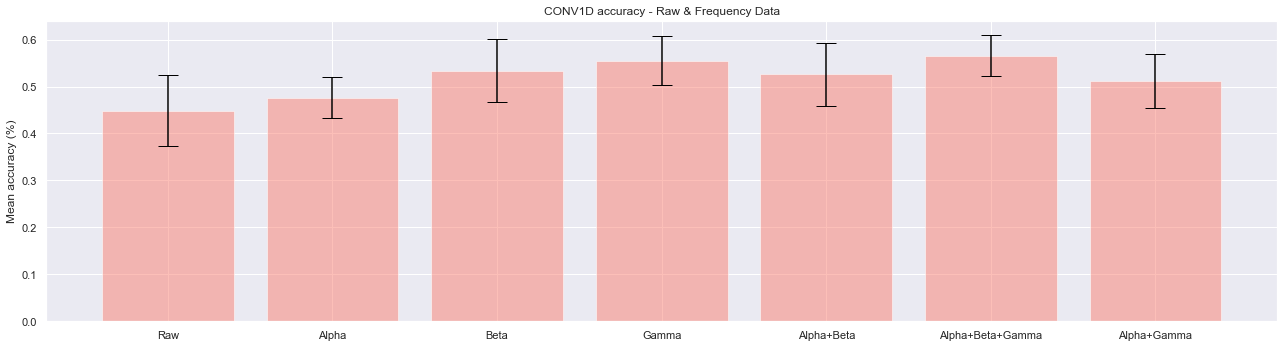

In [189]:
standard_CONV1D_raw_and_frequency_scores = [CONV1D_all_acc_histories_raw_standard,CONV1D_all_acc_histories_alpha_standard,CONV1D_all_acc_histories_beta_standard,CONV1D_all_acc_histories_gamma_standard,CONV1D_all_acc_histories_alpha_beta_standard,CONV1D_all_acc_histories_alpha_beta_gamma_standard,CONV1D_all_acc_histories_alpha_gamma_standard]
standard_CONV1D_engineered_frequencies = [CONV1D_all_acc_histories_alpha_standard_channel_engineered,CONV1D_all_acc_histories_beta_standard_channel_engineered,CONV1D_all_acc_histories_gamma_standard_channel_engineered,CONV1D_all_acc_histories_alpha_standard_time_engineered,CONV1D_all_acc_histories_beta_standard_time_engineered,CONV1D_all_acc_histories_gamma_standard_time_engineered,CONV1D_all_acc_histories_alpha_standard_channel_time_engineered,CONV1D_all_acc_histories_beta_standard_channel_time_engineered,CONV1D_all_acc_histories_gamma_standard_channel_time_engineered]


standard_CONV1D_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
standard_CONV1D_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]

# plotting for raw & frequency

mean_scores_raw_freqs_CONV1D = []
for item in range(0,len(standard_CONV1D_raw_and_frequency_scores)):
    mean_score = np.mean(standard_CONV1D_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_CONV1D.append(mean_score)
    
std_scores_raw_freqs_CONV1D = []
for item in range(0,len(standard_CONV1D_raw_and_frequency_scores)):
    std_score = np.std(standard_CONV1D_raw_and_frequency_scores[item])
    std_scores_raw_freqs_CONV1D.append(std_score)

x_pos = standard_CONV1D_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_CONV1D
error = std_scores_raw_freqs_CONV1D

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('CONV1D accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

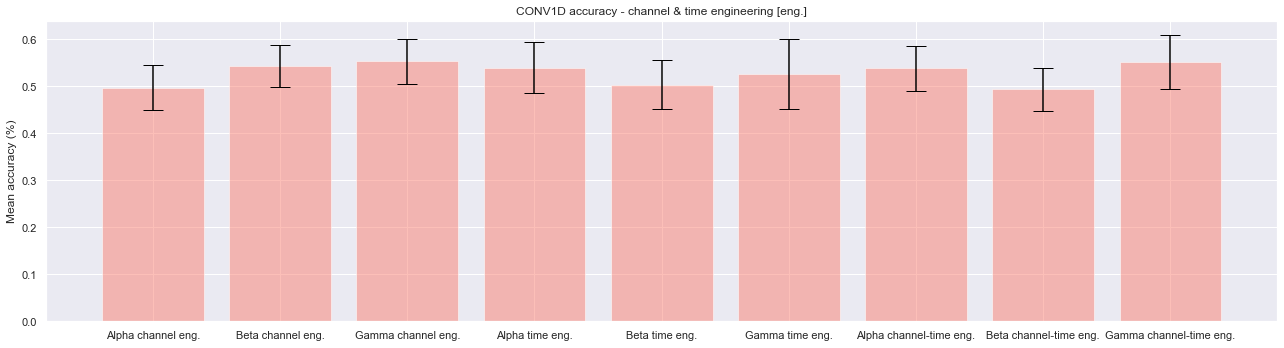

In [190]:
# plotting for engineered frequencies 

mean_scores_CONV1D_engineered_frequencies = []
for item in range(0,len(standard_CONV1D_engineered_frequencies)):
    mean_score = np.mean(standard_CONV1D_engineered_frequencies[item])
    mean_scores_CONV1D_engineered_frequencies.append(mean_score)
    
std_scores_raw_CONV1D_engineered_frequencies = []
for item in range(0,len(standard_CONV1D_engineered_frequencies)):
    std_score = np.std(standard_CONV1D_engineered_frequencies[item])
    std_scores_raw_CONV1D_engineered_frequencies.append(std_score)

x_pos = standard_CONV1D_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_CONV1D_engineered_frequencies
error = std_scores_raw_CONV1D_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('CONV1D accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## Mean of feature category accuracies across each classifier

In [191]:
raw_data_LDA = [lda_raw_standard_results]
raw_data_SVM = [svm_raw_standard_results]
frequencies_LDA = [lda_alpha_standard_results,lda_beta_standard_results,lda_gamma_standard_results,lda_alpha_beta_standard_results,lda_alpha_beta_gamma_standard_results]
frequencies_SVM = [svm_alpha_standard_results,svm_beta_standard_results,svm_gamma_standard_results,svm_alpha_beta_standard_results,svm_alpha_beta_gamma_standard_results]


raw_data_LSTM = [LSTM_all_acc_histories_raw_standard]
raw_data_CONV1D = [CONV1D_all_acc_histories_raw_standard]
frequencies_LSTM = [LSTM_all_acc_histories_alpha_standard,LSTM_all_acc_histories_beta_standard,LSTM_all_acc_histories_gamma_standard,LSTM_all_acc_histories_alpha_beta_standard,LSTM_all_acc_histories_alpha_beta_gamma_standard,LSTM_all_acc_histories_alpha_gamma_standard]
frequencies_CONV1D = [CONV1D_all_acc_histories_alpha_standard,CONV1D_all_acc_histories_beta_standard,CONV1D_all_acc_histories_gamma_standard,CONV1D_all_acc_histories_alpha_beta_standard,CONV1D_all_acc_histories_alpha_beta_gamma_standard,CONV1D_all_acc_histories_alpha_gamma_standard]


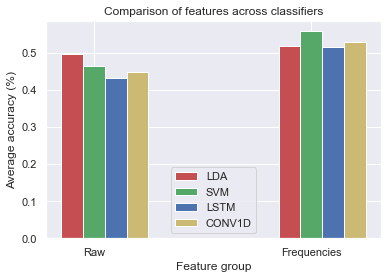

In [192]:
# raw & frequencies

X = ['Raw','Frequencies']
LDA = [np.mean(raw_data_LDA),np.mean(frequencies_LDA)]
SVM = [np.mean(raw_data_SVM),np.mean(frequencies_SVM)]
LSTM = [np.mean(raw_data_LSTM),np.mean(frequencies_LSTM)]
CONV1D = [np.mean(raw_data_CONV1D),np.mean(frequencies_CONV1D)]

N = 2
ind = np.arange(N) 
width = 0.1
  
xvals = LDA
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = SVM
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = LSTM
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

kvals = CONV1D
bar4 = plt.bar(ind+width*3, kvals, width, color = 'y')

  
plt.xlabel("Feature group")
plt.ylabel('Average accuracy (%)')
plt.title("Comparison of features across classifiers")
  
plt.xticks(ind+width,['Raw', 'Frequencies'])
plt.legend( (bar1, bar2, bar3, bar4), ('LDA', 'SVM', 'LSTM', "CONV1D") )
plt.show()

In [193]:
# raw alone 

In [194]:
raws = [raw_data_LDA,raw_data_SVM,raw_data_LSTM,raw_data_CONV1D]

In [195]:
mean_scores_raw = []
for item in range(0,len(raws)):
    mean_score = np.mean(raws[item])
    mean_scores_raw.append(mean_score)
    

In [196]:
raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_SVM_mean = np.mean(raw_data_SVM)
raw_data_SVM_std = np.std(raw_data_SVM)

frequencies_LDA_mean = np.mean(frequencies_LDA)
frequencies_LDA_std = np.std(frequencies_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)


# Mean of each frequency band across all classifiers

In [197]:
# frequencies

alpha_frequencies = [np.mean(lda_alpha_standard_results), np.mean(svm_alpha_standard_results), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_alpha_standard), np.mean(lda_alpha_standard_results_channel_engineered), np.mean(lda_alpha_standard_results_time_engineered), np.mean(lda_alpha_standard_results_channel_time_engineered), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_time_engineered), np.mean(svm_alpha_standard_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered)]
beta_frequencies = [np.mean(lda_beta_standard_results), np.mean(svm_beta_standard_results), np.mean(LSTM_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_beta_standard), np.mean(lda_beta_standard_results_channel_engineered), np.mean(lda_beta_standard_results_time_engineered), np.mean(lda_beta_standard_results_channel_time_engineered), np.mean(svm_beta_standard_results_channel_engineered), np.mean(svm_beta_standard_results_time_engineered), np.mean(svm_beta_standard_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_engineered), np.mean(LSTM_all_acc_histories_beta_standard_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_time_engineered)]
gamma_frequencies = [np.mean(lda_gamma_standard_results), np.mean(svm_gamma_standard_results), np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_gamma_standard), np.mean(lda_gamma_standard_results_channel_engineered), np.mean(lda_gamma_standard_results_time_engineered), np.mean(lda_gamma_standard_results_channel_time_engineered), np.mean(svm_gamma_standard_results_channel_engineered), np.mean(svm_gamma_standard_results_time_engineered), np.mean(svm_gamma_standard_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]
alpha_beta_frequencies = [np.mean(lda_alpha_standard_results), np.mean(svm_alpha_standard_results), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_alpha_standard)]
alpha_beta_gamma_frequencies = [np.mean(lda_alpha_beta_standard_results), np.mean(svm_alpha_beta_standard_results), np.mean(LSTM_all_acc_histories_alpha_beta_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_standard)]
alpha_gamma_frequencies = [np.mean(lda_alpha_gamma_standard_results), np.mean(svm_alpha_gamma_standard_results), np.mean(LSTM_all_acc_histories_alpha_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_gamma_standard)]


values = [np.mean(alpha_frequencies),np.mean(beta_frequencies),np.mean(gamma_frequencies),np.mean(alpha_beta_frequencies),np.mean(alpha_beta_gamma_frequencies),np.mean(alpha_gamma_frequencies)]
error = [np.std(alpha_frequencies),np.std(beta_frequencies),np.std(gamma_frequencies),np.std(alpha_beta_frequencies),np.std(alpha_beta_gamma_frequencies),np.std(alpha_gamma_frequencies)]

x_pos = ["Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
labels = np.arange(len(x_pos))
values = values
error = error

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Frequency accuracies across all classifiers')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()


## Mean accuracy for raw data across all classifiers

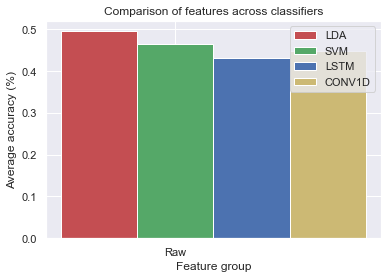

In [198]:
# raw data

N = 1
ind = np.arange(N) 
width = 0.1
  
xvals = np.mean(raw_data_LDA)
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = np.mean(raw_data_SVM)
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = np.mean(raw_data_LSTM)
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

kvals = np.mean(raw_data_CONV1D)
bar4 = plt.bar(ind+width*3, kvals, width, color = 'y')

  
plt.xlabel("Feature group")
plt.ylabel('Average accuracy (%)')
plt.title("Comparison of features across classifiers")
  
plt.xticks(ind+width,['Raw'])
plt.legend( (bar1, bar2, bar3, bar4), ('LDA', 'SVM', 'LSTM', "CONV1D") )
plt.show()

In [199]:
# raw

values = [np.mean(alpha_frequencies),np.mean(beta_frequencies),np.mean(gamma_frequencies),np.mean(alpha_beta_frequencies),np.mean(alpha_beta_gamma_frequencies),np.mean(alpha_gamma_frequencies)]
error = [np.std(alpha_frequencies),np.std(beta_frequencies),np.std(gamma_frequencies),np.std(alpha_beta_frequencies),np.std(alpha_beta_gamma_frequencies),np.std(alpha_gamma_frequencies)]

x_pos = ["Raw"]
labels =  np.arange(len(x_pos))
values = np.mean([np.mean(raw_data_LDA),np.mean(raw_data_SVM), np.mean(raw_data_LSTM), np.mean(raw_data_CONV1D)])
error = np.std([np.std(raw_data_LDA),np.std(raw_data_SVM), np.std(raw_data_LSTM), np.std(raw_data_CONV1D)])

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Raw accuracy across all classifiers')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()


## Checking whether engineering paid off or not

In [200]:
standard_frequencies_alpha = (np.mean(lda_alpha_standard_results),np.mean(svm_alpha_standard_results),np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_alpha_standard))
standard_frequencies_beta = (np.mean(lda_beta_standard_results),np.mean(svm_beta_standard_results),np.mean(LSTM_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_beta_standard) )
standard_frequencies_gamma = (np.mean(lda_gamma_standard_results),np.mean(svm_gamma_standard_results),np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_gamma_standard) )



channeleng_frequencies_alpha = (np.mean(lda_alpha_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_channel_engineered), LSTM_all_acc_histories_alpha_standard_channel_engineered, CONV1D_all_acc_histories_alpha_standard_channel_engineered)
channeleng_frequencies_beta = (np.mean(lda_beta_standard_results_channel_engineered), np.mean(svm_beta_standard_results_channel_engineered), LSTM_all_acc_histories_beta_standard_channel_engineered, CONV1D_all_acc_histories_beta_standard_channel_engineered)
channeleng_frequencies_gamma = (np.mean(lda_gamma_standard_results_channel_engineered), np.mean(svm_gamma_standard_results_channel_engineered), LSTM_all_acc_histories_gamma_standard_channel_engineered, CONV1D_all_acc_histories_gamma_standard_channel_engineered)


timeeng_frequencies_alpha = (np.mean(lda_alpha_standard_results_time_engineered), np.mean(svm_alpha_standard_results_time_engineered), LSTM_all_acc_histories_alpha_standard_time_engineered, CONV1D_all_acc_histories_alpha_standard_time_engineered)
timeeng_frequencies_beta = (np.mean(lda_beta_standard_results_time_engineered), np.mean(svm_beta_standard_results_time_engineered), LSTM_all_acc_histories_beta_standard_time_engineered, CONV1D_all_acc_histories_beta_standard_time_engineered)
timeeng_frequencies_gamma = (np.mean(lda_gamma_standard_results_time_engineered), np.mean(svm_gamma_standard_results_time_engineered), LSTM_all_acc_histories_gamma_standard_time_engineered, CONV1D_all_acc_histories_gamma_standard_time_engineered)

channeltimeeng_frequencies_alpha = (np.mean(lda_alpha_standard_results_channel_time_engineered), np.mean(svm_alpha_standard_results_channel_time_engineered), LSTM_all_acc_histories_alpha_standard_channel_time_engineered, CONV1D_all_acc_histories_alpha_standard_channel_time_engineered)
channeltimeeng_frequencies_beta= (np.mean(lda_beta_standard_results_channel_time_engineered), np.mean(svm_beta_standard_results_channel_time_engineered), LSTM_all_acc_histories_beta_standard_channel_time_engineered, CONV1D_all_acc_histories_beta_standard_channel_time_engineered)
channeltimeeng_frequencies_gamma = (np.mean(lda_gamma_standard_results_channel_time_engineered), np.mean(svm_gamma_standard_results_channel_time_engineered), LSTM_all_acc_histories_gamma_standard_channel_time_engineered, CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)



N = 3
ind = np.arange(N) 
width = 0.1
  
xvals = np.mean([np.mean(standard_frequencies_alpha), np.mean(standard_frequencies_beta), np.mean(standard_frequencies_gamma)])
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = np.mean([np.mean(channeleng_frequencies_alpha), np.mean(channeleng_frequencies_beta), np.mean(channeleng_frequencies_gamma)])
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = np.mean([np.mean(timeeng_frequencies_alpha), np.mean(timeeng_frequencies_beta), np.mean(timeeng_frequencies_gamma)])
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

kvals = np.mean([np.mean(channeltimeeng_frequencies_alpha), np.mean(channeltimeeng_frequencies_beta), np.mean(channeltimeeng_frequencies_gamma)])
bar4 = plt.bar(ind+width*3, kvals, width, color = 'y')

  
plt.xlabel("Feature group")
plt.ylabel('Average accuracy (%)')
plt.title("Frequency feature engineering vs Standard frequency data")
  
plt.xticks(ind+width,['Alpha', 'Beta', 'Gamma'])
plt.legend( (bar1, bar2, bar3, bar4), ('Standard', 'Channel engineered', 'Time engineered', "Channel & time engineered") )
plt.show()


D:\Anaconda\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [201]:
lda_alpha_standard_results

array([0.55319149, 0.40425532, 0.55319149, 0.61702128, 0.4893617 ,
       0.46808511, 0.44680851, 0.4893617 , 0.42553191, 0.57446809])

In [202]:
lda_gamma_standard_results_channel_engineered_list= lda_gamma_standard_results_channel_time_engineered.tolist()
lda_gamma_standard_results_channel_engineered_list

[0.425531914893617,
 0.46808510638297873,
 0.574468085106383,
 0.5106382978723404,
 0.5319148936170213,
 0.6382978723404256,
 0.46808510638297873,
 0.44680851063829785,
 0.6170212765957447,
 0.48936170212765956]

## Means of all features per classifier

In [203]:
LDA_accuracies = [np.mean(lda_raw_standard_results), np.mean(lda_alpha_standard_results), np.mean(lda_beta_standard_results), np.mean(lda_gamma_standard_results), np.mean(lda_alpha_beta_standard_results), np.mean(lda_alpha_beta_gamma_standard_results), np.mean(lda_alpha_standard_results_channel_engineered), np.mean(lda_beta_standard_results_channel_engineered), np.mean(lda_gamma_standard_results_channel_engineered), np.mean(lda_alpha_standard_results_time_engineered), np.mean(lda_beta_standard_results_time_engineered), np.mean(lda_gamma_standard_results_time_engineered), np.mean(lda_alpha_standard_results_channel_time_engineered), np.mean(lda_beta_standard_results_channel_time_engineered), np.mean(lda_gamma_standard_results_channel_time_engineered)]
SVM_accuracies = [np.mean(svm_raw_standard_results), np.mean(svm_alpha_standard_results), np.mean(svm_beta_standard_results), np.mean(svm_gamma_standard_results), np.mean(svm_alpha_beta_standard_results), np.mean(svm_alpha_beta_gamma_standard_results), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_beta_standard_results_channel_engineered), np.mean(svm_gamma_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_time_engineered), np.mean(svm_beta_standard_results_time_engineered), np.mean(svm_gamma_standard_results_time_engineered), np.mean(svm_beta_standard_results_channel_time_engineered), np.mean(svm_gamma_standard_results_channel_time_engineered)]
LSTM_accuracies = [np.mean(LSTM_all_acc_histories_raw_standard), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(LSTM_all_acc_histories_beta_standard), np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_beta_standard), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_time_engineered)]
CONV1D_accuracies = [np.mean(CONV1D_all_acc_histories_raw_standard), np.mean(CONV1D_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]


In [204]:

x_pos = ["LDA", "SVM", "LSTM", "CONV1D"]
labels =  np.arange(len(x_pos))
values = [np.mean(LDA_accuracies), np.mean(SVM_accuracies),np.mean(LSTM_accuracies), np.mean(CONV1D_accuracies)]
error = [np.std(LDA_accuracies), np.std(SVM_accuracies),np.std(LSTM_accuracies), np.std(CONV1D_accuracies)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Mean accuracy of all features across each classifier')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

## Each feature mean accuracy across all classifiers

In [205]:
# raw and frequency

raw_data = [np.mean(lda_raw_standard_results), np.mean(svm_raw_standard_results), np.mean(LSTM_all_acc_histories_raw_standard),  np.mean(CONV1D_all_acc_histories_raw_standard)]
alpha = [np.mean(lda_alpha_standard_results), np.mean(svm_alpha_standard_results), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_alpha_standard) ]
beta = [np.mean(lda_beta_standard_results), np.mean(svm_beta_standard_results),np.mean(LSTM_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_beta_standard)] 
gamma = [np.mean(lda_gamma_standard_results), np.mean(svm_gamma_standard_results),np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_gamma_standard)  ]
alpha_beta = [np.mean(lda_alpha_beta_standard_results), np.mean(svm_alpha_beta_standard_results), np.mean(LSTM_all_acc_histories_alpha_beta_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_standard)] 
alpha_beta_gamma = [np.mean(lda_alpha_beta_gamma_standard_results), np.mean(svm_alpha_beta_gamma_standard_results), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_standard)] 
alpha_gamma = [np.mean(lda_alpha_gamma_standard_results), np.mean(svm_alpha_gamma_standard_results), np.mean(LSTM_all_acc_histories_alpha_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_gamma_standard)]


# engineered

alpha_channel_eng = [np.mean(lda_alpha_standard_results_channel_engineered),np.mean(svm_alpha_standard_results_channel_engineered),np.mean(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_engineered)]
beta_channel_eng = [np.mean(lda_beta_standard_results_channel_engineered),np.mean(svm_beta_standard_results_channel_engineered),np.mean(LSTM_all_acc_histories_beta_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_engineered)]
gamma_channel_eng = [np.mean(lda_gamma_standard_results_channel_engineered),np.mean(svm_gamma_standard_results_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_engineered)]
alpha_time_eng = [np.mean(lda_alpha_standard_results_time_engineered),np.mean(svm_alpha_standard_results_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_time_engineered)]
beta_time_eng = [np.mean(lda_beta_standard_results_time_engineered),np.mean(svm_beta_standard_results_time_engineered),np.mean(LSTM_all_acc_histories_beta_standard_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_time_engineered)]
gamma_time_eng =[np.mean(lda_gamma_standard_results_time_engineered),np.mean(svm_gamma_standard_results_time_engineered),np.mean(LSTM_all_acc_histories_gamma_standard_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_time_engineered)]
alpha_channel_time_eng = [np.mean(lda_alpha_standard_results_channel_time_engineered),np.mean(svm_alpha_standard_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered)]
beta_channel_time_eng = [np.mean(lda_beta_standard_results_channel_time_engineered),np.mean(svm_beta_standard_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_time_engineered)]
gamma_channel_time_eng =[np.mean(lda_gamma_standard_results_channel_time_engineered),np.mean(svm_gamma_standard_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_gamma_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]


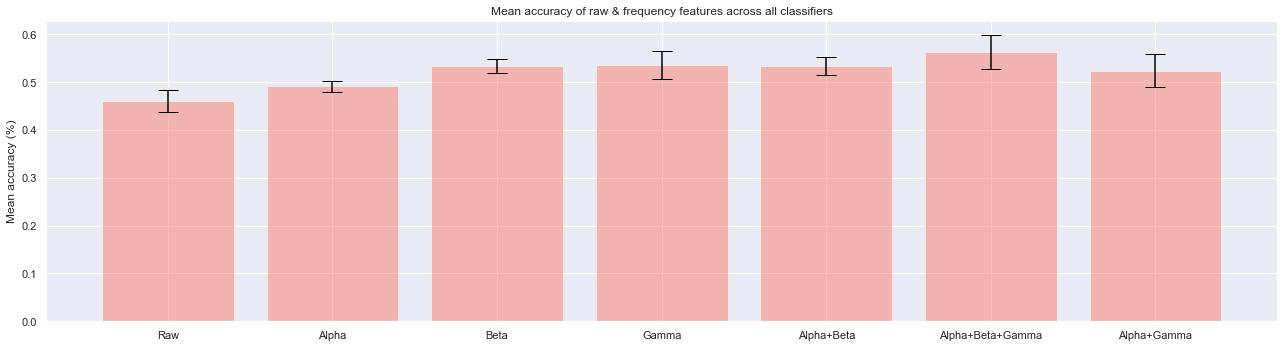

In [206]:
freq_raw = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
engineered = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]

x_pos = freq_raw
labels =  np.arange(len(x_pos))
values = [np.mean(raw_data), np.mean(alpha),np.mean(beta),np.mean(gamma),np.mean(alpha_beta),np.mean(alpha_beta_gamma),np.mean(alpha_gamma)]
error = [np.std(raw_data), np.std(alpha),np.std(beta),np.std(gamma),np.std(alpha_beta),np.std(alpha_beta_gamma),np.std(alpha_gamma)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Mean accuracy of raw & frequency features across all classifiers')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

## Alpha spectrograms classification accuracy

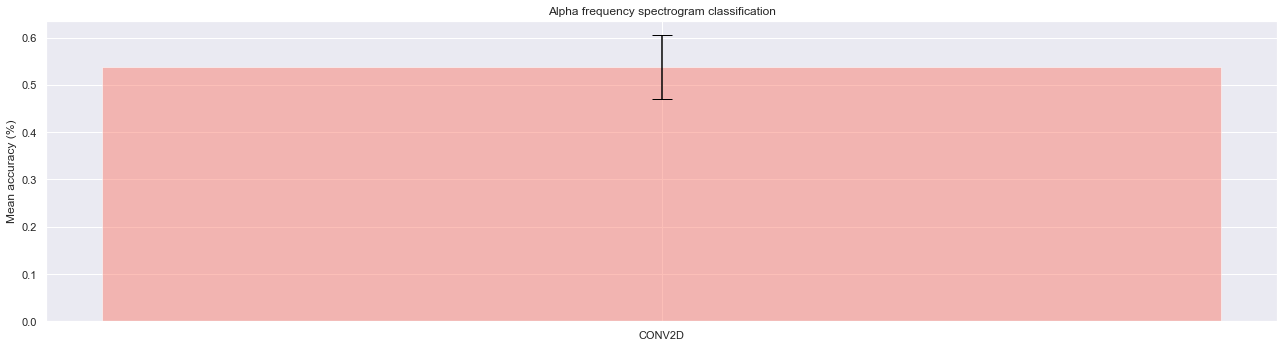

In [207]:
np.mean(alpha_spectrograms_all_acc_histories)


x_pos = ["CONV2D"]
labels =  np.arange(len(x_pos))
values = np.mean(alpha_spectrograms_all_acc_histories)
error = np.std(alpha_spectrograms_all_acc_histories)

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Alpha frequency spectrogram classification')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

# Summarizing the results - automated data cleaning approach

## Each feature mean accuracy per each classifier

### LDA

In [208]:
automated_lda_raw_and_frequency_scores = [lda_raw_automated_results,lda_alpha_automated_results,lda_beta_automated_results,lda_gamma_automated_results,lda_alpha_beta_automated_results,lda_alpha_beta_gamma_automated_results,lda_alpha_gamma_automated_results]
automated_lda_engineered_frequencies = [lda_alpha_automated_results_channel_engineered,lda_beta_automated_results_channel_engineered,lda_gamma_automated_results_channel_engineered,lda_alpha_automated_results_time_engineered,lda_beta_automated_results_time_engineered,lda_gamma_automated_results_time_engineered,lda_alpha_automated_results_channel_time_engineered,lda_beta_automated_results_channel_time_engineered,lda_gamma_automated_results_channel_time_engineered]


automated_lda_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
automated_lda_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]
 


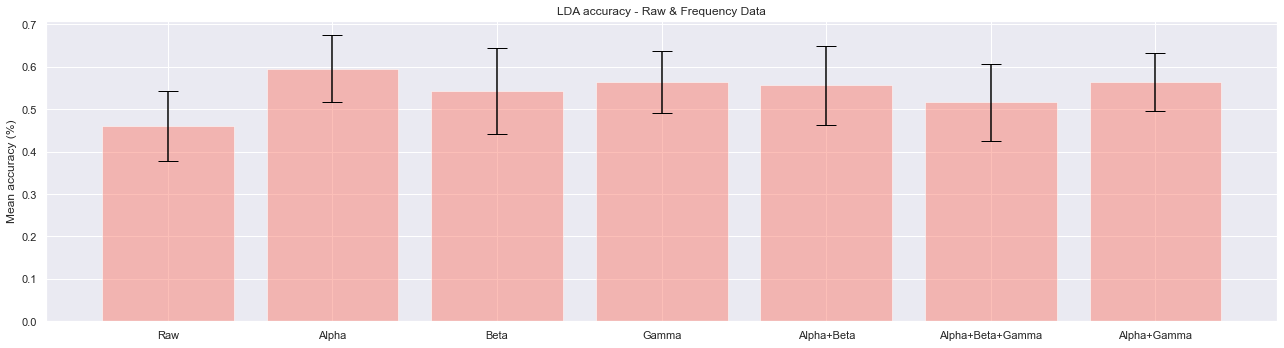

In [209]:
# plotting for raw & frequency

mean_scores_raw_freqs_lda = []
for item in range(0,len(automated_lda_raw_and_frequency_scores)):
    mean_score = np.mean(automated_lda_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_lda.append(mean_score)
    
std_scores_raw_freqs_lda = []
for item in range(0,len(automated_lda_raw_and_frequency_scores)):
    std_score = np.std(automated_lda_raw_and_frequency_scores[item])
    std_scores_raw_freqs_lda.append(std_score)

x_pos = automated_lda_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_lda
error = std_scores_raw_freqs_lda

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LDA accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

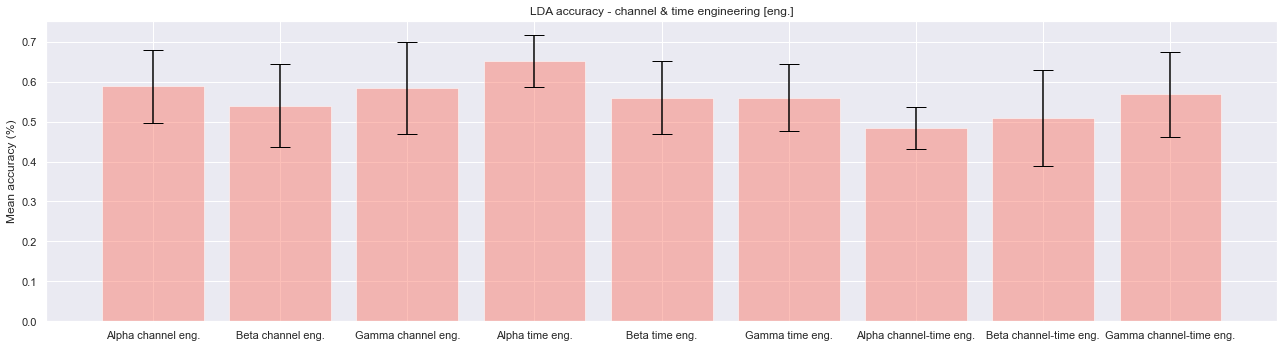

In [210]:
# plotting for engineered frequencies 

mean_scores_lda_engineered_frequencies = []
for item in range(0,len(automated_lda_engineered_frequencies)):
    mean_score = np.mean(automated_lda_engineered_frequencies[item])
    mean_scores_lda_engineered_frequencies.append(mean_score)
    
std_scores_raw_lda_engineered_frequencies = []
for item in range(0,len(automated_lda_engineered_frequencies)):
    std_score = np.std(automated_lda_engineered_frequencies[item])
    std_scores_raw_lda_engineered_frequencies.append(std_score)

x_pos = automated_lda_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_lda_engineered_frequencies
error = std_scores_raw_lda_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LDA accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### SVM

In [211]:
automated_svm_raw_and_frequency_scores = [svm_raw_automated_results,svm_alpha_automated_results,svm_beta_automated_results,svm_gamma_automated_results,svm_alpha_beta_automated_results,svm_alpha_beta_gamma_automated_results,svm_alpha_gamma_automated_results]
automated_svm_engineered_frequencies = [svm_alpha_automated_results_channel_engineered,svm_beta_automated_results_channel_engineered,svm_gamma_automated_results_channel_engineered,svm_alpha_automated_results_time_engineered,svm_beta_automated_results_time_engineered,svm_gamma_automated_results_time_engineered,svm_alpha_automated_results_channel_time_engineered,svm_beta_automated_results_channel_time_engineered,svm_gamma_automated_results_channel_time_engineered]


automated_svm_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
automated_svm_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]


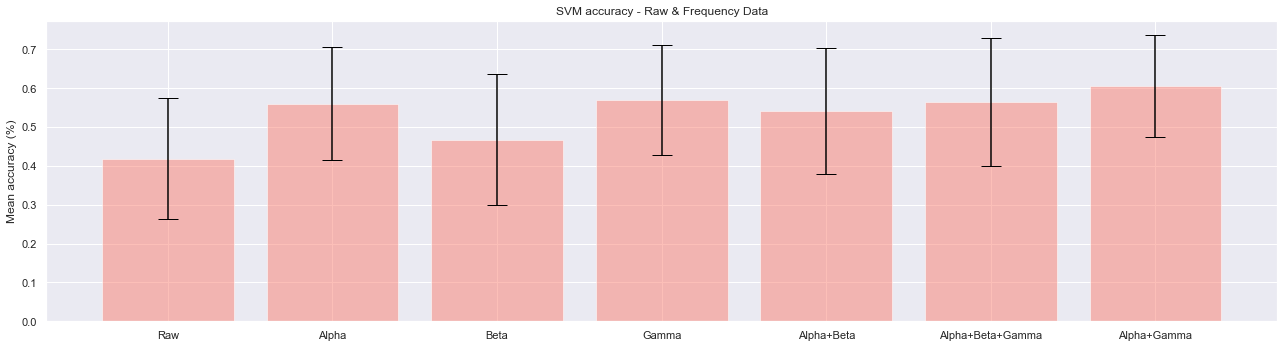

In [212]:
# plotting for raw & frequency

mean_scores_raw_freqs_svm = []
for item in range(0,len(automated_svm_raw_and_frequency_scores)):
    mean_score = np.mean(automated_svm_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_svm.append(mean_score)
    
std_scores_raw_freqs_svm = []
for item in range(0,len(automated_svm_raw_and_frequency_scores)):
    std_score = np.std(automated_svm_raw_and_frequency_scores[item])
    std_scores_raw_freqs_svm.append(std_score)

x_pos = automated_svm_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_svm
error = std_scores_raw_freqs_svm

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('SVM accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


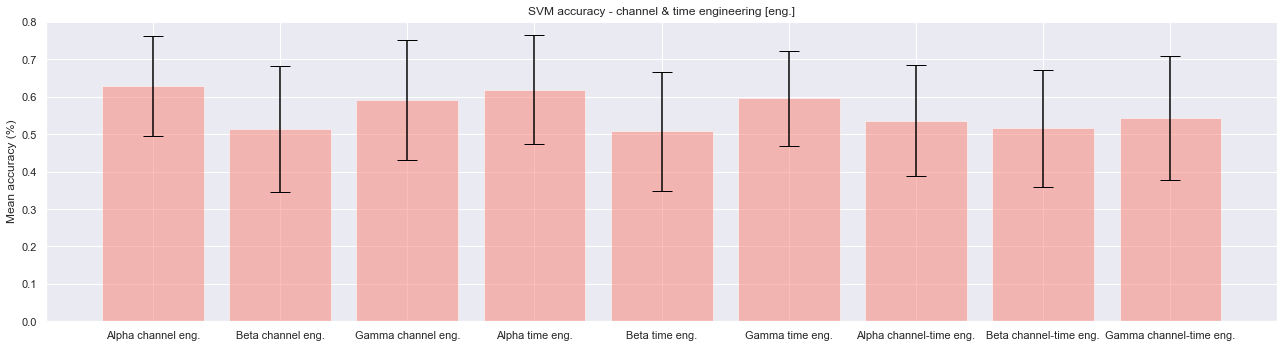

In [213]:
# plotting for engineered frequencies 

mean_scores_svm_engineered_frequencies = []
for item in range(0,len(automated_svm_engineered_frequencies)):
    mean_score = np.mean(automated_svm_engineered_frequencies[item])
    mean_scores_svm_engineered_frequencies.append(mean_score)
    
std_scores_raw_svm_engineered_frequencies = []
for item in range(0,len(automated_svm_engineered_frequencies)):
    std_score = np.std(automated_svm_engineered_frequencies[item])
    std_scores_raw_svm_engineered_frequencies.append(std_score)

x_pos = automated_svm_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_svm_engineered_frequencies
error = std_scores_raw_svm_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('SVM accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### LSTM

In [214]:
automated_LSTM_raw_and_frequency_scores = [LSTM_all_acc_histories_raw_automated,LSTM_all_acc_histories_alpha_automated,LSTM_all_acc_histories_beta_automated,LSTM_all_acc_histories_gamma_automated,LSTM_all_acc_histories_alpha_beta_automated,LSTM_all_acc_histories_alpha_beta_gamma_automated,LSTM_all_acc_histories_alpha_gamma_automated]
automated_LSTM_engineered_frequencies = [LSTM_all_acc_histories_alpha_automated_channel_engineered,LSTM_all_acc_histories_beta_automated_channel_engineered,LSTM_all_acc_histories_gamma_automated_channel_engineered,LSTM_all_acc_histories_alpha_automated_time_engineered,LSTM_all_acc_histories_beta_automated_time_engineered,LSTM_all_acc_histories_gamma_automated_time_engineered,LSTM_all_acc_histories_alpha_automated_channel_time_engineered,LSTM_all_acc_histories_beta_automated_channel_time_engineered,LSTM_all_acc_histories_gamma_automated_channel_time_engineered]


automated_LSTM_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
automated_LSTM_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]
 


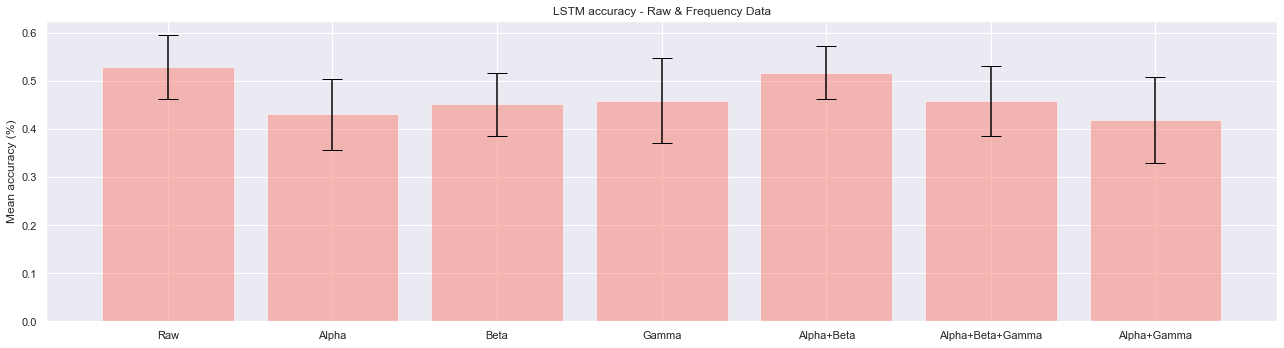

In [215]:
# plotting for raw & frequency

mean_scores_raw_freqs_LSTM = []
for item in range(0,len(automated_LSTM_raw_and_frequency_scores)):
    mean_score = np.mean(automated_LSTM_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_LSTM.append(mean_score)
    
std_scores_raw_freqs_LSTM = []
for item in range(0,len(automated_LSTM_raw_and_frequency_scores)):
    std_score = np.std(automated_LSTM_raw_and_frequency_scores[item])
    std_scores_raw_freqs_LSTM.append(std_score)

x_pos = automated_LSTM_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_LSTM
error = std_scores_raw_freqs_LSTM

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LSTM accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


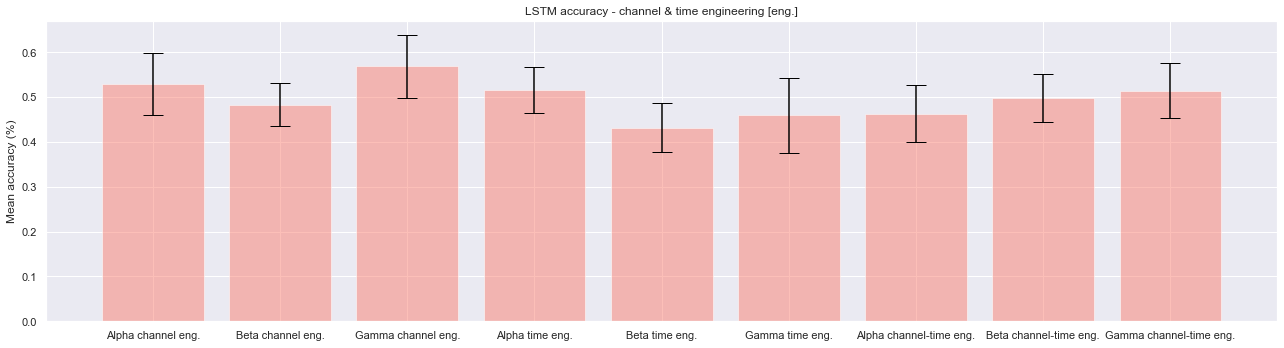

In [216]:
# plotting for engineered frequencies 

mean_scores_LSTM_engineered_frequencies = []
for item in range(0,len(automated_LSTM_engineered_frequencies)):
    mean_score = np.mean(automated_LSTM_engineered_frequencies[item])
    mean_scores_LSTM_engineered_frequencies.append(mean_score)
    
std_scores_raw_LSTM_engineered_frequencies = []
for item in range(0,len(automated_LSTM_engineered_frequencies)):
    std_score = np.std(automated_LSTM_engineered_frequencies[item])
    std_scores_raw_LSTM_engineered_frequencies.append(std_score)

x_pos = automated_LSTM_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_LSTM_engineered_frequencies
error = std_scores_raw_LSTM_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('LSTM accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### CONV1D

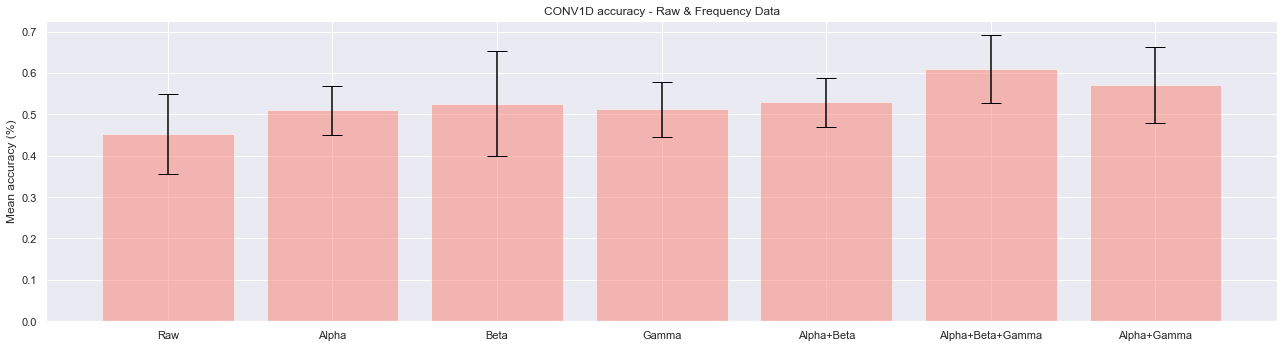

In [217]:
automated_CONV1D_raw_and_frequency_scores = [CONV1D_all_acc_histories_raw_automated,CONV1D_all_acc_histories_alpha_automated,CONV1D_all_acc_histories_beta_automated,CONV1D_all_acc_histories_gamma_automated,CONV1D_all_acc_histories_alpha_beta_automated,CONV1D_all_acc_histories_alpha_beta_gamma_automated,CONV1D_all_acc_histories_alpha_gamma_automated]
automated_CONV1D_engineered_frequencies = [CONV1D_all_acc_histories_alpha_automated_channel_engineered,CONV1D_all_acc_histories_beta_automated_channel_engineered,CONV1D_all_acc_histories_gamma_automated_channel_engineered,CONV1D_all_acc_histories_alpha_automated_time_engineered,CONV1D_all_acc_histories_beta_automated_time_engineered,CONV1D_all_acc_histories_gamma_automated_time_engineered,CONV1D_all_acc_histories_alpha_automated_channel_time_engineered,CONV1D_all_acc_histories_beta_automated_channel_time_engineered,CONV1D_all_acc_histories_gamma_automated_channel_time_engineered]


automated_CONV1D_raw_and_frequency_scores_str = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
automated_CONV1D_engineered_freqs_str = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]

# plotting for raw & frequency

mean_scores_raw_freqs_CONV1D = []
for item in range(0,len(automated_CONV1D_raw_and_frequency_scores)):
    mean_score = np.mean(automated_CONV1D_raw_and_frequency_scores[item])
    mean_scores_raw_freqs_CONV1D.append(mean_score)
    
std_scores_raw_freqs_CONV1D = []
for item in range(0,len(automated_CONV1D_raw_and_frequency_scores)):
    std_score = np.std(automated_CONV1D_raw_and_frequency_scores[item])
    std_scores_raw_freqs_CONV1D.append(std_score)

x_pos = automated_CONV1D_raw_and_frequency_scores_str
labels = np.arange(len(x_pos))
values = mean_scores_raw_freqs_CONV1D
error = std_scores_raw_freqs_CONV1D

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('CONV1D accuracy - Raw & Frequency Data')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

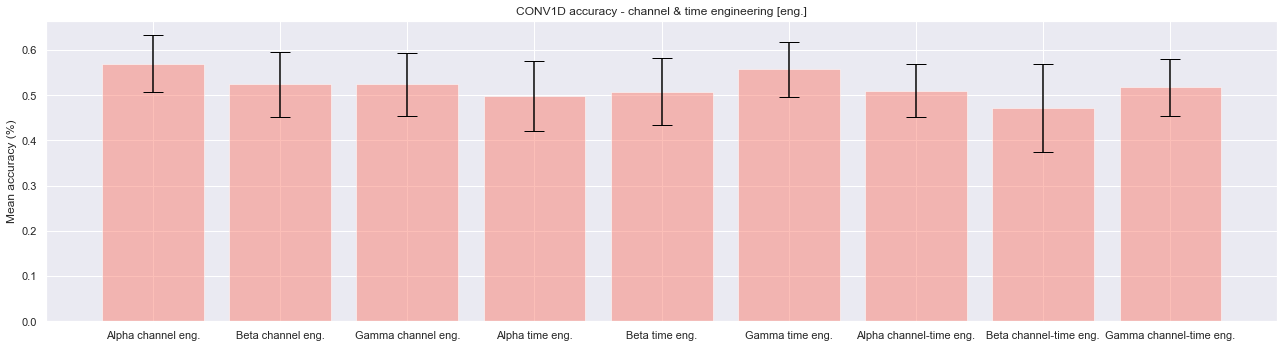

In [218]:
# plotting for engineered frequencies 

mean_scores_CONV1D_engineered_frequencies = []
for item in range(0,len(automated_CONV1D_engineered_frequencies)):
    mean_score = np.mean(automated_CONV1D_engineered_frequencies[item])
    mean_scores_CONV1D_engineered_frequencies.append(mean_score)
    
std_scores_raw_CONV1D_engineered_frequencies = []
for item in range(0,len(automated_CONV1D_engineered_frequencies)):
    std_score = np.std(automated_CONV1D_engineered_frequencies[item])
    std_scores_raw_CONV1D_engineered_frequencies.append(std_score)

x_pos = automated_CONV1D_engineered_freqs_str
labels = np.arange(len(x_pos))
values = mean_scores_CONV1D_engineered_frequencies
error = std_scores_raw_CONV1D_engineered_frequencies

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('CONV1D accuracy - channel & time engineering [eng.]')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## Mean of feature category accuracies across each classifier

In [219]:
raw_data_LDA = [lda_raw_automated_results]
raw_data_SVM = [svm_raw_automated_results]
frequencies_LDA = [lda_alpha_automated_results,lda_beta_automated_results,lda_gamma_automated_results,lda_alpha_beta_automated_results,lda_alpha_beta_gamma_automated_results]
frequencies_SVM = [svm_alpha_automated_results,svm_beta_automated_results,svm_gamma_automated_results,svm_alpha_beta_automated_results,svm_alpha_beta_gamma_automated_results]


raw_data_LSTM = [LSTM_all_acc_histories_raw_automated]
raw_data_CONV1D = [CONV1D_all_acc_histories_raw_automated]
frequencies_LSTM = [LSTM_all_acc_histories_alpha_automated,LSTM_all_acc_histories_beta_automated,LSTM_all_acc_histories_gamma_automated,LSTM_all_acc_histories_alpha_beta_automated,LSTM_all_acc_histories_alpha_beta_gamma_automated,LSTM_all_acc_histories_alpha_gamma_automated]
frequencies_CONV1D = [CONV1D_all_acc_histories_alpha_automated,CONV1D_all_acc_histories_beta_automated,CONV1D_all_acc_histories_gamma_automated,CONV1D_all_acc_histories_alpha_beta_automated,CONV1D_all_acc_histories_alpha_beta_gamma_automated,CONV1D_all_acc_histories_alpha_gamma_automated]


In [220]:
raws = [raw_data_LDA,raw_data_SVM,raw_data_LSTM,raw_data_CONV1D]

In [221]:
mean_scores_raw = []
for item in range(0,len(raws)):
    mean_score = np.mean(raws[item])
    mean_scores_raw.append(mean_score)
    

In [222]:
raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_SVM_mean = np.mean(raw_data_SVM)
raw_data_SVM_std = np.std(raw_data_SVM)

frequencies_LDA_mean = np.mean(frequencies_LDA)
frequencies_LDA_std = np.std(frequencies_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)

raw_data_LDA_mean = np.mean(raw_data_LDA)
raw_data_LDA_std = np.std(raw_data_LDA)


# Mean of each frequency band across all classifiers

In [223]:
# frequencies

alpha_frequencies = [np.mean(lda_alpha_automated_results), np.mean(svm_alpha_automated_results), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_alpha_automated), np.mean(lda_alpha_automated_results_channel_engineered), np.mean(lda_alpha_automated_results_time_engineered), np.mean(lda_alpha_automated_results_channel_time_engineered), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_time_engineered), np.mean(svm_alpha_automated_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered)]
beta_frequencies = [np.mean(lda_beta_automated_results), np.mean(svm_beta_automated_results), np.mean(LSTM_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_beta_automated), np.mean(lda_beta_automated_results_channel_engineered), np.mean(lda_beta_automated_results_time_engineered), np.mean(lda_beta_automated_results_channel_time_engineered), np.mean(svm_beta_automated_results_channel_engineered), np.mean(svm_beta_automated_results_time_engineered), np.mean(svm_beta_automated_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_engineered), np.mean(LSTM_all_acc_histories_beta_automated_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_time_engineered)]
gamma_frequencies = [np.mean(lda_gamma_automated_results), np.mean(svm_gamma_automated_results), np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_gamma_automated), np.mean(lda_gamma_automated_results_channel_engineered), np.mean(lda_gamma_automated_results_time_engineered), np.mean(lda_gamma_automated_results_channel_time_engineered), np.mean(svm_gamma_automated_results_channel_engineered), np.mean(svm_gamma_automated_results_time_engineered), np.mean(svm_gamma_automated_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]
alpha_beta_frequencies = [np.mean(lda_alpha_automated_results), np.mean(svm_alpha_automated_results), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_alpha_automated)]
alpha_beta_gamma_frequencies = [np.mean(lda_alpha_beta_automated_results), np.mean(svm_alpha_beta_automated_results), np.mean(LSTM_all_acc_histories_alpha_beta_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_automated)]
alpha_gamma_frequencies = [np.mean(lda_alpha_gamma_automated_results), np.mean(svm_alpha_gamma_automated_results), np.mean(LSTM_all_acc_histories_alpha_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_gamma_automated)]


values = [np.mean(alpha_frequencies),np.mean(beta_frequencies),np.mean(gamma_frequencies),np.mean(alpha_beta_frequencies),np.mean(alpha_beta_gamma_frequencies),np.mean(alpha_gamma_frequencies)]
error = [np.std(alpha_frequencies),np.std(beta_frequencies),np.std(gamma_frequencies),np.std(alpha_beta_frequencies),np.std(alpha_beta_gamma_frequencies),np.std(alpha_gamma_frequencies)]

x_pos = ["Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
labels = np.arange(len(x_pos))
values = values
error = error

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Frequency accuracies across all classifiers')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()


## Mean accuracy for raw data across all classifiers

In [224]:
# raw data

N = 1
ind = np.arange(N) 
width = 0.1
  
xvals = np.mean(raw_data_LDA)
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = np.mean(raw_data_SVM)
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = np.mean(raw_data_LSTM)
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

kvals = np.mean(raw_data_CONV1D)
bar4 = plt.bar(ind+width*3, kvals, width, color = 'y')

  
plt.xlabel("Feature group")
plt.ylabel('Average accuracy (%)')
plt.title("Comparison of features across classifiers")
  
plt.xticks(ind+width,['Raw'])
plt.legend( (bar1, bar2, bar3, bar4), ('LDA', 'SVM', 'LSTM', "CONV1D") )
plt.show()

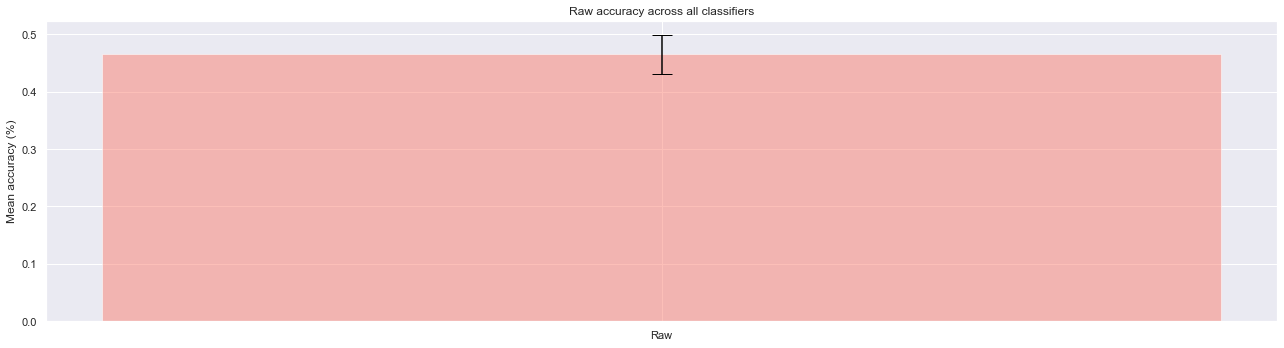

In [225]:
# raw

values = [np.mean(alpha_frequencies),np.mean(beta_frequencies),np.mean(gamma_frequencies),np.mean(alpha_beta_frequencies),np.mean(alpha_beta_gamma_frequencies),np.mean(alpha_gamma_frequencies)]
error = [np.std(alpha_frequencies),np.std(beta_frequencies),np.std(gamma_frequencies),np.std(alpha_beta_frequencies),np.std(alpha_beta_gamma_frequencies),np.std(alpha_gamma_frequencies)]

x_pos = ["Raw"]
labels =  np.arange(len(x_pos))
values = np.mean([np.mean(raw_data_LDA),np.mean(raw_data_SVM), np.mean(raw_data_LSTM), np.mean(raw_data_CONV1D)])
error = np.std([np.std(raw_data_LDA),np.std(raw_data_SVM), np.std(raw_data_LSTM), np.std(raw_data_CONV1D)])

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Raw accuracy across all classifiers')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

## Checking whether engineering paid off or not

In [226]:
standard_frequencies_alpha = (np.mean(lda_alpha_automated_results),np.mean(svm_alpha_automated_results),np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_alpha_automated))
standard_frequencies_beta = (np.mean(lda_beta_automated_results),np.mean(svm_beta_automated_results),np.mean(LSTM_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_beta_automated) )
standard_frequencies_gamma = (np.mean(lda_gamma_automated_results),np.mean(svm_gamma_automated_results),np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_gamma_automated) )



channeleng_frequencies_alpha = (np.mean(lda_alpha_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_channel_engineered), LSTM_all_acc_histories_alpha_automated_channel_engineered, CONV1D_all_acc_histories_alpha_automated_channel_engineered)
channeleng_frequencies_beta = (np.mean(lda_beta_automated_results_channel_engineered), np.mean(svm_beta_automated_results_channel_engineered), LSTM_all_acc_histories_beta_automated_channel_engineered, CONV1D_all_acc_histories_beta_automated_channel_engineered)
channeleng_frequencies_gamma = (np.mean(lda_gamma_automated_results_channel_engineered), np.mean(svm_gamma_automated_results_channel_engineered), LSTM_all_acc_histories_gamma_automated_channel_engineered, CONV1D_all_acc_histories_gamma_automated_channel_engineered)


timeeng_frequencies_alpha = (np.mean(lda_alpha_automated_results_time_engineered), np.mean(svm_alpha_automated_results_time_engineered), LSTM_all_acc_histories_alpha_automated_time_engineered, CONV1D_all_acc_histories_alpha_automated_time_engineered)
timeeng_frequencies_beta = (np.mean(lda_beta_automated_results_time_engineered), np.mean(svm_beta_automated_results_time_engineered), LSTM_all_acc_histories_beta_automated_time_engineered, CONV1D_all_acc_histories_beta_automated_time_engineered)
timeeng_frequencies_gamma = (np.mean(lda_gamma_automated_results_time_engineered), np.mean(svm_gamma_automated_results_time_engineered), LSTM_all_acc_histories_gamma_automated_time_engineered, CONV1D_all_acc_histories_gamma_automated_time_engineered)

channeltimeeng_frequencies_alpha = (np.mean(lda_alpha_automated_results_channel_time_engineered), np.mean(svm_alpha_automated_results_channel_time_engineered), LSTM_all_acc_histories_alpha_automated_channel_time_engineered, CONV1D_all_acc_histories_alpha_automated_channel_time_engineered)
channeltimeeng_frequencies_beta= (np.mean(lda_beta_automated_results_channel_time_engineered), np.mean(svm_beta_automated_results_channel_time_engineered), LSTM_all_acc_histories_beta_automated_channel_time_engineered, CONV1D_all_acc_histories_beta_automated_channel_time_engineered)
channeltimeeng_frequencies_gamma = (np.mean(lda_gamma_automated_results_channel_time_engineered), np.mean(svm_gamma_automated_results_channel_time_engineered), LSTM_all_acc_histories_gamma_automated_channel_time_engineered, CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)



N = 3
ind = np.arange(N) 
width = 0.1
  
xvals = np.mean([np.mean(standard_frequencies_alpha), np.mean(standard_frequencies_beta), np.mean(standard_frequencies_gamma)])
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = np.mean([np.mean(channeleng_frequencies_alpha), np.mean(channeleng_frequencies_beta), np.mean(channeleng_frequencies_gamma)])
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = np.mean([np.mean(timeeng_frequencies_alpha), np.mean(timeeng_frequencies_beta), np.mean(timeeng_frequencies_gamma)])
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

kvals = np.mean([np.mean(channeltimeeng_frequencies_alpha), np.mean(channeltimeeng_frequencies_beta), np.mean(channeltimeeng_frequencies_gamma)])
bar4 = plt.bar(ind+width*3, kvals, width, color = 'y')

  
plt.xlabel("Feature group")
plt.ylabel('Average accuracy (%)')
plt.title("Frequency feature engineering vs Standard frequency data")
  
plt.xticks(ind+width,['Alpha', 'Beta', 'Gamma'])
plt.legend( (bar1, bar2, bar3, bar4), ('Standard', 'Channel engineered', 'Time engineered', "Channel & time engineered") )
plt.show()

## Mean accuracy of all feature for each classifier

In [227]:
LDA_accuracies = [np.mean(lda_raw_automated_results), np.mean(lda_alpha_automated_results), np.mean(lda_beta_automated_results), np.mean(lda_gamma_automated_results), np.mean(lda_alpha_beta_automated_results), np.mean(lda_alpha_beta_gamma_automated_results), np.mean(lda_alpha_automated_results_channel_engineered), np.mean(lda_beta_automated_results_channel_engineered), np.mean(lda_gamma_automated_results_channel_engineered), np.mean(lda_alpha_automated_results_time_engineered), np.mean(lda_beta_automated_results_time_engineered), np.mean(lda_gamma_automated_results_time_engineered), np.mean(lda_alpha_automated_results_channel_time_engineered), np.mean(lda_beta_automated_results_channel_time_engineered), np.mean(lda_gamma_automated_results_channel_time_engineered)]
SVM_accuracies = [np.mean(svm_raw_automated_results), np.mean(svm_alpha_automated_results), np.mean(svm_beta_automated_results), np.mean(svm_gamma_automated_results), np.mean(svm_alpha_beta_automated_results), np.mean(svm_alpha_beta_gamma_automated_results), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_beta_automated_results_channel_engineered), np.mean(svm_gamma_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_time_engineered), np.mean(svm_beta_automated_results_time_engineered), np.mean(svm_gamma_automated_results_time_engineered), np.mean(svm_beta_automated_results_channel_time_engineered), np.mean(svm_gamma_automated_results_channel_time_engineered)]
LSTM_accuracies = [np.mean(LSTM_all_acc_histories_raw_automated), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(LSTM_all_acc_histories_beta_automated), np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_beta_automated), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_time_engineered)]
CONV1D_accuracies = [np.mean(CONV1D_all_acc_histories_raw_automated), np.mean(CONV1D_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]


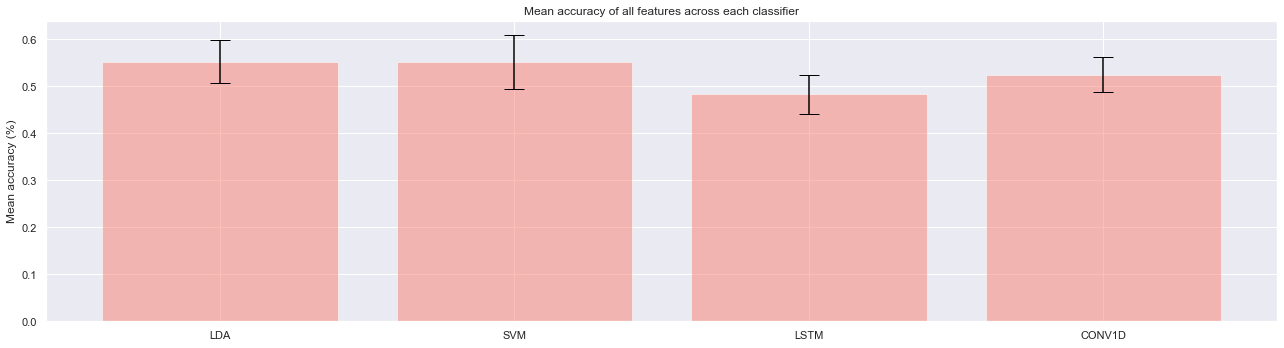

In [228]:

x_pos = ["LDA", "SVM", "LSTM", "CONV1D"]
labels =  np.arange(len(x_pos))
values = [np.mean(LDA_accuracies), np.mean(SVM_accuracies),np.mean(LSTM_accuracies), np.mean(CONV1D_accuracies)]
error = [np.std(LDA_accuracies), np.std(SVM_accuracies),np.std(LSTM_accuracies), np.std(CONV1D_accuracies)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Mean accuracy of all features across each classifier')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

## Each feature mean accuracy across all classifiers

In [229]:
# raw and frequency

raw_data = [np.mean(lda_raw_automated_results), np.mean(svm_raw_automated_results), np.mean(LSTM_all_acc_histories_raw_automated),  np.mean(CONV1D_all_acc_histories_raw_automated)]
alpha = [np.mean(lda_alpha_automated_results), np.mean(svm_alpha_automated_results), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_alpha_automated) ]
beta = [np.mean(lda_beta_automated_results), np.mean(svm_beta_automated_results),np.mean(LSTM_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_beta_automated)] 
gamma = [np.mean(lda_gamma_automated_results), np.mean(svm_gamma_automated_results),np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_gamma_automated)  ]
alpha_beta = [np.mean(lda_alpha_beta_automated_results), np.mean(svm_alpha_beta_automated_results), np.mean(LSTM_all_acc_histories_alpha_beta_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_automated)] 
alpha_beta_gamma = [np.mean(lda_alpha_beta_gamma_automated_results), np.mean(svm_alpha_beta_gamma_automated_results), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_automated)] 
alpha_gamma = [np.mean(lda_alpha_gamma_automated_results), np.mean(svm_alpha_gamma_automated_results), np.mean(LSTM_all_acc_histories_alpha_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_gamma_automated)]


# engineered

alpha_channel_eng = [np.mean(lda_alpha_automated_results_channel_engineered),np.mean(svm_alpha_automated_results_channel_engineered),np.mean(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_engineered)]
beta_channel_eng = [np.mean(lda_beta_automated_results_channel_engineered),np.mean(svm_beta_automated_results_channel_engineered),np.mean(LSTM_all_acc_histories_beta_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_engineered)]
gamma_channel_eng = [np.mean(lda_gamma_automated_results_channel_engineered),np.mean(svm_gamma_automated_results_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_engineered)]
alpha_time_eng = [np.mean(lda_alpha_automated_results_time_engineered),np.mean(svm_alpha_automated_results_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_time_engineered)]
beta_time_eng = [np.mean(lda_beta_automated_results_time_engineered),np.mean(svm_beta_automated_results_time_engineered),np.mean(LSTM_all_acc_histories_beta_automated_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_time_engineered)]
gamma_time_eng =[np.mean(lda_gamma_automated_results_time_engineered),np.mean(svm_gamma_automated_results_time_engineered),np.mean(LSTM_all_acc_histories_gamma_automated_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_time_engineered)]
alpha_channel_time_eng = [np.mean(lda_alpha_automated_results_channel_time_engineered),np.mean(svm_alpha_automated_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered)]
beta_channel_time_eng = [np.mean(lda_beta_automated_results_channel_time_engineered),np.mean(svm_beta_automated_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_time_engineered)]
gamma_channel_time_eng =[np.mean(lda_gamma_automated_results_channel_time_engineered),np.mean(svm_gamma_automated_results_channel_time_engineered),np.mean(LSTM_all_acc_histories_gamma_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]

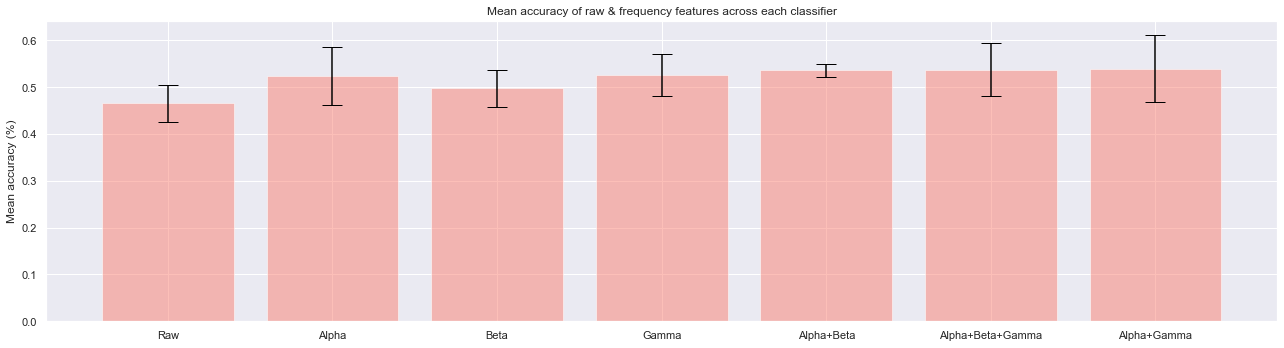

In [230]:
freq_raw = ["Raw","Alpha","Beta","Gamma","Alpha+Beta","Alpha+Beta+Gamma","Alpha+Gamma"]
engineered = ["Alpha channel eng.","Beta channel eng.","Gamma channel eng.","Alpha time eng.","Beta time eng.","Gamma time eng.","Alpha channel-time eng.","Beta channel-time eng.","Gamma channel-time eng."]

x_pos = freq_raw
labels =  np.arange(len(x_pos))
values = [np.mean(raw_data), np.mean(alpha),np.mean(beta),np.mean(gamma),np.mean(alpha_beta),np.mean(alpha_beta_gamma),np.mean(alpha_gamma)]
error = [np.std(raw_data), np.std(alpha),np.std(beta),np.std(gamma),np.std(alpha_beta),np.std(alpha_beta_gamma),np.std(alpha_gamma)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Mean accuracy of raw & frequency features across each classifier')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

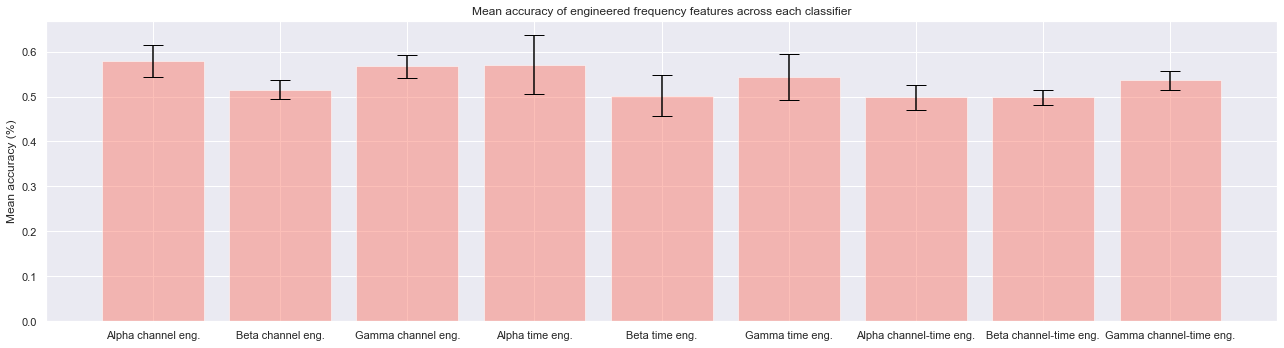

In [231]:

x_pos = engineered
labels =  np.arange(len(x_pos))
values = [np.mean(alpha_channel_eng), np.mean(beta_channel_eng),np.mean(gamma_channel_eng),np.mean(alpha_time_eng),np.mean(beta_time_eng),np.mean(gamma_time_eng), np.mean(alpha_channel_time_eng), np.mean(beta_channel_time_eng), np.mean(gamma_channel_time_eng)]
error = [np.std(alpha_channel_eng), np.std(beta_channel_eng),np.std(gamma_channel_eng),np.std(alpha_time_eng),np.std(beta_time_eng),np.std(gamma_time_eng), np.std(alpha_channel_time_eng), np.std(beta_channel_time_eng), np.std(gamma_channel_time_eng)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Mean accuracy of engineered frequency features across each classifier')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

# Comparing standard to automated

In [232]:
standard_accuracies = [np.mean(lda_raw_standard_results), np.mean(lda_alpha_standard_results), np.mean(lda_beta_standard_results), np.mean(lda_gamma_standard_results), np.mean(lda_alpha_beta_standard_results), np.mean(lda_alpha_beta_gamma_standard_results), np.mean(lda_alpha_standard_results_channel_engineered), np.mean(lda_beta_standard_results_channel_engineered), np.mean(lda_gamma_standard_results_channel_engineered), np.mean(lda_alpha_standard_results_time_engineered), np.mean(lda_beta_standard_results_time_engineered), np.mean(lda_gamma_standard_results_time_engineered), np.mean(lda_alpha_standard_results_channel_time_engineered), np.mean(lda_beta_standard_results_channel_time_engineered), np.mean(lda_gamma_standard_results_channel_time_engineered), np.mean(svm_raw_standard_results), np.mean(svm_alpha_standard_results), np.mean(svm_beta_standard_results), np.mean(svm_gamma_standard_results), np.mean(svm_alpha_beta_standard_results), np.mean(svm_alpha_beta_gamma_standard_results), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_beta_standard_results_channel_engineered), np.mean(svm_gamma_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_time_engineered), np.mean(svm_beta_standard_results_time_engineered), np.mean(svm_gamma_standard_results_time_engineered), np.mean(svm_beta_standard_results_channel_time_engineered), np.mean(svm_gamma_standard_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_raw_standard), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(LSTM_all_acc_histories_beta_standard), np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_beta_standard), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_raw_standard), np.mean(CONV1D_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]
automated_accuracies = [np.mean(lda_raw_automated_results), np.mean(lda_alpha_automated_results), np.mean(lda_beta_automated_results), np.mean(lda_gamma_automated_results), np.mean(lda_alpha_beta_automated_results), np.mean(lda_alpha_beta_gamma_automated_results), np.mean(lda_alpha_automated_results_channel_engineered), np.mean(lda_beta_automated_results_channel_engineered), np.mean(lda_gamma_automated_results_channel_engineered), np.mean(lda_alpha_automated_results_time_engineered), np.mean(lda_beta_automated_results_time_engineered), np.mean(lda_gamma_automated_results_time_engineered), np.mean(lda_alpha_automated_results_channel_time_engineered), np.mean(lda_beta_automated_results_channel_time_engineered), np.mean(lda_gamma_automated_results_channel_time_engineered), np.mean(svm_raw_automated_results), np.mean(svm_alpha_automated_results), np.mean(svm_beta_automated_results), np.mean(svm_gamma_automated_results), np.mean(svm_alpha_beta_automated_results), np.mean(svm_alpha_beta_gamma_automated_results), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_beta_automated_results_channel_engineered), np.mean(svm_gamma_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_time_engineered), np.mean(svm_beta_automated_results_time_engineered), np.mean(svm_gamma_automated_results_time_engineered), np.mean(svm_beta_automated_results_channel_time_engineered), np.mean(svm_gamma_automated_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_raw_automated), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(LSTM_all_acc_histories_beta_automated), np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_beta_automated), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_raw_automated), np.mean(CONV1D_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]


In [233]:
standard_accuracies_mean = np.array(standard_accuracies)
standard_accuracies_mean.mean()

0.5224213783947023

In [234]:
automated_accuracies_mean = np.array(automated_accuracies)
automated_accuracies_mean.mean()

0.5267191631411952

In [235]:
standard_accuracies_std = [np.std(lda_raw_standard_results), np.std(lda_alpha_standard_results), np.std(lda_beta_standard_results), np.std(lda_gamma_standard_results), np.std(lda_alpha_beta_standard_results), np.std(lda_alpha_beta_gamma_standard_results), np.std(lda_alpha_standard_results_channel_engineered), np.std(lda_beta_standard_results_channel_engineered), np.std(lda_gamma_standard_results_channel_engineered), np.std(lda_alpha_standard_results_time_engineered), np.std(lda_beta_standard_results_time_engineered), np.std(lda_gamma_standard_results_time_engineered), np.std(lda_alpha_standard_results_channel_time_engineered), np.std(lda_beta_standard_results_channel_time_engineered), np.std(lda_gamma_standard_results_channel_time_engineered), np.std(svm_raw_standard_results), np.std(svm_alpha_standard_results), np.std(svm_beta_standard_results), np.std(svm_gamma_standard_results), np.std(svm_alpha_beta_standard_results), np.std(svm_alpha_beta_gamma_standard_results), np.std(svm_alpha_standard_results_channel_engineered), np.std(svm_beta_standard_results_channel_engineered), np.std(svm_gamma_standard_results_channel_engineered), np.std(svm_alpha_standard_results_channel_engineered), np.std(svm_alpha_standard_results_time_engineered), np.std(svm_beta_standard_results_time_engineered), np.std(svm_gamma_standard_results_time_engineered), np.std(svm_beta_standard_results_channel_time_engineered), np.std(svm_gamma_standard_results_channel_time_engineered), np.std(LSTM_all_acc_histories_raw_standard), np.std(LSTM_all_acc_histories_alpha_standard), np.std(LSTM_all_acc_histories_beta_standard), np.std(LSTM_all_acc_histories_gamma_standard), np.std(LSTM_all_acc_histories_alpha_beta_standard), np.std(LSTM_all_acc_histories_alpha_beta_gamma_standard), np.std(LSTM_all_acc_histories_alpha_gamma_standard), np.std(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.std(LSTM_all_acc_histories_beta_standard_channel_engineered), np.std(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.std(LSTM_all_acc_histories_alpha_standard_time_engineered), np.std(LSTM_all_acc_histories_beta_standard_time_engineered), np.std(LSTM_all_acc_histories_gamma_standard_time_engineered), np.std(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.std(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.std(LSTM_all_acc_histories_gamma_standard_channel_time_engineered), np.std(CONV1D_all_acc_histories_raw_standard), np.std(CONV1D_all_acc_histories_alpha_standard), np.std(CONV1D_all_acc_histories_beta_standard), np.std(CONV1D_all_acc_histories_gamma_standard), np.std(CONV1D_all_acc_histories_alpha_beta_standard), np.std(CONV1D_all_acc_histories_alpha_beta_gamma_standard), np.std(CONV1D_all_acc_histories_alpha_gamma_standard), np.std(CONV1D_all_acc_histories_alpha_standard_channel_engineered), np.std(CONV1D_all_acc_histories_beta_standard_channel_engineered), np.std(CONV1D_all_acc_histories_gamma_standard_channel_engineered), np.std(CONV1D_all_acc_histories_alpha_standard_time_engineered), np.std(CONV1D_all_acc_histories_beta_standard_time_engineered), np.std(CONV1D_all_acc_histories_gamma_standard_time_engineered), np.std(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered), np.std(CONV1D_all_acc_histories_beta_standard_channel_time_engineered), np.std(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]
automated_accuracies_std = [np.std(lda_raw_automated_results), np.std(lda_alpha_automated_results), np.std(lda_beta_automated_results), np.std(lda_gamma_automated_results), np.std(lda_alpha_beta_automated_results), np.std(lda_alpha_beta_gamma_automated_results), np.std(lda_alpha_automated_results_channel_engineered), np.std(lda_beta_automated_results_channel_engineered), np.std(lda_gamma_automated_results_channel_engineered), np.std(lda_alpha_automated_results_time_engineered), np.std(lda_beta_automated_results_time_engineered), np.std(lda_gamma_automated_results_time_engineered), np.std(lda_alpha_automated_results_channel_time_engineered), np.std(lda_beta_automated_results_channel_time_engineered), np.std(lda_gamma_automated_results_channel_time_engineered), np.std(svm_raw_automated_results), np.std(svm_alpha_automated_results), np.std(svm_beta_automated_results), np.std(svm_gamma_automated_results), np.std(svm_alpha_beta_automated_results), np.std(svm_alpha_beta_gamma_automated_results), np.std(svm_alpha_automated_results_channel_engineered), np.std(svm_beta_automated_results_channel_engineered), np.std(svm_gamma_automated_results_channel_engineered), np.std(svm_alpha_automated_results_channel_engineered), np.std(svm_alpha_automated_results_time_engineered), np.std(svm_beta_automated_results_time_engineered), np.std(svm_gamma_automated_results_time_engineered), np.std(svm_beta_automated_results_channel_time_engineered), np.std(svm_gamma_automated_results_channel_time_engineered), np.std(LSTM_all_acc_histories_raw_automated), np.std(LSTM_all_acc_histories_alpha_automated), np.std(LSTM_all_acc_histories_beta_automated), np.std(LSTM_all_acc_histories_gamma_automated), np.std(LSTM_all_acc_histories_alpha_beta_automated), np.std(LSTM_all_acc_histories_alpha_beta_gamma_automated), np.std(LSTM_all_acc_histories_alpha_gamma_automated), np.std(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.std(LSTM_all_acc_histories_beta_automated_channel_engineered), np.std(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.std(LSTM_all_acc_histories_alpha_automated_time_engineered), np.std(LSTM_all_acc_histories_beta_automated_time_engineered), np.std(LSTM_all_acc_histories_gamma_automated_time_engineered), np.std(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.std(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.std(LSTM_all_acc_histories_gamma_automated_channel_time_engineered), np.std(CONV1D_all_acc_histories_raw_automated), np.std(CONV1D_all_acc_histories_alpha_automated), np.std(CONV1D_all_acc_histories_beta_automated), np.std(CONV1D_all_acc_histories_gamma_automated), np.std(CONV1D_all_acc_histories_alpha_beta_automated), np.std(CONV1D_all_acc_histories_alpha_beta_gamma_automated), np.std(CONV1D_all_acc_histories_alpha_gamma_automated), np.std(CONV1D_all_acc_histories_alpha_automated_channel_engineered), np.std(CONV1D_all_acc_histories_beta_automated_channel_engineered), np.std(CONV1D_all_acc_histories_gamma_automated_channel_engineered), np.std(CONV1D_all_acc_histories_alpha_automated_time_engineered), np.std(CONV1D_all_acc_histories_beta_automated_time_engineered), np.std(CONV1D_all_acc_histories_gamma_automated_time_engineered), np.std(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered), np.std(CONV1D_all_acc_histories_beta_automated_channel_time_engineered), np.std(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]


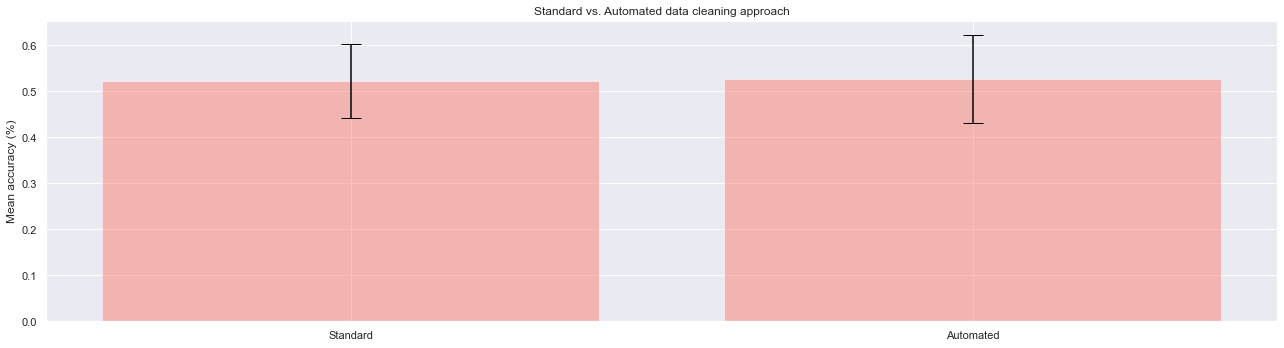

In [236]:
x_pos = ["Standard", "Automated"]
labels = np.arange(len(x_pos))
values = [np.mean(standard_accuracies), np.mean(automated_accuracies)]
error = [np.mean(standard_accuracies_std), np.mean(automated_accuracies_std)]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x_pos, values,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, color ='salmon')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Standard vs. Automated data cleaning approach')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


# Winners & loosers

In [237]:
list_of_results_standard = [np.mean(lda_raw_standard_results), np.mean(lda_alpha_standard_results), np.mean(lda_beta_standard_results), np.mean(lda_gamma_standard_results), np.mean(lda_alpha_beta_standard_results), np.mean(lda_alpha_beta_gamma_standard_results),np.mean(lda_alpha_standard_results_channel_engineered), np.mean(lda_beta_standard_results_channel_engineered), np.mean(lda_gamma_standard_results_channel_engineered), np.mean(lda_alpha_standard_results_time_engineered), np.mean(lda_beta_standard_results_time_engineered), np.mean(lda_gamma_standard_results_time_engineered), np.mean(lda_alpha_standard_results_channel_time_engineered), np.mean(lda_beta_standard_results_channel_time_engineered), np.mean(lda_gamma_standard_results_channel_time_engineered), np.mean(svm_raw_standard_results), np.mean(svm_alpha_standard_results), np.mean(svm_beta_standard_results), np.mean(svm_gamma_standard_results), np.mean(svm_alpha_beta_standard_results), np.mean(svm_alpha_beta_gamma_standard_results), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_beta_standard_results_channel_engineered), np.mean(svm_gamma_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_channel_engineered), np.mean(svm_alpha_standard_results_time_engineered), np.mean(svm_beta_standard_results_time_engineered), np.mean(svm_gamma_standard_results_time_engineered), np.mean(svm_beta_standard_results_channel_time_engineered), np.mean(svm_gamma_standard_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_raw_standard), np.mean(LSTM_all_acc_histories_alpha_standard), np.mean(LSTM_all_acc_histories_beta_standard), np.mean(LSTM_all_acc_histories_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_beta_standard), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_gamma_standard), np.mean(LSTM_all_acc_histories_alpha_standard_channel_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_time_engineered), np.mean(LSTM_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_standard_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_raw_standard), np.mean(CONV1D_all_acc_histories_alpha_standard), np.mean(CONV1D_all_acc_histories_beta_standard), np.mean(CONV1D_all_acc_histories_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_standard), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_gamma_standard), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_standard_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_standard_channel_time_engineered)]

In [238]:
list_of_results = ["LDA raw", "LDA alpha", "LDA beta", "LDA gamma", "LDA alpha beta", "LDA alpha beta gamma", "LDA alpha gamma", "LDA alpha channel eng.", "LDA beta channel eng.", "LDA gamma channel eng.", "LDA alpha time eng.", "LDA beta time eng.", "LDA gamma time eng.", "LDA alpha channel time eng", "LDA beta channel time eng.", "LDA gamma channel time eng.","SVM raw", "SVM alpha", "SVM beta", "SVM gamma", "SVM alpha beta", "SVM alpha beta gamma","SVM alpha gamma", "SVM alpha channel eng.", "SVM beta channel eng.", "SVM gamma channel eng.", "SVM alpha time eng.", "SVM beta time eng.", "SVM gamma time eng.", "SVM alpha channel time eng", "SVM beta channel time eng.", "SVM gamma channel time eng.","LSTM raw", "LSTM alpha", "LSTM beta", "LSTM gamma", "LSTM alpha beta", "LSTM alpha beta gamma", "LSTM alpha channel eng.", "LSTM beta channel eng.", "LSTM gamma channel eng.", "LSTM alpha time eng.", "LSTM beta time eng.", "LSTM gamma time eng.", "LSTM alpha channel time eng", "LSTM beta channel time eng.", "LSTM gamma channel time eng.", "CONV1D raw", "CONV1D alpha", "CONV1D beta", "CONV1D gamma", "CONV1D alpha beta", "CONV1D alpha beta gamma",   "CONV1D alpha channel eng.", "CONV1D beta channel eng.", "CONV1D gamma channel eng.", "CONV1D alpha time eng.", "CONV1D beta time eng.", "CONV1D gamma time eng.", "CONV1D alpha channel time eng", "CONV1D beta channel time eng.", "CONV1D gamma channel time eng."]

In [239]:
import pandas as pd
#convert list to DataFrame
df1 = pd.DataFrame(list_of_results)
df2 = pd.DataFrame(list_of_results_standard)

In [240]:
df1.columns=["Feature"]
df2.columns=["Accuracy"]

In [241]:
results_standard_complete = pd.concat([df1, df2], axis=1)

In [242]:
pd.set_option('display.max_rows', 100)
results_standard_complete

Feature  Accuracy
0                          LDA raw  0.495745
1                        LDA alpha  0.502128
2                         LDA beta  0.538298
3                        LDA gamma  0.512766
4                   LDA alpha beta  0.525532
5             LDA alpha beta gamma  0.512766
6                  LDA alpha gamma  0.527660
7           LDA alpha channel eng.  0.529787
8            LDA beta channel eng.  0.548936
9           LDA gamma channel eng.  0.493617
10             LDA alpha time eng.  0.551064
11              LDA beta time eng.  0.487234
12             LDA gamma time eng.  0.544681
13      LDA alpha channel time eng  0.523404
14      LDA beta channel time eng.  0.517021
15     LDA gamma channel time eng.  0.465385
16                         SVM raw  0.485897
17                       SVM alpha  0.550000
18                        SVM beta  0.574786
19                       SVM gamma  0.564957
20                  SVM alpha beta  0.614103
21            SVM alpha beta gamma  0.461538
22                 SVM alpha gamma  0.544444
23          SVM alpha channel eng.  0.594017
24           SVM beta channel eng.  0.461538
25          SVM gamma channel eng.  0.505983
26             SVM alpha time eng.  0.532051
27              SVM beta time eng.  0.585470
28             SVM gamma time eng.  0.584615
29      SVM alpha channel time eng  0.621368
30      SVM beta channel time eng.  0.431720
31     SVM gamma channel time eng.  0.502688
32                        LSTM raw  0.510215
33                      LSTM alpha  0.504032
34                       LSTM beta  0.518817
35                      LSTM gamma  0.557796
36                 LSTM alpha beta  0.498118
37           LSTM alpha beta gamma  0.508333
38         LSTM alpha channel eng.  0.490054
39          LSTM beta channel eng.  0.524462
40         LSTM gamma channel eng.  0.486828
41            LSTM alpha time eng.  0.511559
42             LSTM beta time eng.  0.478763
43            LSTM gamma time eng.  0.505376
44     LSTM alpha channel time eng  0.540591
45     LSTM beta channel time eng.  0.500538
46    LSTM gamma channel time eng.  0.448387
47                      CONV1D raw  0.475806
48                    CONV1D alpha  0.534140
49                     CONV1D beta  0.555376
50                    CONV1D gamma  0.526613
51               CONV1D alpha beta  0.565591
52         CONV1D alpha beta gamma  0.511559
53       CONV1D alpha channel eng.  0.497043
54        CONV1D beta channel eng.  0.543280
55       CONV1D gamma channel eng.  0.553226
56          CONV1D alpha time eng.  0.540054
57           CONV1D beta time eng.  0.503495
58          CONV1D gamma time eng.  0.525538
59   CONV1D alpha channel time eng  0.538172
60   CONV1D beta channel time eng.  0.493817
61  CONV1D gamma channel time eng.  0.551344

In [243]:
list_of_results_automated = [np.mean(lda_raw_automated_results), np.mean(lda_alpha_automated_results), np.mean(lda_beta_automated_results), np.mean(lda_gamma_automated_results), np.mean(lda_alpha_beta_automated_results), np.mean(lda_alpha_beta_gamma_automated_results),np.mean(lda_alpha_automated_results_channel_engineered), np.mean(lda_beta_automated_results_channel_engineered), np.mean(lda_gamma_automated_results_channel_engineered), np.mean(lda_alpha_automated_results_time_engineered), np.mean(lda_beta_automated_results_time_engineered), np.mean(lda_gamma_automated_results_time_engineered), np.mean(lda_alpha_automated_results_channel_time_engineered), np.mean(lda_beta_automated_results_channel_time_engineered), np.mean(lda_gamma_automated_results_channel_time_engineered), np.mean(svm_raw_automated_results), np.mean(svm_alpha_automated_results), np.mean(svm_beta_automated_results), np.mean(svm_gamma_automated_results), np.mean(svm_alpha_beta_automated_results), np.mean(svm_alpha_beta_gamma_automated_results), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_beta_automated_results_channel_engineered), np.mean(svm_gamma_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_channel_engineered), np.mean(svm_alpha_automated_results_time_engineered), np.mean(svm_beta_automated_results_time_engineered), np.mean(svm_gamma_automated_results_time_engineered), np.mean(svm_beta_automated_results_channel_time_engineered), np.mean(svm_gamma_automated_results_channel_time_engineered), np.mean(LSTM_all_acc_histories_raw_automated), np.mean(LSTM_all_acc_histories_alpha_automated), np.mean(LSTM_all_acc_histories_beta_automated), np.mean(LSTM_all_acc_histories_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_beta_automated), np.mean(LSTM_all_acc_histories_alpha_beta_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_gamma_automated), np.mean(LSTM_all_acc_histories_alpha_automated_channel_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_time_engineered), np.mean(LSTM_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_beta_automated_channel_time_engineered), np.mean(LSTM_all_acc_histories_gamma_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_raw_automated), np.mean(CONV1D_all_acc_histories_alpha_automated), np.mean(CONV1D_all_acc_histories_beta_automated), np.mean(CONV1D_all_acc_histories_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_automated), np.mean(CONV1D_all_acc_histories_alpha_beta_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_gamma_automated), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_time_engineered), np.mean(CONV1D_all_acc_histories_alpha_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_beta_automated_channel_time_engineered), np.mean(CONV1D_all_acc_histories_gamma_automated_channel_time_engineered)]

In [244]:
df3 = pd.DataFrame(list_of_results_automated)

In [245]:
df3.columns=["Accuracy"]

In [246]:
results_automated_complete = pd.concat([df1, df3], axis=1)

In [247]:
results_automated_complete

Feature  Accuracy
0                          LDA raw  0.460000
1                        LDA alpha  0.596000
2                         LDA beta  0.544000
3                        LDA gamma  0.564000
4                   LDA alpha beta  0.556000
5             LDA alpha beta gamma  0.516000
6                  LDA alpha gamma  0.588000
7           LDA alpha channel eng.  0.540000
8            LDA beta channel eng.  0.584000
9           LDA gamma channel eng.  0.652000
10             LDA alpha time eng.  0.560000
11              LDA beta time eng.  0.560000
12             LDA gamma time eng.  0.484000
13      LDA alpha channel time eng  0.508000
14      LDA beta channel time eng.  0.568000
15     LDA gamma channel time eng.  0.418852
16                         SVM raw  0.559836
17                       SVM alpha  0.467213
18                        SVM beta  0.569672
19                       SVM gamma  0.540984
20                  SVM alpha beta  0.564754
21            SVM alpha beta gamma  0.628689
22                 SVM alpha gamma  0.514754
23          SVM alpha channel eng.  0.591803
24           SVM beta channel eng.  0.628689
25          SVM gamma channel eng.  0.618852
26             SVM alpha time eng.  0.507377
27              SVM beta time eng.  0.595902
28             SVM gamma time eng.  0.515574
29      SVM alpha channel time eng  0.544262
30      SVM beta channel time eng.  0.529167
31     SVM gamma channel time eng.  0.430208
32                        LSTM raw  0.451042
33                      LSTM alpha  0.458854
34                       LSTM beta  0.516667
35                      LSTM gamma  0.458333
36                 LSTM alpha beta  0.418750
37           LSTM alpha beta gamma  0.528646
38         LSTM alpha channel eng.  0.482812
39          LSTM beta channel eng.  0.568229
40         LSTM gamma channel eng.  0.515104
41            LSTM alpha time eng.  0.431250
42             LSTM beta time eng.  0.458854
43            LSTM gamma time eng.  0.463021
44     LSTM alpha channel time eng  0.497917
45     LSTM beta channel time eng.  0.514062
46    LSTM gamma channel time eng.  0.452083
47                      CONV1D raw  0.509375
48                    CONV1D alpha  0.526042
49                     CONV1D beta  0.511979
50                    CONV1D gamma  0.529687
51               CONV1D alpha beta  0.609896
52         CONV1D alpha beta gamma  0.570833
53       CONV1D alpha channel eng.  0.569271
54        CONV1D beta channel eng.  0.523438
55       CONV1D gamma channel eng.  0.523958
56          CONV1D alpha time eng.  0.497396
57           CONV1D beta time eng.  0.507812
58          CONV1D gamma time eng.  0.556771
59   CONV1D alpha channel time eng  0.509896
60   CONV1D beta channel time eng.  0.470833
61  CONV1D gamma channel time eng.  0.517188

In [248]:
results_automated_complete.sort_values(by=['Accuracy'], inplace=True, ascending=False)

In [249]:
results_automated_complete

Feature  Accuracy
9           LDA gamma channel eng.  0.652000
24           SVM beta channel eng.  0.628689
21            SVM alpha beta gamma  0.628689
25          SVM gamma channel eng.  0.618852
51               CONV1D alpha beta  0.609896
1                        LDA alpha  0.596000
27              SVM beta time eng.  0.595902
23          SVM alpha channel eng.  0.591803
6                  LDA alpha gamma  0.588000
8            LDA beta channel eng.  0.584000
52         CONV1D alpha beta gamma  0.570833
18                        SVM beta  0.569672
53       CONV1D alpha channel eng.  0.569271
39          LSTM beta channel eng.  0.568229
14      LDA beta channel time eng.  0.568000
20                  SVM alpha beta  0.564754
3                        LDA gamma  0.564000
11              LDA beta time eng.  0.560000
10             LDA alpha time eng.  0.560000
16                         SVM raw  0.559836
58          CONV1D gamma time eng.  0.556771
4                   LDA alpha beta  0.556000
29      SVM alpha channel time eng  0.544262
2                         LDA beta  0.544000
19                       SVM gamma  0.540984
7           LDA alpha channel eng.  0.540000
50                    CONV1D gamma  0.529687
30      SVM beta channel time eng.  0.529167
37           LSTM alpha beta gamma  0.528646
48                    CONV1D alpha  0.526042
55       CONV1D gamma channel eng.  0.523958
54        CONV1D beta channel eng.  0.523438
61  CONV1D gamma channel time eng.  0.517188
34                       LSTM beta  0.516667
5             LDA alpha beta gamma  0.516000
28             SVM gamma time eng.  0.515574
40         LSTM gamma channel eng.  0.515104
22                 SVM alpha gamma  0.514754
45     LSTM beta channel time eng.  0.514062
49                     CONV1D beta  0.511979
59   CONV1D alpha channel time eng  0.509896
47                      CONV1D raw  0.509375
13      LDA alpha channel time eng  0.508000
57           CONV1D beta time eng.  0.507812
26             SVM alpha time eng.  0.507377
44     LSTM alpha channel time eng  0.497917
56          CONV1D alpha time eng.  0.497396
12             LDA gamma time eng.  0.484000
38         LSTM alpha channel eng.  0.482812
60   CONV1D beta channel time eng.  0.470833
17                       SVM alpha  0.467213
43            LSTM gamma time eng.  0.463021
0                          LDA raw  0.460000
42             LSTM beta time eng.  0.458854
33                      LSTM alpha  0.458854
35                      LSTM gamma  0.458333
46    LSTM gamma channel time eng.  0.452083
32                        LSTM raw  0.451042
41            LSTM alpha time eng.  0.431250
31     SVM gamma channel time eng.  0.430208
15     LDA gamma channel time eng.  0.418852
36                 LSTM alpha beta  0.418750

In [250]:
results_standard_complete.sort_values(by=['Accuracy'], inplace=True, ascending=False)

In [251]:
results_standard_complete

Feature  Accuracy
29      SVM alpha channel time eng  0.621368
20                  SVM alpha beta  0.614103
23          SVM alpha channel eng.  0.594017
27              SVM beta time eng.  0.585470
28             SVM gamma time eng.  0.584615
18                        SVM beta  0.574786
51               CONV1D alpha beta  0.565591
19                       SVM gamma  0.564957
35                      LSTM gamma  0.557796
49                     CONV1D beta  0.555376
55       CONV1D gamma channel eng.  0.553226
61  CONV1D gamma channel time eng.  0.551344
10             LDA alpha time eng.  0.551064
17                       SVM alpha  0.550000
8            LDA beta channel eng.  0.548936
12             LDA gamma time eng.  0.544681
22                 SVM alpha gamma  0.544444
54        CONV1D beta channel eng.  0.543280
44     LSTM alpha channel time eng  0.540591
56          CONV1D alpha time eng.  0.540054
2                         LDA beta  0.538298
59   CONV1D alpha channel time eng  0.538172
48                    CONV1D alpha  0.534140
26             SVM alpha time eng.  0.532051
7           LDA alpha channel eng.  0.529787
6                  LDA alpha gamma  0.527660
50                    CONV1D gamma  0.526613
58          CONV1D gamma time eng.  0.525538
4                   LDA alpha beta  0.525532
39          LSTM beta channel eng.  0.524462
13      LDA alpha channel time eng  0.523404
34                       LSTM beta  0.518817
14      LDA beta channel time eng.  0.517021
5             LDA alpha beta gamma  0.512766
3                        LDA gamma  0.512766
41            LSTM alpha time eng.  0.511559
52         CONV1D alpha beta gamma  0.511559
32                        LSTM raw  0.510215
37           LSTM alpha beta gamma  0.508333
25          SVM gamma channel eng.  0.505983
43            LSTM gamma time eng.  0.505376
33                      LSTM alpha  0.504032
57           CONV1D beta time eng.  0.503495
31     SVM gamma channel time eng.  0.502688
1                        LDA alpha  0.502128
45     LSTM beta channel time eng.  0.500538
36                 LSTM alpha beta  0.498118
53       CONV1D alpha channel eng.  0.497043
0                          LDA raw  0.495745
60   CONV1D beta channel time eng.  0.493817
9           LDA gamma channel eng.  0.493617
38         LSTM alpha channel eng.  0.490054
11              LDA beta time eng.  0.487234
40         LSTM gamma channel eng.  0.486828
16                         SVM raw  0.485897
42             LSTM beta time eng.  0.478763
47                      CONV1D raw  0.475806
15     LDA gamma channel time eng.  0.465385
24           SVM beta channel eng.  0.461538
21            SVM alpha beta gamma  0.461538
46    LSTM gamma channel time eng.  0.448387
30      SVM beta channel time eng.  0.431720